# Latar Belakang

Transjakarta merupakan salah satu moda transportasi massal yang paling banyak digunakan oleh masyarakat Jakarta dan sekitarnya. Dengan adanya kemudahan akses dan integrasi dengan moda transportasi lainnya, Transjakarta menjadi pilihan banyak orang untuk beraktivitas sehari-hari. Namun, dengan meningkatnya jumlah pengguna, perlu adanya analisis data untuk memahami perilaku pengguna serta efisiensi layanan.

## Pernyataan Masalah

Perusahaan Transjakarta berhadapan dengan suatu masalah yaitu meningkatnya jumlah pengguna dan kompleksitas jaringan rute. Memahami karakteristik dan perilaku pengguna dapat memberikan wawasan tentang bagaimana meningkatkan kualitas layanan. Diperlukan analisis data yang mendalam untuk memahami pola penggunaan dan efisiensi layanan pada Transjakarta.

## Tujuan

Sebagai seorang data analyst, saya akan mencoba menjawab pertanyaan berikut:

1. Memahami perilaku pengguna Transjakarta dan waktu perjalanan dari koridor yang paling banyak digunakan melalui analisis data transaksi dengan tujuan meningkatkan kepuasan pengguna dalam menggunakan Transjakarta dan mengurangi kemacetan di Jakarta.

# Data
Untuk menjawab pertanyaan di atas, saya akan menganalisis data transaksi Transjakarta yang sudah dikumpulkan oleh perusahaan.

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import statsmodels.api as sm
import folium
from scipy.stats import normaltest

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait demografi , koridor yang digunakan dan waktu tap masuk dan keluar. Ada 21 kolom di dalam dataset Transjakarta, yaitu: 

1. transID: ID transaksi unik untuk setiap transaksi.
2. payCardID: Identifikasi (ID) pelanggan. Kartu tersebut digunakan nasabah sebagai tiket masuk dan keluar.
3. payCardBank: Nama bank penerbit kartu pelanggan.
4. payCardName: Nama pelanggan yang tertera di kartu.
5. payCardSex : Jenis kelamin pelanggan yang tertera di kartu.
6. payCardBirthDate: Tahun lahir pelanggan
7. Corridor ID: ID Koridor/ID Rute sebagai Identifikasi (ID) pengelompokan rute.
8. Corridor Name: Nama Koridor / Nama Rute.
9. direction: 0 untuk Pergi, 1 untuk Pulang (Arah rute).
10. tapInStops: Tap In Stops (pintu masuk) sebagai Identifikasi (ID) halte masuk.
11. tapInStopsName: Nama Tap In Stops (pintu masuk) sebagai Nama halte masuk pelanggan melakukan tap in.
12. tapInStopsLat: Garis Lintang (Latitude) halte masuk.
13. tapInStopsLon: Bujur (longitude) halte masuk.
14. stopStartSeq: Urutan pemberhentian awal dari sebuah rute koridor.
15. tapInTime: Waktu tap masuk. Tanggal dan waktu
16. tapOutStops: Tap Out Stops (Keluar) Identifikasi (ID) halte keluar.
17. tapOutStopsName : Tap out (keluar) sebagai Nama halte keluar pelanggan melakukan tap out.
18. tapOutStopsLat: Garis Lintang (Latitude) halte keluar.
19. tapOutStopsLon: Bujur (longitude) halte keluar.
20. stopEndSeq: Urutan pemberhentian akhir dari sebuah rute koridor.
21. tapOutTime: Waktu tap out. Tanggal dan waktu
22. payAmount: Jumlah yang dibayar pelanggan.

In [177]:
df = pd.read_csv('Transjakarta.csv')
pd.set_option('display.max_columns', None)
df.head(10)

transID         payCardID payCardBank             payCardName  \
0  EIIW227B8L34VB   180062659848800      emoney          Bajragin Usada   
1  LGXO740D2N47GZ  4885331907664776         dki            Gandi Widodo   
2  DJWR385V2U57TO  4996225095064169         dki           Emong Wastuti   
3  JTUZ800U7C86EH      639099174703       flazz            Surya Wacana   
4  VMLO535V7F95NJ      570928206772       flazz         Embuh Mardhiyah   
5  DDES630K2F80KC  2251412124634980         dki           Tirta Siregar   
6  HEMW326B9N91TV   213155822653833      emoney   R. Devi Hariyah, S.T.   
7  XTKE052E5E87LN  3587341902618993         dki         Darmanto Rajasa   
8  OIHS248V7S72EB  6510013988638519         dki  Cagak Maheswara, S.Sos   
9  ERXO372B2H63RB  3580401035990896         dki  T. Dadap Pradana, M.Ak   

  payCardSex  payCardBirthDate corridorID  \
0          M              2008          5   
1          F              1997         6C   
2          F              1992        R1A   
3          F              1978        11D   
4          M              1982         12   
5          F              1993         1T   
6          M              1974     JAK.18   
7          F              1991        NaN   
8          F              1992        B14   
9          M              2004         1Q   

                               corridorName  direction tapInStops  \
0                     Matraman Baru - Ancol        1.0     P00142   
1  Stasiun Tebet - Karet via Patra Kuningan        0.0    B01963P   
2                        Pantai Maju - Kota        0.0    B00499P   
3       Pulo Gebang - Pulo Gadung 2 via PIK        0.0    B05587P   
4                     Tanjung Priok - Pluit        0.0     P00239   
5                      Cibubur - Balai Kota        0.0    B00127P   
6                       Kalibata - Kuningan        0.0    B00243P   
7                                       NaN        1.0    B03416P   
8                   Bekasi Barat - Kuningan        1.0    B00795P   
9                           Rempoa - Blok M        0.0    B05781P   

           tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq  \
0               Pal Putih      -6.184631      106.84402             7   
1              Kemenkes 2      -6.228700      106.83302            13   
2            Gg. Kunir II      -6.133132      106.81435            38   
3            Taman Elok 1      -6.195743      106.93526            23   
4  Sunter Boulevard Barat      -6.149650      106.88900             5   
5                Benhil 3      -6.216010      106.81632             3   
6         Cervino Village      -6.224355      106.85165            25   
7      SDN Pondok Labu 11      -6.313269      106.80221             2   
8                Imperium      -6.210363      106.83059             1   
9              TPU Bungur      -6.247208      106.77889            15   

             tapInTime tapOutStops        tapOutStopsName  tapOutStopsLat  \
0  2023-04-03 05:21:44      P00253                Tegalan       -6.203101   
1  2023-04-03 05:42:44     B03307P    Sampoerna Strategic       -6.217152   
2  2023-04-03 05:59:06     B04962P  Simpang Kunir Kemukus       -6.133731   
3  2023-04-03 05:44:51     B03090P      Raya Penggilingan       -6.183068   
4  2023-04-03 06:17:35      P00098       Kali Besar Barat       -6.135355   
5  2023-04-03 05:08:01     B00694P            Grand Sahid       -6.210975   
6  2023-04-03 06:58:21         NaN                    NaN             NaN   
7  2023-04-03 06:44:24     B00899P             Jln. Baros       -6.311046   
8  2023-04-03 06:01:44     B01853P           Kayuringin 2       -6.245948   
9  2023-04-03 05:57:47     B06578P         Blok M Jalur 3       -6.243426   

   tapOutStopsLon  stopEndSeq           tapOutTime  payAmount  
0       106.85715        12.0  2023-04-03 06:00:53     3500.0  
1       106.81892        21.0  2023-04-03 06:40:01     3500.0  
2       106.81475        39.0  2023-04-03 06:50:55     3500.0  
3       106.93194   

In [178]:
df.shape

(37900, 22)

# Data Understanding

Sebelum memulai analisis, kita perlu mengetahui dataset kita lebih baik pada fase understanding data. Dari proses ini, kita akan mengetahui anomali apa saja yang ada pada kumpulan data kita yang perlu diatasi pada fase cleaning data. Setiap  anomali yang ditangani akan disertai dengan penjelasan langkah-langkah yang dilakukan, baik dari segi domain knowledge maupun secara statistik.

Pertama, mari kita lihat informasi pada dataset Transjakarta.

## Statistika Deskriptif

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [180]:
df.shape

(37900, 22)

In [181]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0            transID             37900   
1          payCardID              2000   
2        payCardBank                 6   
3        payCardName              1993   
4         payCardSex                 2   
5   payCardBirthDate                67   
6         corridorID               221   
7       corridorName               216   
8          direction                 2   
9         tapInStops              2570   
10    tapInStopsName              2602   
11     tapInStopsLat              2587   
12     tapInStopsLon              2458   
13      stopStartSeq                67   
14         tapInTime             37079   
15       tapOutStops              2230   
16   tapOutStopsName              2248   
17    tapOutStopsLat              2237   
18    tapOutStopsLon              2139   
19        stopEndSeq                74   
20        tapOutTime             35908   
21         payAmount                 3   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Unique Sample  
0                                                                                                                                                                                                                                                                                                      

Secara umum, kita bisa melihat bahwa:
* dataset Transjakarta memiliki 22 kolom dan 37.900 baris
* kolom `transID` berisikan id unik untuk setiap transaksi dari pelanggan, sehingga tidak relevan dalam analisis dan bisa dihapus saja.
* kolom `payCardID` berisikan id unik untuk setiap pelanggan, kolom tersebut memiliki data tipe int64. Dari penjelasannya, kolom ini seharusnya berisikan data object.
* kolom `tapInTime` dan `tapOutTime` memiliki data tipe object. Dari penjelasannya, kolom ini seharusnya berisikan data datetime. Mari kita cek lebih detil.
* kolom `direction ` memiliki value data 0 dan 1. Dari penjelasannya sebagai arah rute, value data dapat diubah yaitu 0 untuk Berangkat, 1 untuk Pulang.
<!-- * kolom `payCardBirthDate` memiliki data tipe int64. Dari penjelasannya, kolom ini seharusnya berisikan data year. Mari kita cek lebih detil. -->

In [182]:
df.drop('transID', axis=1, inplace=True)

In [183]:
df["payCardID"] = df["payCardID"].astype(str)

In [184]:
df["direction"] = df["direction"].replace({0: "Keberangkatan", 1: "Pulang"})

In [185]:
df

payCardID payCardBank             payCardName payCardSex  \
0          180062659848800      emoney          Bajragin Usada          M   
1         4885331907664776         dki            Gandi Widodo          F   
2         4996225095064169         dki           Emong Wastuti          F   
3             639099174703       flazz            Surya Wacana          F   
4             570928206772       flazz         Embuh Mardhiyah          M   
...                    ...         ...                     ...        ...   
37895  4685818286724028395      brizzi         Kamila Mahendra          F   
37896     6502902290603767         dki            Titi Siregar          M   
37897      213159426675861      emoney  drg. Zahra Nashiruddin          F   
37898      377840859133591      emoney            Ana Agustina          M   
37899         501862539795       flazz       drg. Leo Najmudin          F   

       payCardBirthDate corridorID                              corridorName  \
0                  2008          5                     Matraman Baru - Ancol   
1                  1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2                  1992        R1A                        Pantai Maju - Kota   
3                  1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
4                  1982         12                     Tanjung Priok - Pluit   
...                 ...        ...                                       ...   
37895              2004         6B         Ragunan - MH Thamrin via Semanggi   
37896              1974         9N                    Pinang Ranti - Pramuka   
37897              1976         1T                      Cibubur - Balai Kota   
37898              1976     JAK.13               Tanah Abang - Jembatan Lima   
37899              1985         13                         Ciledug - Tendean   

           direction tapInStops          tapInStopsName  tapInStopsLat  \
0             Pulang     P00142               Pal Putih      -6.184631   
1      Keberangkatan    B01963P              Kemenkes 2      -6.228700   
2      Keberangkatan    B00499P            Gg. Kunir II      -6.133132   
3      Keberangkatan    B05587P            Taman Elok 1      -6.195743   
4      Keberangkatan     P00239  Sunter Boulevard Barat      -6.149650   
...              ...        ...                     ...            ...   
37895         Pulang     P00261                  Tosari      -6.196892   
37896         Pulang     P00064       Garuda Taman Mini      -6.290154   
37897         Pulang    B02873P           Plaza Sentral      -6.216247   
37898         Pulang    B02505P          Museum Textile      -6.188656   
37899  Keberangkatan     P00001              Adam Malik      -6.236466   

       tapInStopsLon  stopStartSeq            tapInTime tapOutStops  \
0          106.84402             7  2023-04-03 05:21:44      P00253   
1          106.83302            13  2023-04-03 05:42:44     B03307P   
2          106.81435            38  2023-04-03 05:59:06     B04962P   
3          106.93526            23  2023-04-03 05:44:51     B03090P   
4          106.88900             5  2023-04-03 06:17:35      P00098   
...              ...           ...                  ...         ...   
37895      106.82309             2  2023-04-21 18:18:37      P00228   
37896      106.88116             1  2023-04-18 21:52:31      P00179   
37897      106.81676            12  2023-04-04 10:29:47     B00226P   
37898      106.80954            33  2023-04-15 19:59:26     B01787P   
37899      106.74786             2  2023-04-12 21:08:12      P00106   

             tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq  \
0                    Tegalan       -6.203101       106.85715        12.0   
1        Sampoerna Strategic       -6.217152       106.81892        21.0   
2      Simpang Kunir Kemukus       -6.133731       106.81475        39.0   
3          Raya Penggilingan       -6.183068       106.93194        29.0   
4        

In [186]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

In [187]:
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   payCardID         37900 non-null  object        
 1   payCardBank       37900 non-null  object        
 2   payCardName       37900 non-null  object        
 3   payCardSex        37900 non-null  object        
 4   payCardBirthDate  37900 non-null  int64         
 5   corridorID        36643 non-null  object        
 6   corridorName      35970 non-null  object        
 7   direction         37900 non-null  object        
 8   tapInStops        36687 non-null  object        
 9   tapInStopsName    37900 non-null  object        
 10  tapInStopsLat     37900 non-null  float64       
 11  tapInStopsLon     37900 non-null  float64       
 12  stopStartSeq      37900 non-null  int64         
 13  tapInTime         37900 non-null  datetime64[ns]
 14  tapOutStops       3561

Dari perubahan diatas, kita sudah merubah beberapa kolom dari dataset Transjakarrta:
1. kolom `transID` dihapus karena merupakan id unik dari transaksi pengguna, jadi tidak relevan dalam analisis.
2. kolom `payCardID` sudah diganti datatypenya dengan object dengan tujuan agar sesuai dengan karakteristik dari datanya, yaitu kategorik.
3. kolom `direction ` sudah diganti value datanya menjadi keberangkatan dan pulang. hal tersebut untuk menjelaskan arah keberangkatan dari rute.
4. kolom `tapInTime` sudah diganti datatypenya dengan datetime dengan tujuan agar sesuai dengan karakteristik dari datanya, yaitu kombinasi tanggal dan waktu.
5. kolom `tapOutTime ` sudah diganti datatypenya dengan datetime dengan tujuan agar sesuai dengan karakteristik dari datanya, yaitu kombinasi tanggal dan waktu.

## Cek Missing Value

In [189]:
missing_values = df.isnull().sum()

# cek persentase missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage}).sort_values(by='Percentage (%)', ascending=False)
missing_info[missing_info['Missing Values'] > 0]

Missing Values  Percentage (%)
tapOutStops                2289        6.039578
corridorName               1930        5.092348
tapOutTime                 1344        3.546174
stopEndSeq                 1344        3.546174
tapOutStopsLon             1344        3.546174
tapOutStopsLat             1344        3.546174
tapOutStopsName            1344        3.546174
corridorID                 1257        3.316623
tapInStops                 1213        3.200528
payAmount                  1007        2.656992

* beberapa kolom, yaitu, `corridorID`, `corridorName `, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime` dan `payAmount` memiliki data kosong.

<Axes: >

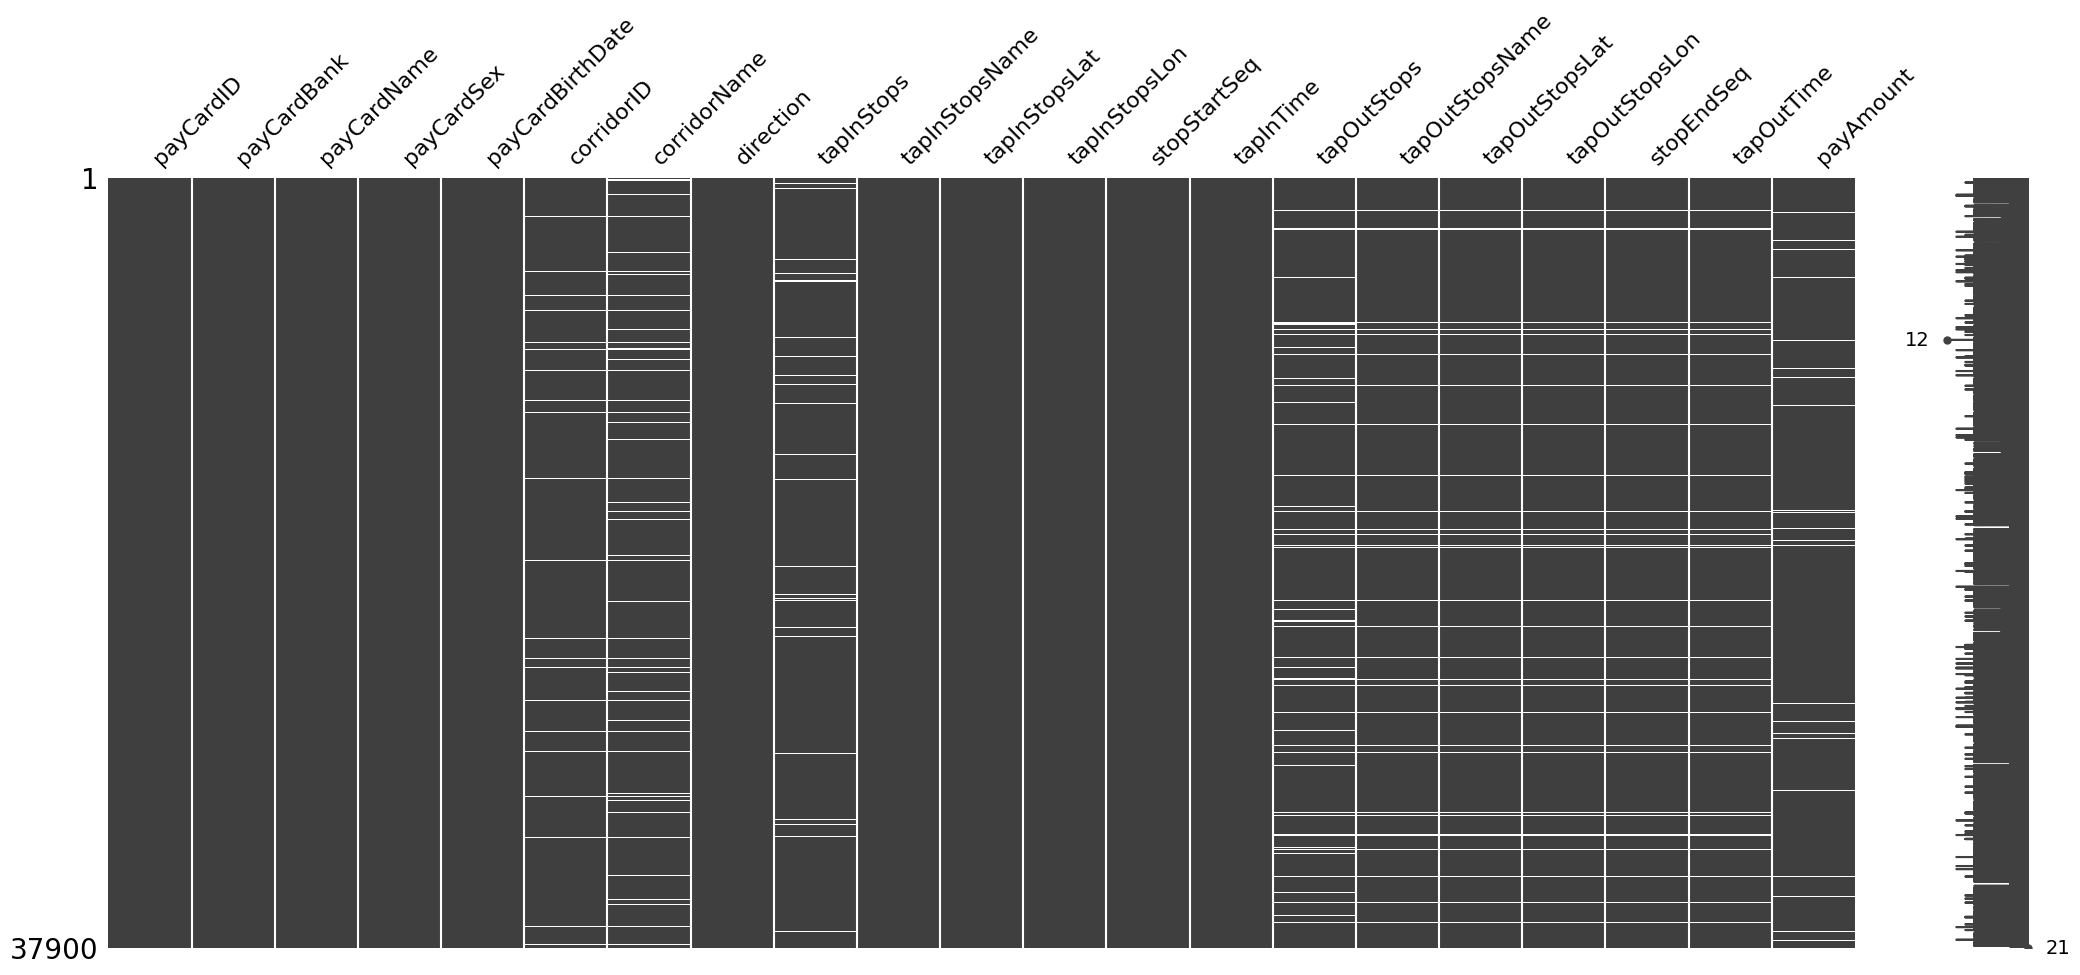

In [190]:
missingno.matrix(df)

<Axes: >

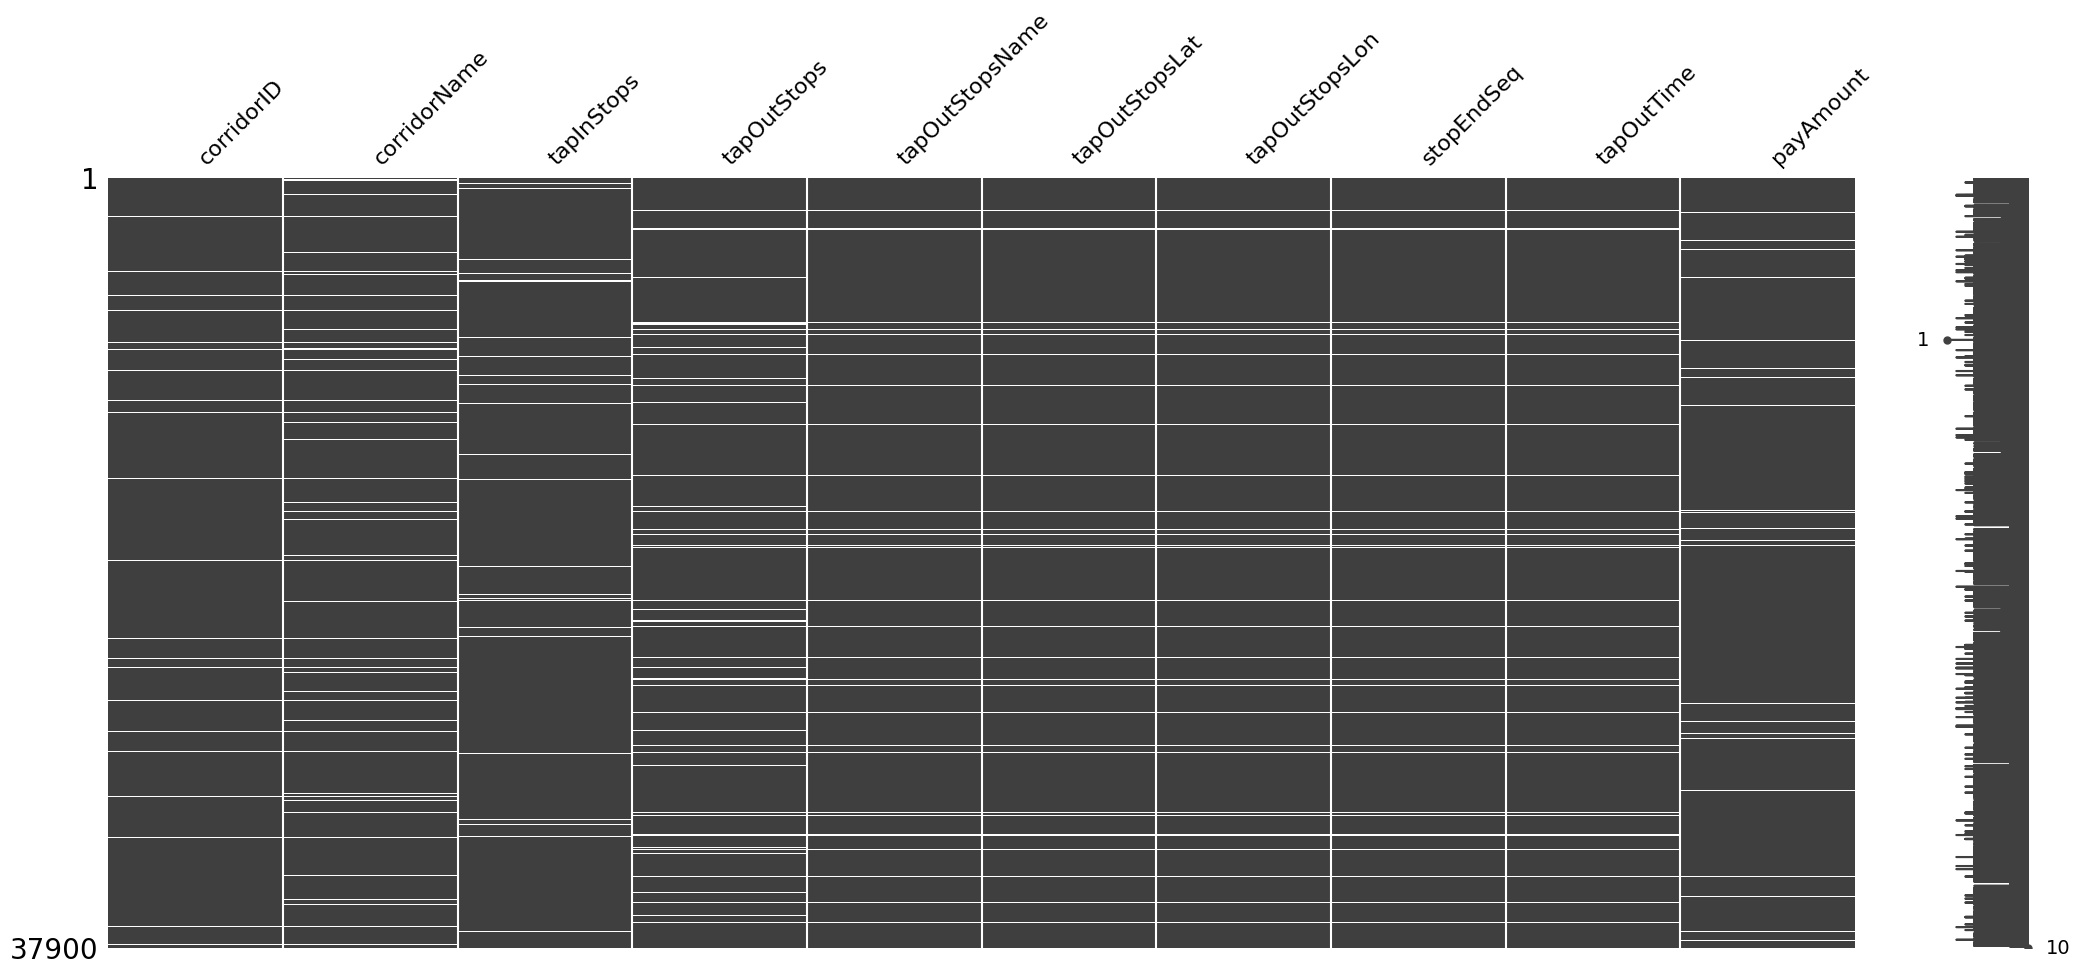

In [191]:
import missingno
missingno.matrix(df[['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon',
'stopEndSeq', 'tapOutTime', 'payAmount']])

Secara garis besar:  
* *missing value* di kolom `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime` dan `payAmount` memiliki jumlah yang banyak dan proporsi sedikit, dengan missing value di kolom `tapOutStops` mencapai 6.03%.
* *missing value* di kolom `corridorID` dan `corridorName` memiliki sebaran yang terlihat berkaitan, jika data di `corridorID` kosong, maka kemungkinan besar data di `corridorName` juga kosong. 
* *missing value* di kolom `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime` memiliki sebaran yang terlihat berkaitan, jika data di `tapOutStops` kosong, maka kemungkinan besar data di `company_type` juga kosong.  
* ada beberapa *missing value* di kolom `corridorName`, `tapInStops` dan `tapOutStops` memiliki sebaran yang berdiri sendiri.
* *missing value* di kolom `payAmount` memiliki sebaran yang berdiri sendiri.

Cara untuk menangani *missing value* adalah kita dapat menggunakan strategi mengisi data yang hilang berdasarkan kolom lain yang memiliki keterkaitan atau dengan nilai sebenarnya sesuai domain knowledge. Penghapusan data sebaiknya dihindari, terutama karena jumlah missing value yang signifikan dalam beberapa kolom. Pengisian missing value harus dilakukan dengan hati-hati dan berdasarkan domain knowledge atau analisis statistik. Pengisian dengan nilai rata-rata (mean), median, atau modus akan menjadi opsi terakhir jika tidak ada informasi yang lebih baik untuk mengisi missing value.

In [192]:
df[df.isna().any(axis = 1)]

payCardID payCardBank            payCardName payCardSex  \
6       213155822653833      emoney  R. Devi Hariyah, S.T.          M   
7      3587341902618993         dki        Darmanto Rajasa          F   
11      347204308990092      emoney  R.M. Labuh Laksmiwati          F   
21      343851798729291      emoney           Garang Utama          F   
30     3589380857722689         dki  drg. Lukman Hidayanto          M   
...                 ...         ...                    ...        ...   
37878    36067042340502         bni         Jatmiko Mansur          F   
37882   180074952289665      emoney        Asmadi Setiawan          F   
37885    30169751274025         bni        Prasetya Wasita          M   
37887  4068989702474318         dki         Ajimat Pradana          F   
37889     4300800810103      online         Faizah Samosir          M   

       payCardBirthDate corridorID                    corridorName  \
6                  1974     JAK.18             Kalibata - Kuningan   
7                  1991        NaN                             NaN   
11                 1984        M7B                    BKN - Blok M   
21                 1997     JAK.16              Cililitan - Condet   
30                 1995     JAK.46        Pasar Minggu - Jagakarsa   
...                 ...        ...                             ...   
37878              1965        D32       Cinere - Bundaran Senayan   
37882              1971    JAK.48B  Stasiun Tebet - Kampung Melayu   
37885              1986         3B                             NaN   
37887              1980         4D        Pulo Gadung 2 - Kuningan   
37889              2009     JAK.18             Kalibata - Kuningan   

           direction tapInStops           tapInStopsName  tapInStopsLat  \
6      Keberangkatan    B00243P          Cervino Village      -6.224355   
7             Pulang    B03416P       SDN Pondok Labu 11      -6.313269   
11            Pulang     P00254                  Tendean      -6.240213   
21     Keberangkatan        NaN   Lippo Mall Kramat Jati      -6.270835   
30            Pulang    B00001P           18 Office Park      -6.299146   
...              ...        ...                      ...            ...   
37878  Keberangkatan    B06642P              Mega Cinere      -6.333340   
37882  Keberangkatan    B01732P         Jatinegara Timur      -6.220486   
37885         Pulang    B04610P        Sekolah Al Huda 1      -6.149731   
37887  Keberangkatan     P00269                Velodrome      -6.193468   
37889  Keberangkatan    B01450P  Jln. Pancoran Timur III      -6.249482   

       tapInStopsLon  stopStartSeq           tapInTime tapOutStops  \
6          106.85165            25 2023-04-03 06:58:21         NaN   
7          106.80221             2 2023-04-03 06:44:24     B00899P   
11         106.83102            12 2023-04-03 06:22:10      P00129   
21         106.86741             4 2023-04-03 05:08:36     B01393P   
30         106.83210            19 2023-04-03 06:14:02         NaN   
...              ...           ...                 ...         ...   
37878      106.78282             4 2023-04-16 07:59:08         NaN   
37882      106.86825            11 2023-04-30 08:41:09     B01169P   
37885      106.72736             2 2023-04-08 10:46:06     B00192P   
37887      106.88830             5 2023-04-04 14:52:31         NaN   
37889      106.84661             8 2023-04-30 07:22:58         NaN   

                  tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq  \
6                             NaN             NaN             NaN         NaN   
7                      Jln. Baros       -6.311046       106.78400        12.0   
11               Mampang Prapatan       -6.242699       106.82572        14.0   
21          Jln. Mesjid Al Mabruk       -6.284350       106.85293        20.0   
30                            NaN             NaN             NaN         NaN   
...                           ...             ...             ...   

## Numerik

In [193]:
numerik = df.select_dtypes(include= 'number')
numerik

payCardBirthDate  tapInStopsLat  tapInStopsLon  stopStartSeq  \
0                  2008      -6.184631      106.84402             7   
1                  1997      -6.228700      106.83302            13   
2                  1992      -6.133132      106.81435            38   
3                  1978      -6.195743      106.93526            23   
4                  1982      -6.149650      106.88900             5   
...                 ...            ...            ...           ...   
37895              2004      -6.196892      106.82309             2   
37896              1974      -6.290154      106.88116             1   
37897              1976      -6.216247      106.81676            12   
37898              1976      -6.188656      106.80954            33   
37899              1985      -6.236466      106.74786             2   

       tapOutStopsLat  tapOutStopsLon  stopEndSeq  payAmount  
0           -6.203101       106.85715        12.0     3500.0  
1           -6.217152       106.81892        21.0     3500.0  
2           -6.133731       106.81475        39.0     3500.0  
3           -6.183068       106.93194        29.0     3500.0  
4           -6.135355       106.81143        15.0     3500.0  
...               ...             ...         ...        ...  
37895       -6.290967       106.82365        13.0     3500.0  
37896       -6.291075       106.88634         2.0     3500.0  
37897       -6.370321       106.89628        14.0    20000.0  
37898       -6.188861       106.81135        34.0        0.0  
37899       -6.238340       106.77752         7.0     3500.0  

[37900 rows x 8 columns]

In [194]:
numerik.describe()

payCardBirthDate  tapInStopsLat  tapInStopsLon  stopStartSeq  \
count      37900.000000   37900.000000   37900.000000  37900.000000   
mean        1990.089314      -6.214838     106.841554     13.572480   
std           13.051482       0.057911       0.060369     12.237623   
min         1946.000000      -6.394973     106.614730      0.000000   
25%         1982.000000      -6.245863     106.803470      4.000000   
50%         1990.000000      -6.214587     106.834830     10.000000   
75%         2001.000000      -6.175528     106.882270     19.000000   
max         2012.000000      -6.089429     107.023950     68.000000   

       tapOutStopsLat  tapOutStopsLon    stopEndSeq     payAmount  
count    36556.000000    36556.000000  36556.000000  36893.000000  
mean        -6.214651      106.841233     21.219909   2699.712683  
std          0.059022        0.060999     13.800689   4212.225592  
min         -6.394973      106.614730      1.000000      0.000000  
25%         -6.247225      106.801750     11.000000      0.000000  
50%         -6.214718      106.834580     18.000000   3500.000000  
75%         -6.174736      106.883030     29.000000   3500.000000  
max         -6.091746      107.023660     77.000000  20000.000000

secara keseluruhan dapat kita lihat bahwa
1. Rata-rata tahun kelahiran penumpang adalah sekitar 1990.08, dengan tahun kelahiran minimum pada tahun 1946 dan maksimum pada tahun 2012.
2. Urutan berhenti (stop sequence) memiliki nilai rata-rata sekitar 13.57 untuk `stopStartSeq` dan sekitar 21.22 untuk `stopEndSeq`.
3. nilai median dan nilai mean nya hampir sama.
4. Jumlah pembayaran memiliki standar deviasi yang tinggi, yaitu sekitar 4212.22, menunjukkan variasi yang besar dalam jumlah pembayaran.

### Uji Normalitas

In [195]:
df

payCardID payCardBank             payCardName payCardSex  \
0          180062659848800      emoney          Bajragin Usada          M   
1         4885331907664776         dki            Gandi Widodo          F   
2         4996225095064169         dki           Emong Wastuti          F   
3             639099174703       flazz            Surya Wacana          F   
4             570928206772       flazz         Embuh Mardhiyah          M   
...                    ...         ...                     ...        ...   
37895  4685818286724028395      brizzi         Kamila Mahendra          F   
37896     6502902290603767         dki            Titi Siregar          M   
37897      213159426675861      emoney  drg. Zahra Nashiruddin          F   
37898      377840859133591      emoney            Ana Agustina          M   
37899         501862539795       flazz       drg. Leo Najmudin          F   

       payCardBirthDate corridorID                              corridorName  \
0                  2008          5                     Matraman Baru - Ancol   
1                  1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2                  1992        R1A                        Pantai Maju - Kota   
3                  1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
4                  1982         12                     Tanjung Priok - Pluit   
...                 ...        ...                                       ...   
37895              2004         6B         Ragunan - MH Thamrin via Semanggi   
37896              1974         9N                    Pinang Ranti - Pramuka   
37897              1976         1T                      Cibubur - Balai Kota   
37898              1976     JAK.13               Tanah Abang - Jembatan Lima   
37899              1985         13                         Ciledug - Tendean   

           direction tapInStops          tapInStopsName  tapInStopsLat  \
0             Pulang     P00142               Pal Putih      -6.184631   
1      Keberangkatan    B01963P              Kemenkes 2      -6.228700   
2      Keberangkatan    B00499P            Gg. Kunir II      -6.133132   
3      Keberangkatan    B05587P            Taman Elok 1      -6.195743   
4      Keberangkatan     P00239  Sunter Boulevard Barat      -6.149650   
...              ...        ...                     ...            ...   
37895         Pulang     P00261                  Tosari      -6.196892   
37896         Pulang     P00064       Garuda Taman Mini      -6.290154   
37897         Pulang    B02873P           Plaza Sentral      -6.216247   
37898         Pulang    B02505P          Museum Textile      -6.188656   
37899  Keberangkatan     P00001              Adam Malik      -6.236466   

       tapInStopsLon  stopStartSeq           tapInTime tapOutStops  \
0          106.84402             7 2023-04-03 05:21:44      P00253   
1          106.83302            13 2023-04-03 05:42:44     B03307P   
2          106.81435            38 2023-04-03 05:59:06     B04962P   
3          106.93526            23 2023-04-03 05:44:51     B03090P   
4          106.88900             5 2023-04-03 06:17:35      P00098   
...              ...           ...                 ...         ...   
37895      106.82309             2 2023-04-21 18:18:37      P00228   
37896      106.88116             1 2023-04-18 21:52:31      P00179   
37897      106.81676            12 2023-04-04 10:29:47     B00226P   
37898      106.80954            33 2023-04-15 19:59:26     B01787P   
37899      106.74786             2 2023-04-12 21:08:12      P00106   

             tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq  \
0                    Tegalan       -6.203101       106.85715        12.0   
1        Sampoerna Strategic       -6.217152       106.81892        21.0   
2      Simpang Kunir Kemukus       -6.133731       106.81475        39.0   
3          Raya Penggilingan       -6.183068       106.93194        29.0   
4           Kali Besa

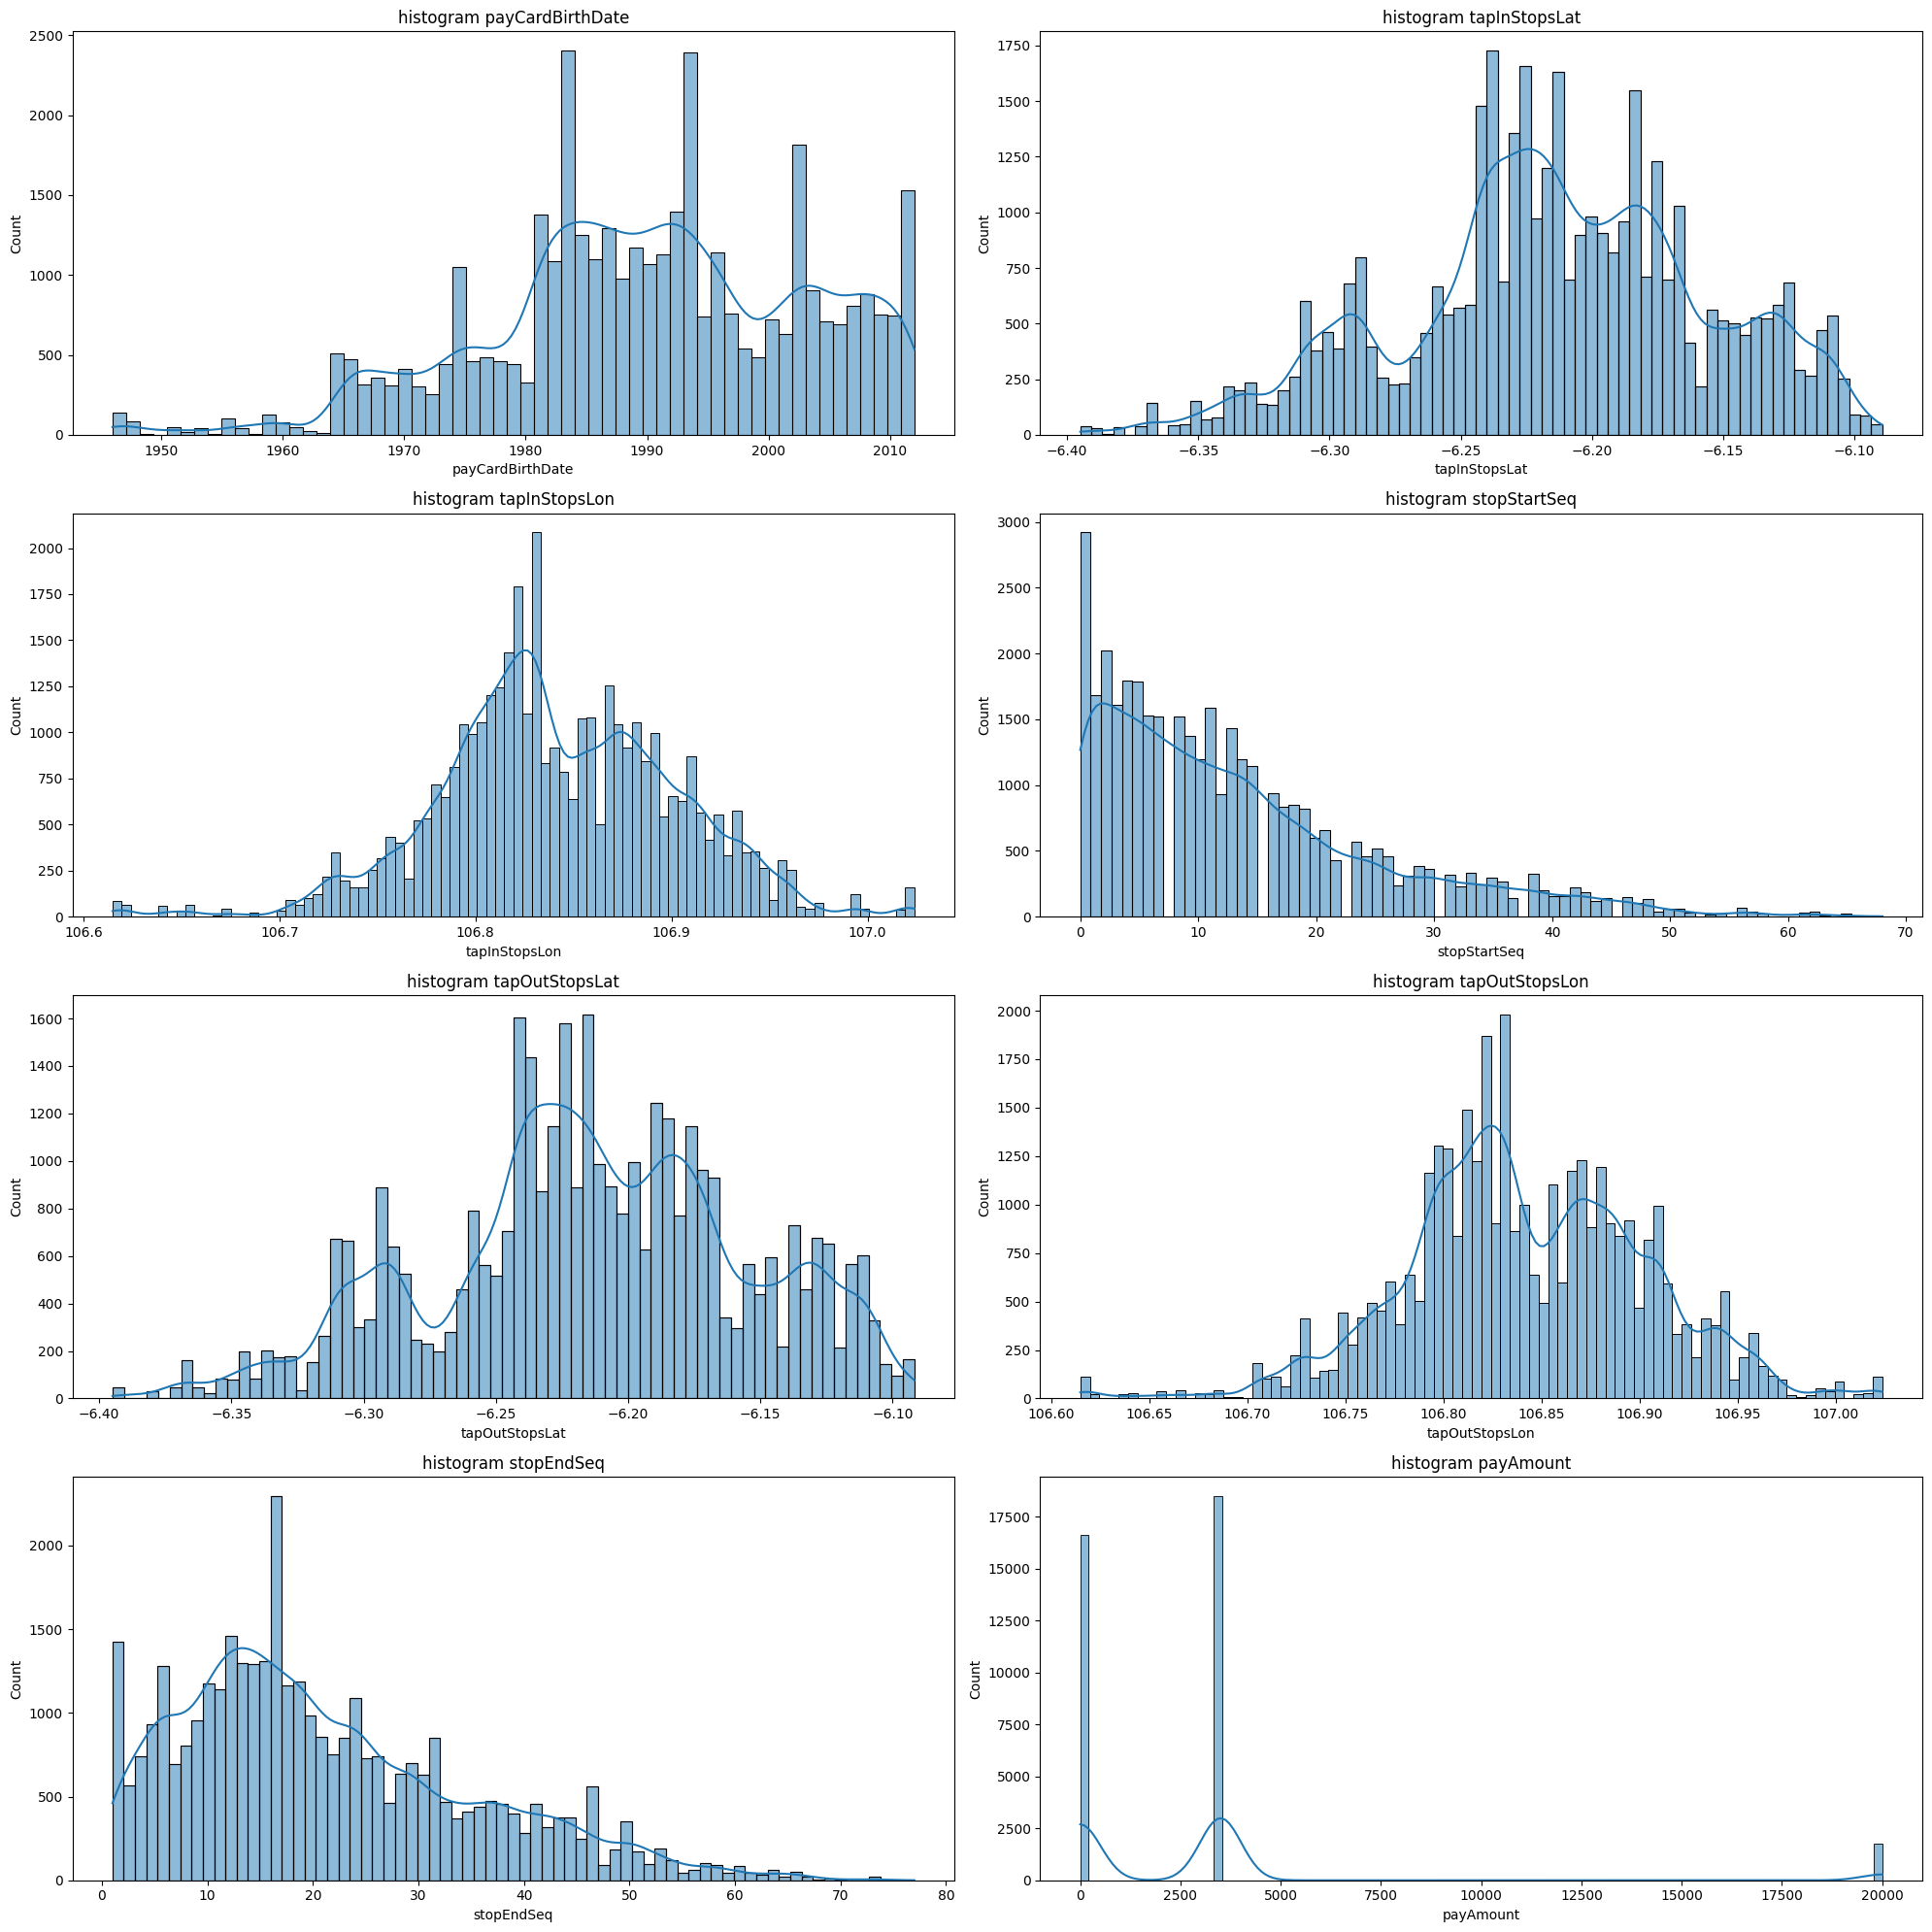

In [196]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(4,2,count)
    sns.histplot(numerik[kolom], kde=True)
    plt.title(f"histogram {kolom}")
    fig.tight_layout() # biar tidak tertumpuk
plt.show()

berdasarkan dari histogram diatas dapat disimpulkan bahwa
- `payCardBirthDate` memiliki bentuk distribusi yang miring ke kanan, hal ini menunjukkan bahwa data tersebut didistribusikan secara right skewed.
- `tapinStopsLon`, dan `tapOutStopsLon` memiliki bentuk distribusi yang normal
- `tapinStopsLat`, `stopStartSeq` dan `tapOutStopsLat` memiliki bentuk distribusi  secara uniform.
- `stopEndSeq` dan `payAmount` memiliki bentuk distribusi yang miring ke kanan, hal ini menunjukkan bahwa data tersebut didistribusikan secara right skewed.

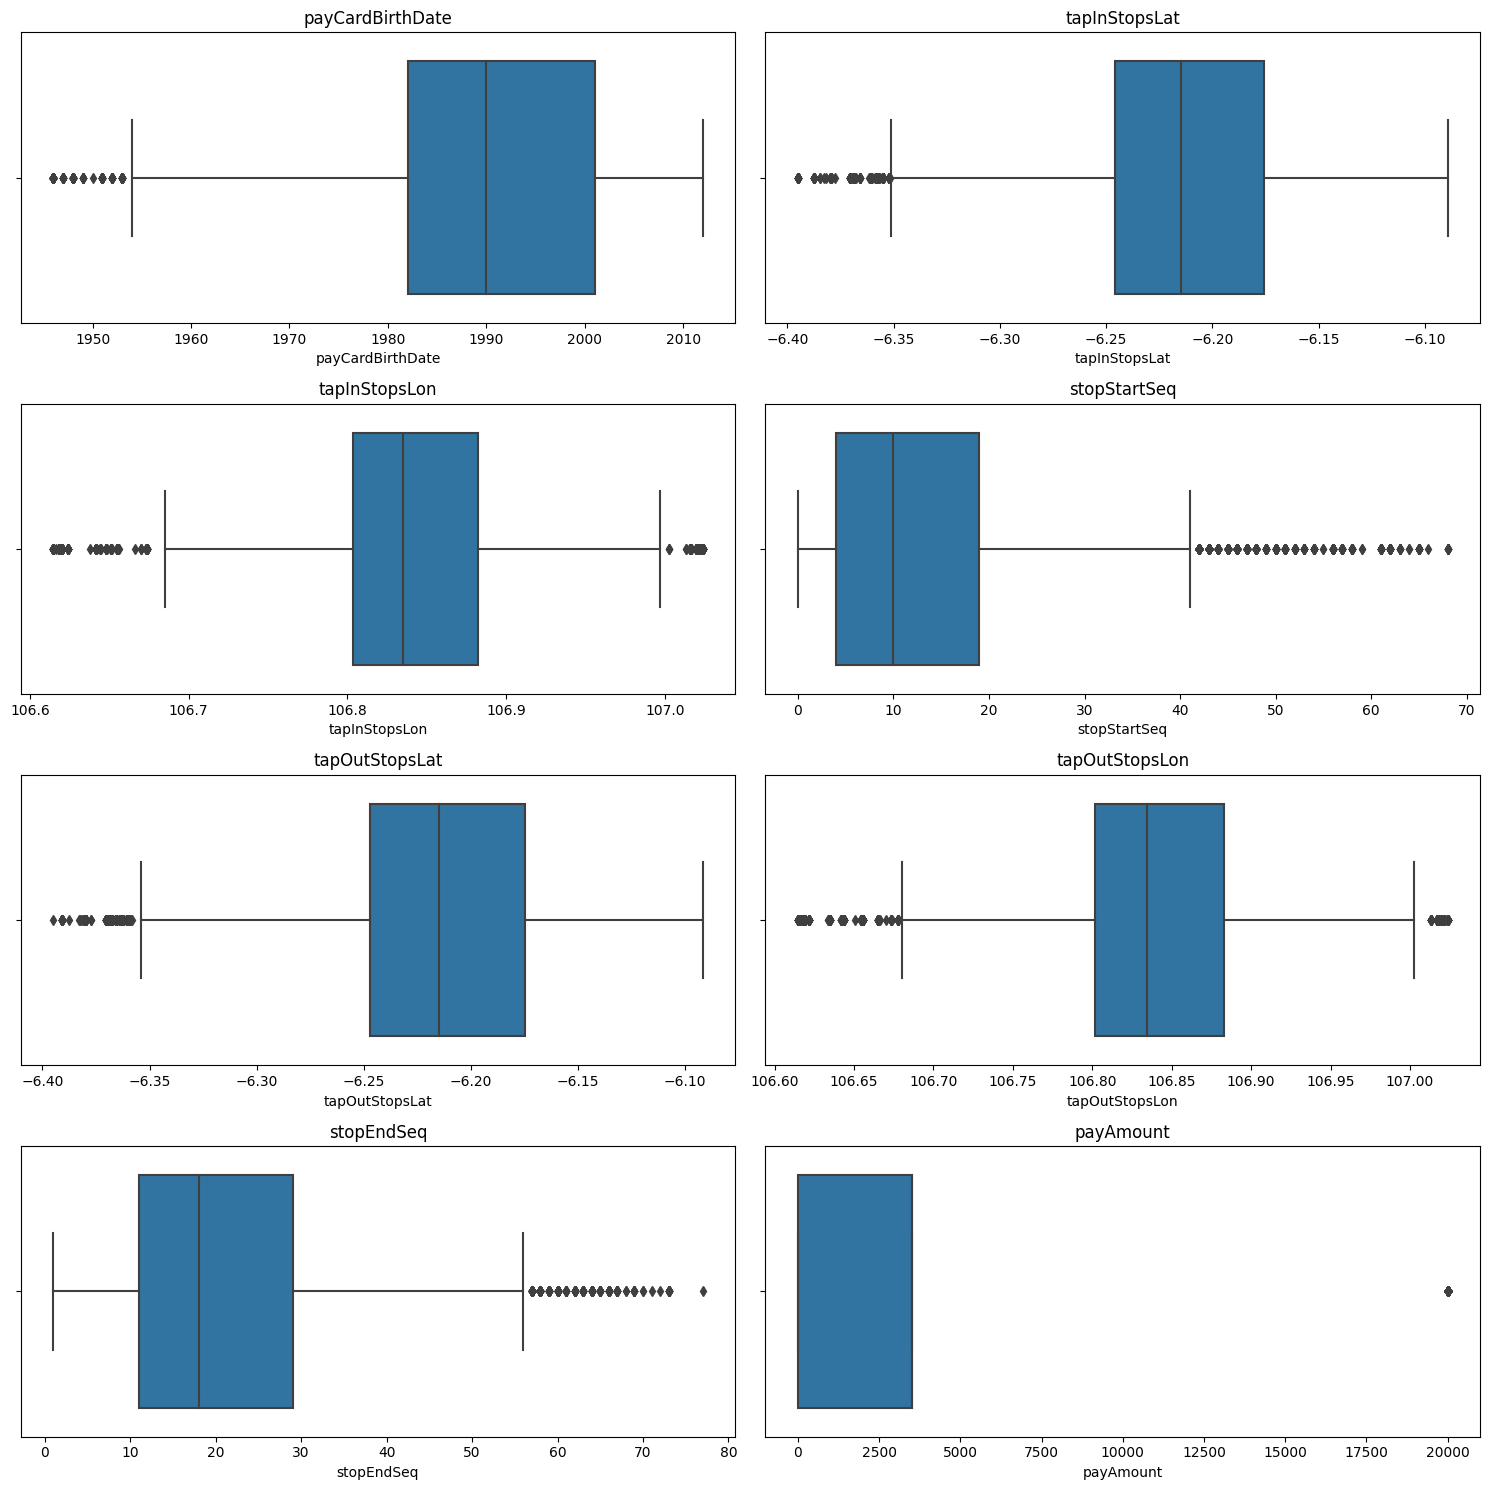

In [197]:
fig = plt.figure(figsize=(15,15)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(4,2,count)
    sns.boxplot(numerik, x = kolom)
    fig.tight_layout() # biar tidak tertumpuk
    plt.title(f'{kolom}')
plt.show()

In [198]:
for kolom in numerik.columns:
    q1 = df[kolom].describe().loc['25%']
    q3 = df[kolom].describe().loc['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 

    jumlah_outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)].shape[0]
    print(f"data {kolom} memiliki outliers sejumlah {jumlah_outliers}")

data payCardBirthDate memiliki outliers sejumlah 340
data tapInStopsLat memiliki outliers sejumlah 411
data tapInStopsLon memiliki outliers sejumlah 558
data stopStartSeq memiliki outliers sejumlah 1543
data tapOutStopsLat memiliki outliers sejumlah 359
data tapOutStopsLon memiliki outliers sejumlah 449
data stopEndSeq memiliki outliers sejumlah 583
data payAmount memiliki outliers sejumlah 1742


In [199]:
outliers_count = []

for column in numerik.columns:
    z_scores = np.abs((numerik[column] - numerik[column].mean()) / numerik[column].std()) # tidak cocok dengan data tidak terdistribusi normal
    count = len(z_scores[z_scores > 2])  # umumnya 2, tapi juga bisa disesuaikan dengan melihat bagaimana data mulai meruncing atau ekstrim
    outliers_count.append({'Column': column, 'Outliers Count': count})

outliers_df = pd.DataFrame(outliers_count)

print("DataFrame jumlah outliers tiap kolom:")
outliers_df

DataFrame jumlah outliers tiap kolom:


Column  Outliers Count
0  payCardBirthDate             782
1     tapInStopsLat            1390
2     tapInStopsLon            1387
3      stopStartSeq            2055
4    tapOutStopsLat            1241
5    tapOutStopsLon            1438
6        stopEndSeq            1800
7         payAmount            1742

- Berdasarkan perhitungan menggunakan Quantile on Quantile Regression dan Z Score menunjukan adanya perbedaan jumlah outliers yang cukup signifikan.
- hanya kolom `payAmount` yang tidak memiliki perbedaan jumlah outliersnya 

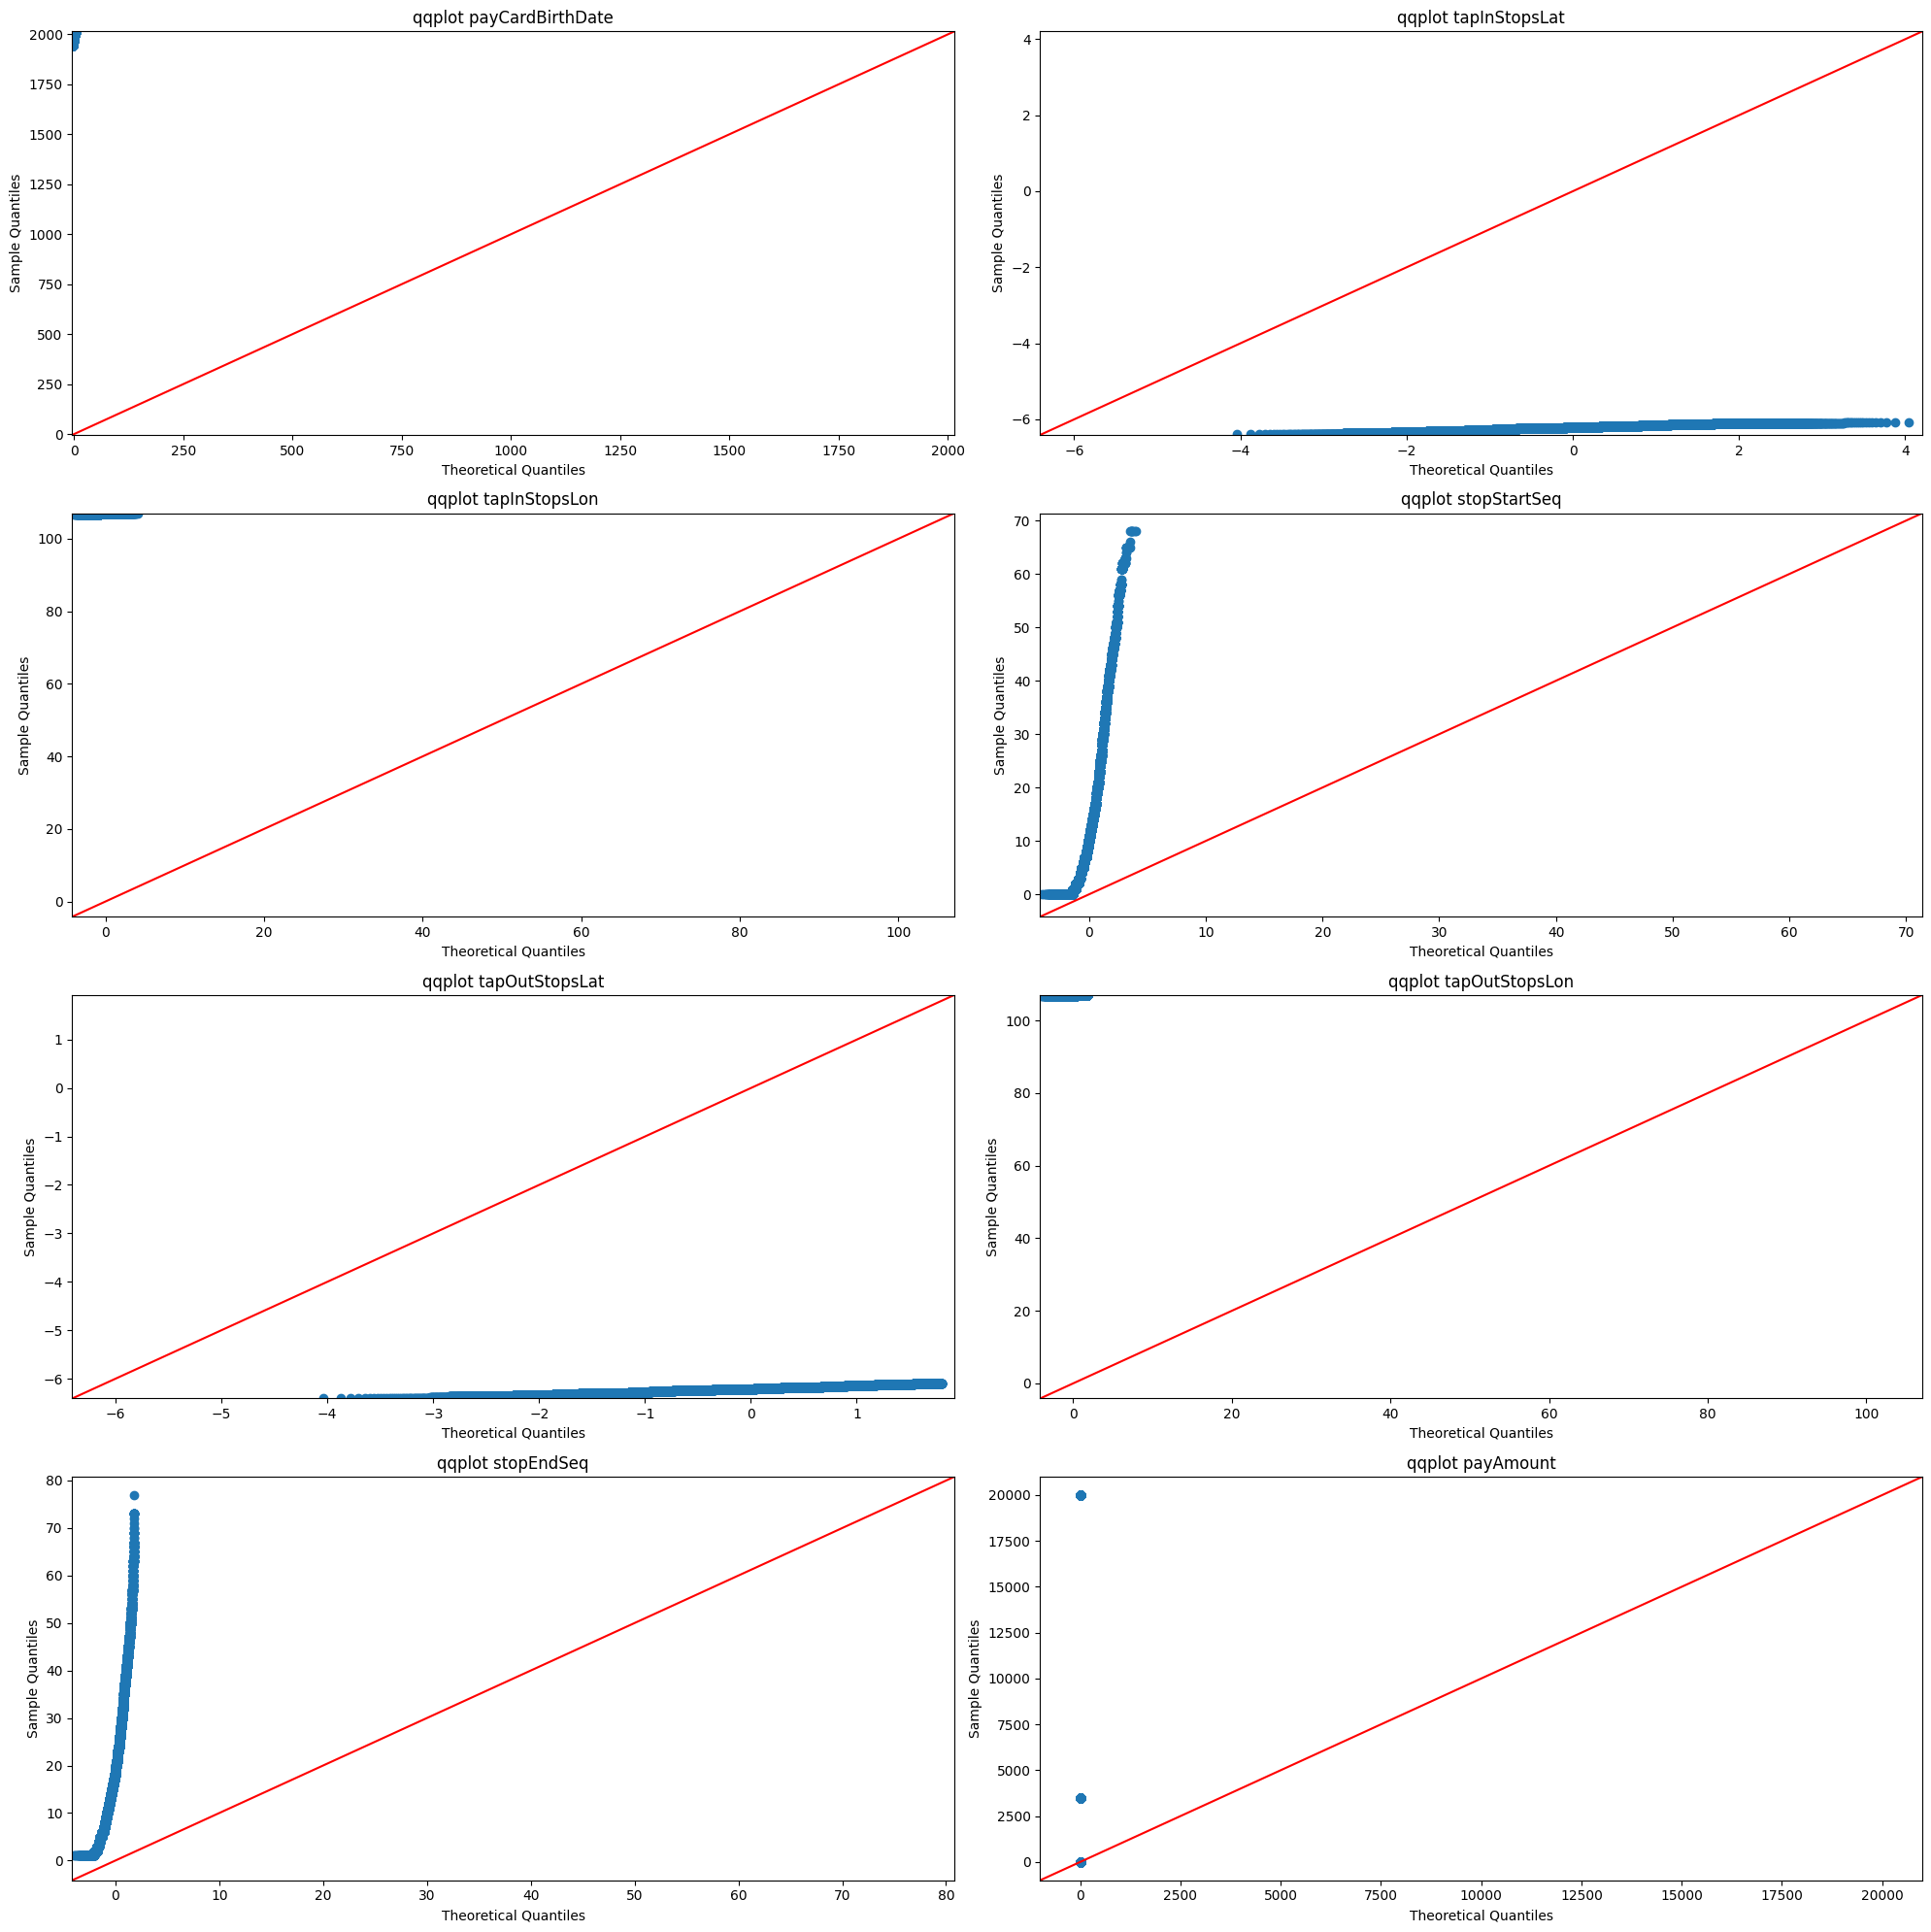

In [200]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    ax = plt.subplot(4,2,count)
    sm.qqplot(numerik[kolom], line='45', ax = ax)
    plt.title(f"qqplot {kolom}")
    fig.tight_layout() # biar tidak tertumpuk

plt.show()

Dari gambar diatas dapat disimpulkan bahwa semua data yang divisualisasikan menggunakan qqplot tidak memiliki pattern yang normal

### Dengan Statistika

In [201]:
from scipy.stats import normaltest

for i in numerik.columns:
    stats, p_val = normaltest(df[i])
    if p_val >= 0.05:
        print(f"{i} data terdistribusi normal")
    else:
        print(f"{i} data tidak terdistribusi normal")

payCardBirthDate data tidak terdistribusi normal
tapInStopsLat data tidak terdistribusi normal
tapInStopsLon data tidak terdistribusi normal
stopStartSeq data tidak terdistribusi normal
tapOutStopsLat data tidak terdistribusi normal
tapOutStopsLon data tidak terdistribusi normal
stopEndSeq data tidak terdistribusi normal
payAmount data tidak terdistribusi normal


Berdasarkan statistika, seluruh data numerik memiliki data yang tidak terdistribusi normal

### Korelasi

In [202]:
numeric_columns = df.select_dtypes(include=[np.number])
df_corr = numeric_columns.corr(method="spearman")
df_corr

payCardBirthDate  tapInStopsLat  tapInStopsLon  \
payCardBirthDate          1.000000       0.053390      -0.052694   
tapInStopsLat             0.053390       1.000000       0.023666   
tapInStopsLon            -0.052694       0.023666       1.000000   
stopStartSeq             -0.024925      -0.007995       0.052814   
tapOutStopsLat            0.033952       0.910567       0.032628   
tapOutStopsLon           -0.044056       0.032871       0.914414   
stopEndSeq               -0.023479      -0.020717       0.089086   
payAmount                 0.074565      -0.130678      -0.295555   

                  stopStartSeq  tapOutStopsLat  tapOutStopsLon  stopEndSeq  \
payCardBirthDate     -0.024925        0.033952       -0.044056   -0.023479   
tapInStopsLat        -0.007995        0.910567        0.032871   -0.020717   
tapInStopsLon         0.052814        0.032628        0.914414    0.089086   
stopStartSeq          1.000000       -0.024018        0.045309    0.791717   
tapOutStopsLat       -0.024018        1.000000        0.013989   -0.027788   
tapOutStopsLon        0.045309        0.013989        1.000000    0.081366   
stopEndSeq            0.791717       -0.027788        0.081366    1.000000   
payAmount            -0.264551       -0.129890       -0.286594   -0.386481   

                  payAmount  
payCardBirthDate   0.074565  
tapInStopsLat     -0.130678  
tapInStopsLon     -0.295555  
stopStartSeq      -0.264551  
tapOutStopsLat    -0.129890  
tapOutStopsLon    -0.286594  
stopEndSeq        -0.386481  
payAmount          1.000000

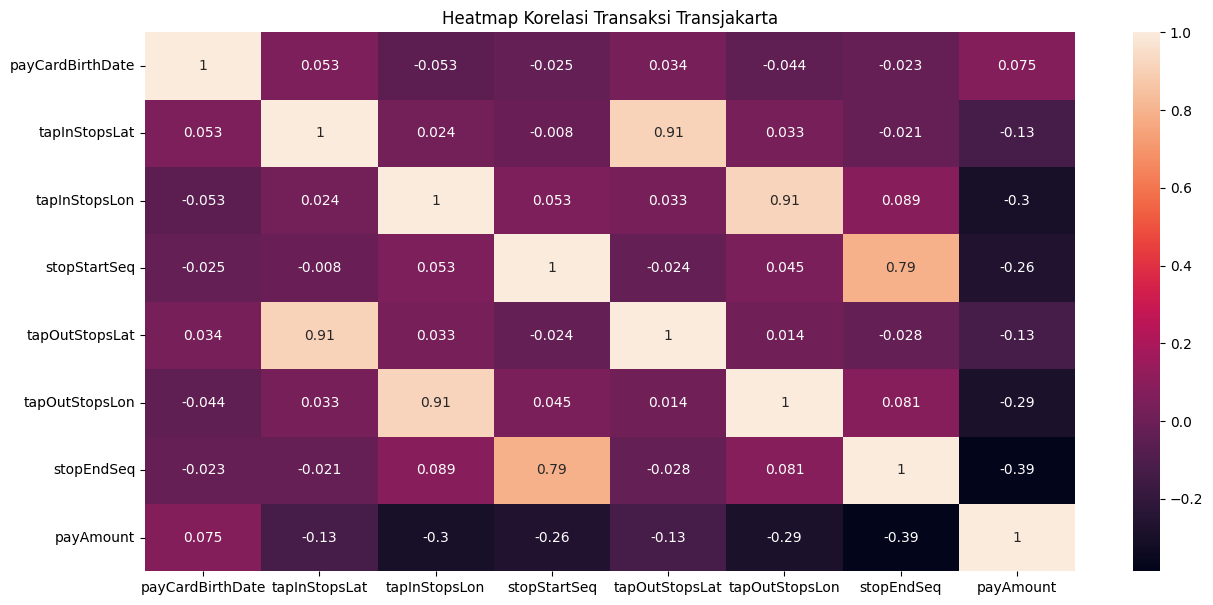

In [203]:
plt.figure(figsize = (15,7))
sns.heatmap(data=df_corr, annot=True)
plt.title("Heatmap Korelasi Transaksi Transjakarta")
plt.show()

Secara garis besar:  
* kolom `tapOutStopsLat` memiliki korelasi yang tinggi terhadap kolom `tapInLat`.
* kolom `tapOutStopslon` memiliki korelasi yang tinggi terhadap kolom `tapInStopsLon`.
* kolom `stopEndSeq` memiliki korelasi yang tinggi terhadap kolom `stopStarSeq`. 

## Kategorik

In [204]:
kategorik = df.select_dtypes(exclude="number")

In [205]:
kategorik.nunique()

payCardID           2000
payCardBank            6
payCardName         1993
payCardSex             2
corridorID           221
corridorName         216
direction              2
tapInStops          2570
tapInStopsName      2602
tapInTime          37079
tapOutStops         2230
tapOutStopsName     2248
tapOutTime         35908
dtype: int64

In [206]:
kategorik.describe(include='object')

payCardID payCardBank         payCardName payCardSex corridorID  \
count             37900       37900               37900      37900      36643   
unique             2000           6                1993          2        221   
top     180062659848800         dki  Fathonah Saefullah          F         1T   
freq                 40       18743                  80      20157        400   

                corridorName direction tapInStops tapInStopsName tapOutStops  \
count                  35970     37900      36687          37900       35611   
unique                   216         2       2570           2602        2230   
top     Cibubur - Balai Kota    Pulang     P00170    Penjaringan      P00016   
freq                     391     18974        236            243         306   

       tapOutStopsName  
count            36556  
unique            2248  
top                BKN  
freq               316

secara keseluruhan dapat kita lihat bahwa:
1. ID kartu yang paling sering melakukan transaksi adalah "180062659848800" sebanyak 40 kali.
2. Bank "dki" adalah bank yang paling sering muncul dalam data, dengan frekuensi 18.743.
3. Perempuan adalah jenis kelamin yang paling sering melakukan transaksi, dengan frekuensi 20.157.
4. "1T" adalah ID koridor yang paling sering melakukan transaksi, dengan frekuensi 400.
5. "Cibubur - Balai Kota" adalah nama koridor yang paling sering digunakan oleh pengguna Transjakarta, dengan frekuensi 391.
6. "Penjaringan" adalah halte yang sering digunakan untuk masuk ke Transjakarta oleh pengguna Transjakarta, dengan frekuensi 243.
7. "BKN" aadalah halte yang sering digunakan untuk keluar dari Transjakarta oleh pengguna Transjakarta, dengan frekuensi 316.

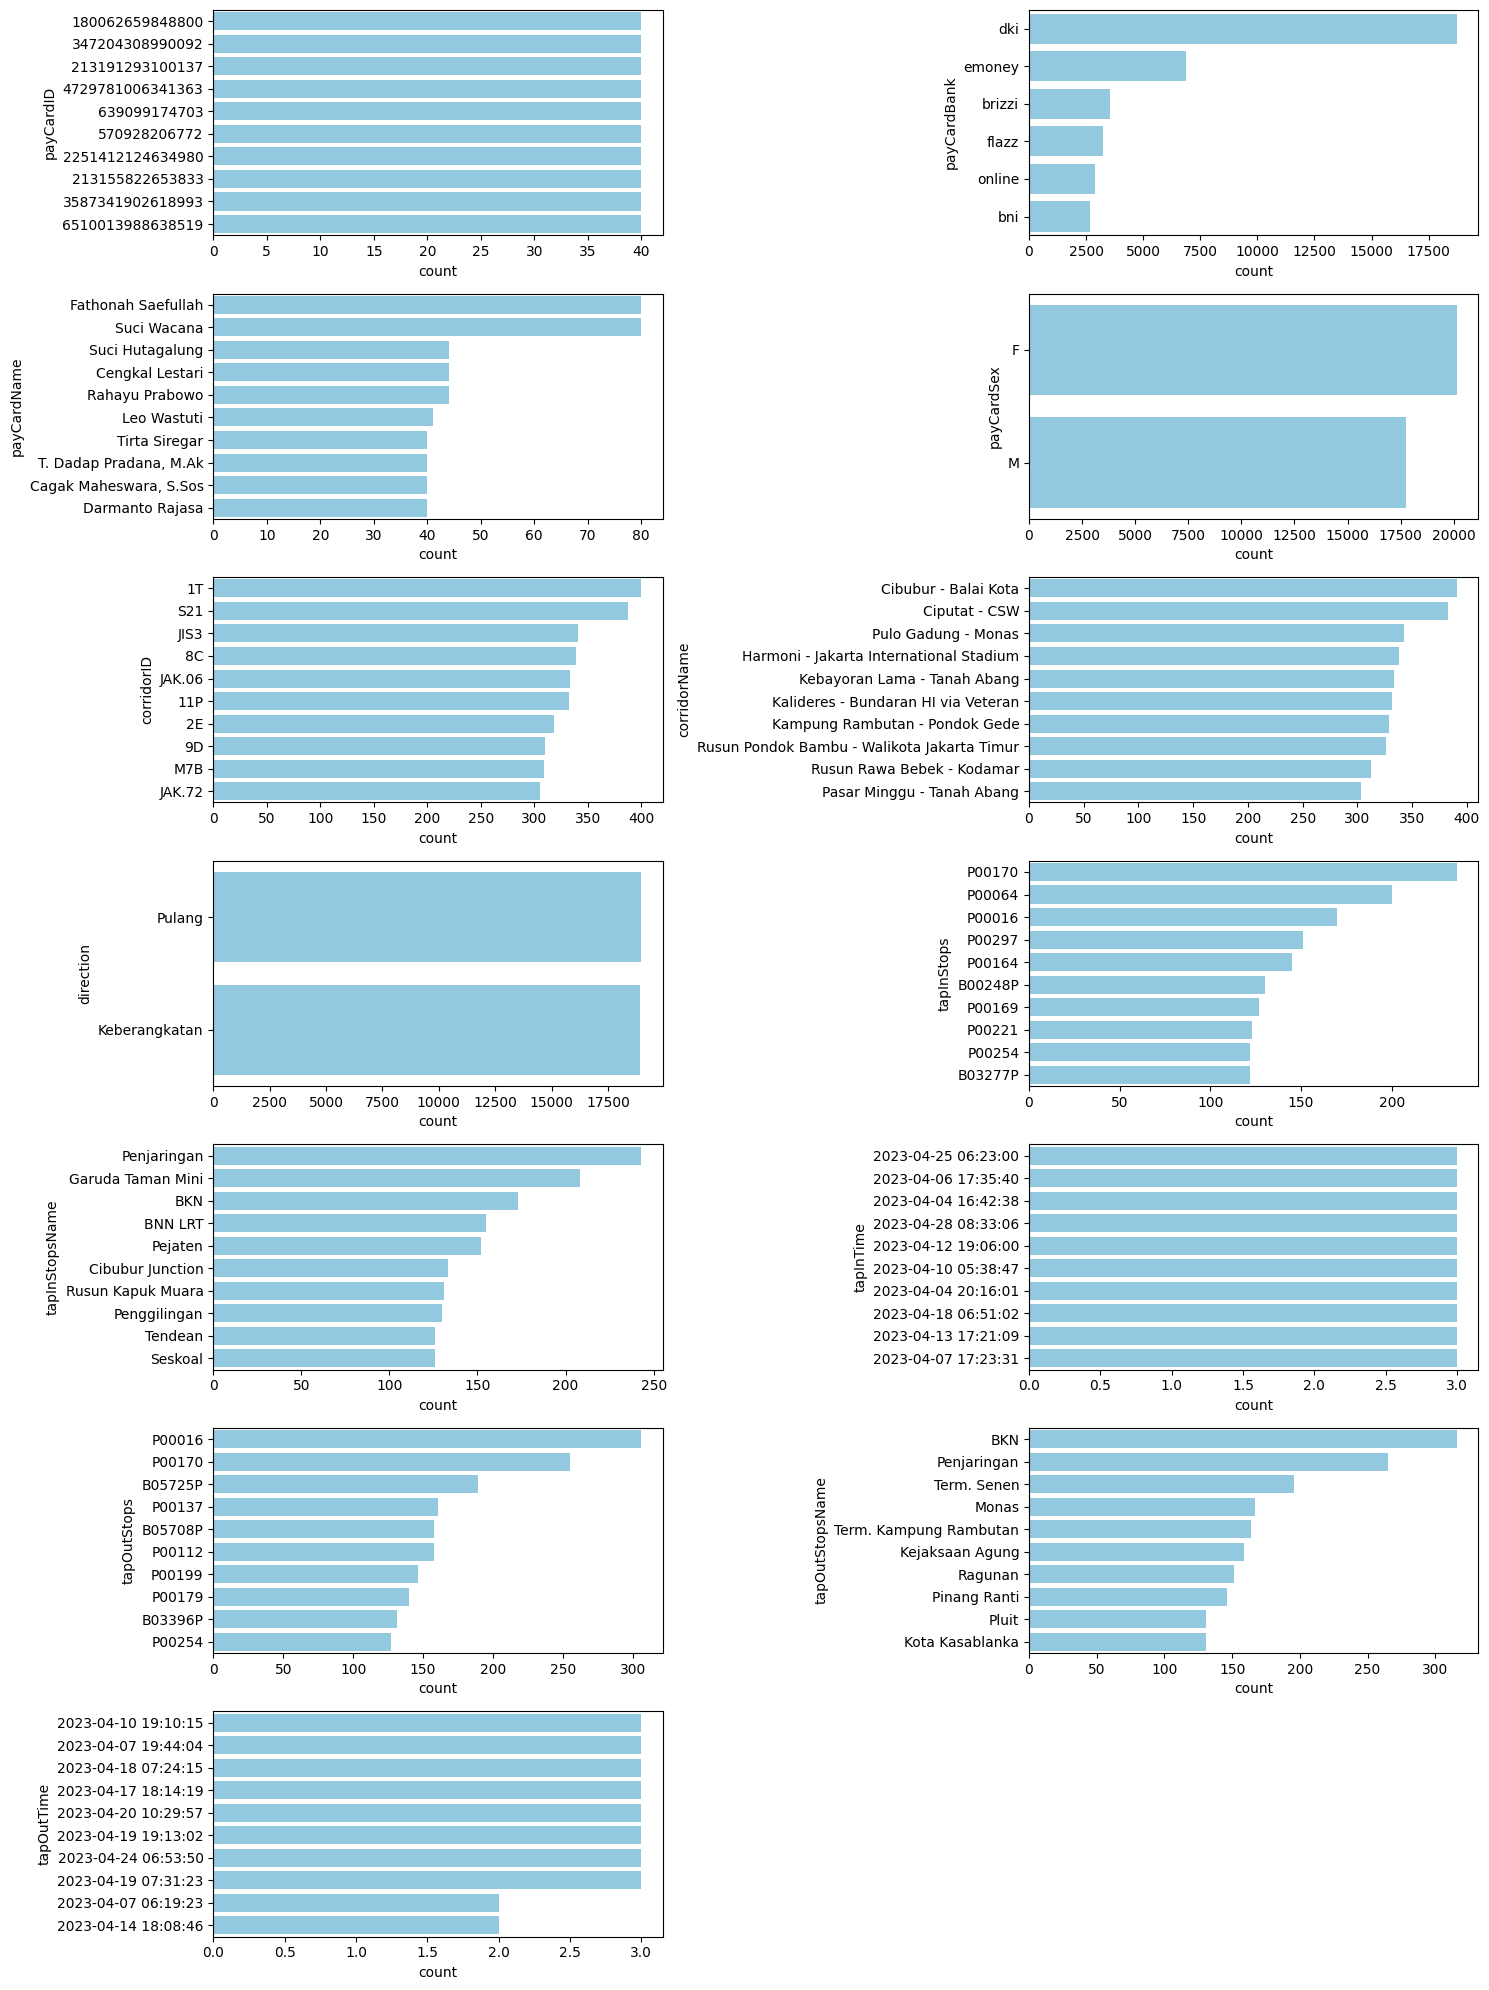

In [207]:
count = 0
fig = plt.figure(figsize=(15,20))
for kolom in kategorik.columns:
    count += 1
    plt.subplot(7,2,count)
    sns.countplot(y = kolom, data = kategorik, order = kategorik[kolom].value_counts().sort_values(ascending = False).head(10).index, color= 'skyblue')
    fig.tight_layout()
plt.show()

Secara garis besar:  
* kolom `payCardBank`: Bank "dki" adalah yang paling dominan di antara semua bank, diikuti oleh "emoney" dan "brizzi".
* kolom `payCardSex`:  Terdapat lebih banyak penumpang perempuan dibandingkan dengan penumpang laki-laki.
* kolom `corridorID`: Beberapa koridor memiliki frekuensi yang jauh lebih tinggi dibandingkan dengan yang lain. "1T" dan "S21" adalah dua koridor dengan frekuensi tertinggi.
* kolom `tapInStops`:"P00170" dan "P00016" adalah dua stasiun dengan jumlah penumpang naik terbanyak.
* kolom `tapInTime` dan `tapOutTime` :   ada rentang waktu yang memiliki frekuensi yang jauh lebih tinggi dibandingkan dengan yang lain. "05:30-09:00" dan "16:30-20:00" adalah rentang waktu dengan frekuensi tertinggi.
* kolom `tapOutStops` dan `tapOutStopsName` : Beberapa koridor memiliki frekuensi yang jauh lebih tinggi dibandingkan dengan yang lain. "1T" dan "6B" adalah dua koridor dengan frekuensi tertinggi.

## Summary Data Understanding

- Data Transjakarta ini menggambarkan informasi tentang transaksi penumpang, termasuk detail pribadi, rute yang diambil, dan biaya yang dikeluarkan.
- Beberapa kolom memiliki data yang hilang, terutama kolom yang terkait dengan informasi "tap out".
- Kolom numerik seperti payAmount menunjukkan distribusi yang tidak normal dengan beberapa outlier, sementara kolom lain seperti payCardBirthDate mendekati distribusi normal.
- Kolom kategorik menunjukkan variasi dalam distribusi, dengan beberapa kategori mendominasi distribusi.
- Korelasi antar kolom numerik menunjukkan beberapa hubungan yang menarik, tetapi sebagian besar kolom tidak berkorelasi dengan kuat.

Dengan pemahaman data yang lebih mendalam ini, kita dapat merancang langkah-langkah pembersihan data dan analisis lebih lanjut dengan lebih efektif.

# Data Cleaning

In [208]:
df_copy = df

In [209]:
df_copy

payCardID payCardBank             payCardName payCardSex  \
0          180062659848800      emoney          Bajragin Usada          M   
1         4885331907664776         dki            Gandi Widodo          F   
2         4996225095064169         dki           Emong Wastuti          F   
3             639099174703       flazz            Surya Wacana          F   
4             570928206772       flazz         Embuh Mardhiyah          M   
...                    ...         ...                     ...        ...   
37895  4685818286724028395      brizzi         Kamila Mahendra          F   
37896     6502902290603767         dki            Titi Siregar          M   
37897      213159426675861      emoney  drg. Zahra Nashiruddin          F   
37898      377840859133591      emoney            Ana Agustina          M   
37899         501862539795       flazz       drg. Leo Najmudin          F   

       payCardBirthDate corridorID                              corridorName  \
0                  2008          5                     Matraman Baru - Ancol   
1                  1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2                  1992        R1A                        Pantai Maju - Kota   
3                  1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
4                  1982         12                     Tanjung Priok - Pluit   
...                 ...        ...                                       ...   
37895              2004         6B         Ragunan - MH Thamrin via Semanggi   
37896              1974         9N                    Pinang Ranti - Pramuka   
37897              1976         1T                      Cibubur - Balai Kota   
37898              1976     JAK.13               Tanah Abang - Jembatan Lima   
37899              1985         13                         Ciledug - Tendean   

           direction tapInStops          tapInStopsName  tapInStopsLat  \
0             Pulang     P00142               Pal Putih      -6.184631   
1      Keberangkatan    B01963P              Kemenkes 2      -6.228700   
2      Keberangkatan    B00499P            Gg. Kunir II      -6.133132   
3      Keberangkatan    B05587P            Taman Elok 1      -6.195743   
4      Keberangkatan     P00239  Sunter Boulevard Barat      -6.149650   
...              ...        ...                     ...            ...   
37895         Pulang     P00261                  Tosari      -6.196892   
37896         Pulang     P00064       Garuda Taman Mini      -6.290154   
37897         Pulang    B02873P           Plaza Sentral      -6.216247   
37898         Pulang    B02505P          Museum Textile      -6.188656   
37899  Keberangkatan     P00001              Adam Malik      -6.236466   

       tapInStopsLon  stopStartSeq           tapInTime tapOutStops  \
0          106.84402             7 2023-04-03 05:21:44      P00253   
1          106.83302            13 2023-04-03 05:42:44     B03307P   
2          106.81435            38 2023-04-03 05:59:06     B04962P   
3          106.93526            23 2023-04-03 05:44:51     B03090P   
4          106.88900             5 2023-04-03 06:17:35      P00098   
...              ...           ...                 ...         ...   
37895      106.82309             2 2023-04-21 18:18:37      P00228   
37896      106.88116             1 2023-04-18 21:52:31      P00179   
37897      106.81676            12 2023-04-04 10:29:47     B00226P   
37898      106.80954            33 2023-04-15 19:59:26     B01787P   
37899      106.74786             2 2023-04-12 21:08:12      P00106   

             tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq  \
0                    Tegalan       -6.203101       106.85715        12.0   
1        Sampoerna Strategic       -6.217152       106.81892        21.0   
2      Simpang Kunir Kemukus       -6.133731       106.81475        39.0   
3          Raya Penggilingan       -6.183068       106.93194        29.0   
4           Kali Besa

## Handling Missing Value

In [210]:
missing_values = df_copy.isnull().sum()

# persentase missing values
missing_percentage = (df_copy.isnull().sum() / len(df_copy)) * 100

missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage}).sort_values(by='Percentage (%)', ascending=False)
missing_info[missing_info['Missing Values'] > 0]

Missing Values  Percentage (%)
tapOutStops                2289        6.039578
corridorName               1930        5.092348
tapOutTime                 1344        3.546174
stopEndSeq                 1344        3.546174
tapOutStopsLon             1344        3.546174
tapOutStopsLat             1344        3.546174
tapOutStopsName            1344        3.546174
corridorID                 1257        3.316623
tapInStops                 1213        3.200528
payAmount                  1007        2.656992

<Axes: >

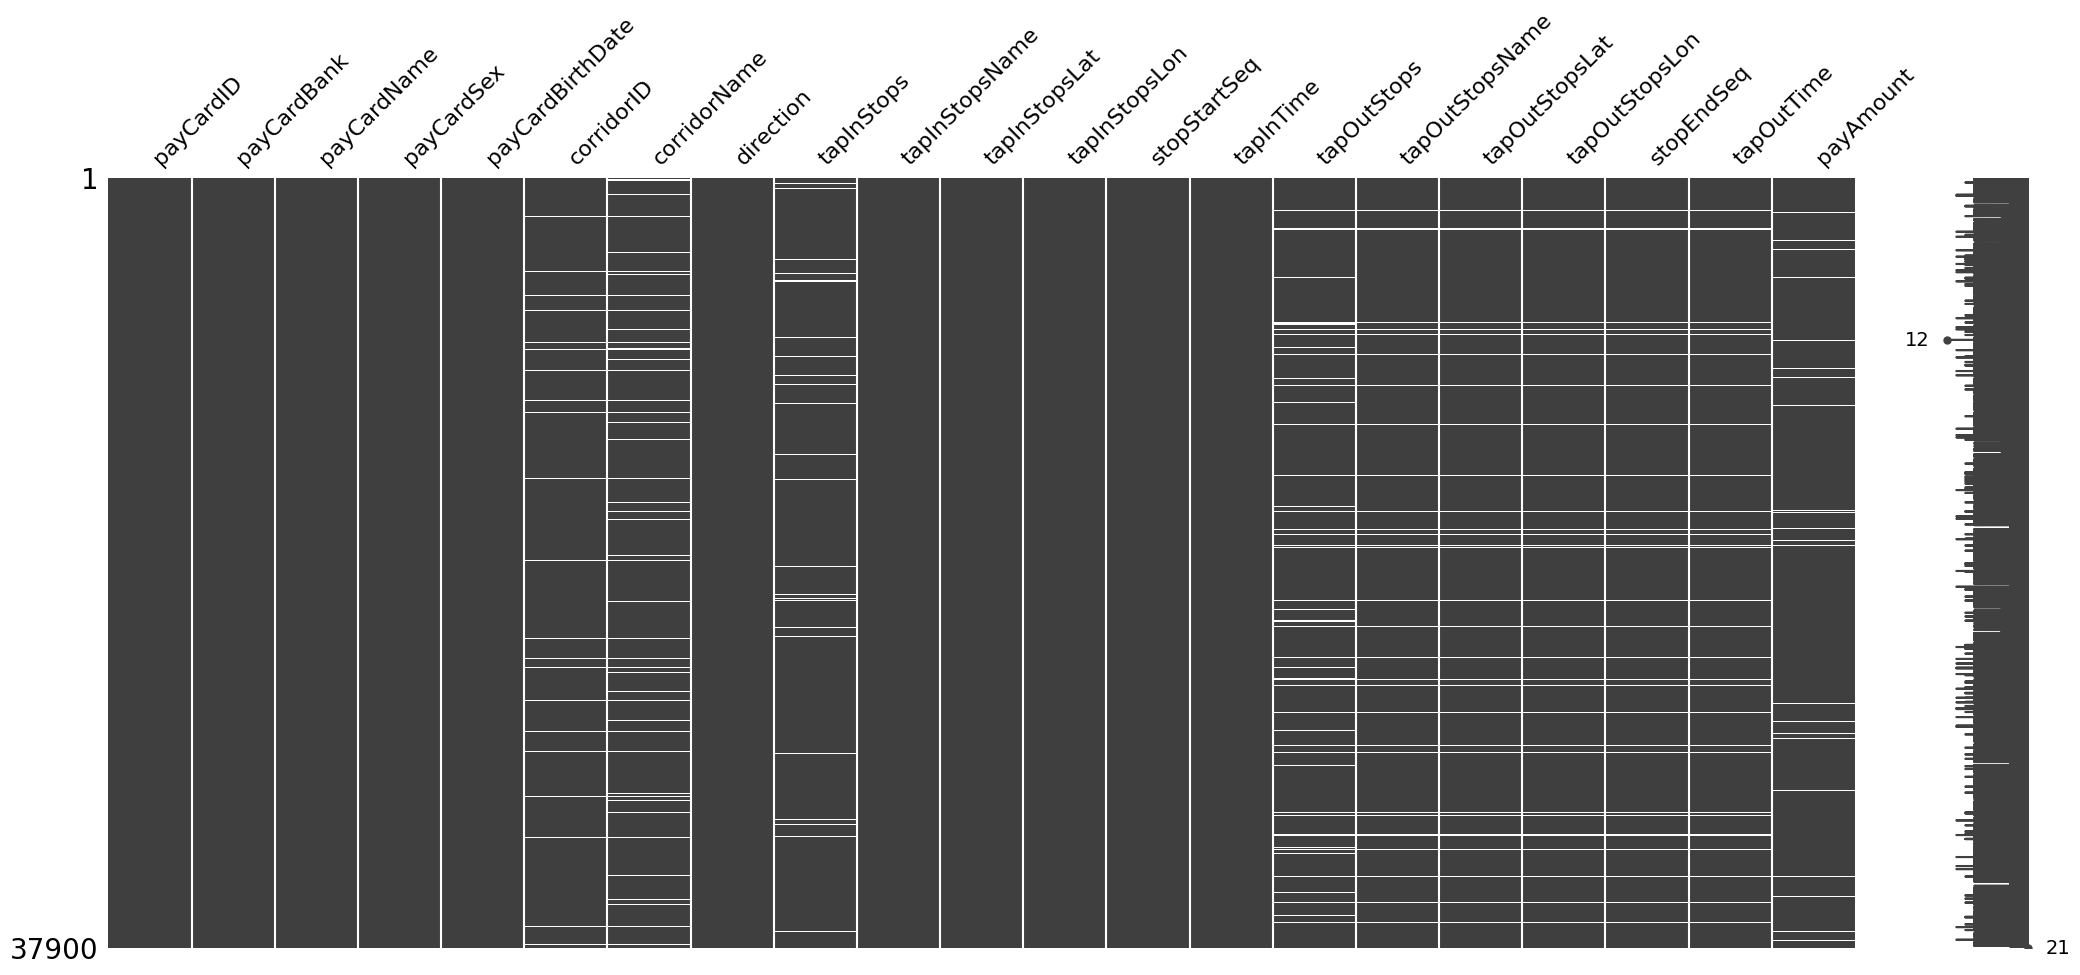

In [211]:
missingno.matrix(df_copy)

Kita telah mengidentifikasi beberapa kolom yang memiliki missing values. Pendekatan yang umum untuk mengatasi missing values adalah dengan menghapus atau mengimputasi data. Menghapus data mungkin bukan pilihan terbaik di sini karena kita tidak ingin kehilangan banyak informasi. Oleh karena itu, kita akan fokus pada imputasi.

### Pay Amount

In [212]:
df_copy['payAmount'].value_counts()

payAmount
3500.0     18503
0.0        16648
20000.0     1742
Name: count, dtype: int64

Pertama, mari kita cek, antara data yang kosong dari `payAmount` dengan kolom `corridorID` untuk menentukan rute apa saja yang tidak memiliki nilai di kolom `payAmount`.

In [213]:
df_copy[df_copy['payAmount'].isna()]['corridorID'].value_counts()


corridorID
M7B        309
JAK.48A    248
M1H        170
JAK.48B    159
3H          90
Name: count, dtype: int64

1. berdasarkan data dari https://money.kompas.com/read/2023/03/13/140000226/naik-angkot-jaklingko-masih-gratis- pada bulan maret 2023. biaya yang diperlukan untuk angkutan umum yang berjenis Jaklingko adalah Rp 0. 
2. berdasarkan data dari https://www.antaranews.com/berita/3482406/pengamat-nilai-wajar-jika-tarif-transjakarta-naik-menjadi-rp5000 pada bulan april 2023. biaya yang diperlukan untuk angkutan umum yang berjenis bus TransJakarta adalah Rp. 3.500
3. berdasarkan data dari sumber dibawah ini.
    1. https://transjakarta.co.id/produk-dan-layanan/layanan-bus/royaltrans/
    1. https://www.aroengbinang.com/2020/01/rute-transjakarta-royaltrans-cibubur-kota-1t.html
    1. https://megapolitan.kompas.com/read/2023/01/27/00150011/rute-royaltrans-b14-summarecon-bekasi-kuningan
    1. https://megapolitan.kompas.com/read/2023/01/26/00150011/rute-royaltrans-d32-cinere-bundaran-senayan
    1. https://megapolitan.kompas.com/read/2023/01/20/00150021/rute-royaltrans-b13-summarecon-bekasi-blok-m
    1. https://megapolitan.kompas.com/read/2023/01/26/01450071/rute-royaltrans-d31-cinere-kuningan

kita perlu menyesuaikan data cleaning untuk kolom payAmount sesuai dengan informasi tersebut.

Mari kita lakukan penyesuaian pada proses data cleaning untuk kolom payAmount dengan memastikan bahwa setiap entri untuk koridor dengan ID 1T, B14, D32, S31, B13, D31, 1K, 6P dan S12 adalah Royaltrans. tarif Royaltrans berdasarkan sumber ini https://news.detik.com/berita/d-6891014/transjakarta-tarif-bus-royaltrans-tetap-rp-20000 adalah `Rp 20.000`, selanjutnya koridor dengan awalan "JAK" memiliki biaya Rp 0  dan selain dari JAK adalah Rp 3500.

In [214]:
# List of corridor IDs to be updated
corridor_ids_to_update = ['1T', 'B14', 'D32', 'S31', 'B13', 'D31', '1K', '6P', 'S12']
corridor_ids_to_update

['1T', 'B14', 'D32', 'S31', 'B13', 'D31', '1K', '6P', 'S12']

In [215]:
# Update the payAmount for the specified corridors to 20000
df_copy.loc[df_copy['corridorID'].isin(corridor_ids_to_update), 'payAmount'] = 20000.0

# Verify the changes
updated_payAmount_for_corridors = df_copy[df_copy['corridorID'].isin(corridor_ids_to_update)]['payAmount'].unique()

updated_payAmount_for_corridors

array([20000.])

In [216]:
df_copy['payAmount'].isnull().sum()

1007

Biaya untuk koridor dengan ID 1T, B14, D32, S31, B13, D31, 1K, 6P dan S12 yang dinamakan Royaltrans telah berhasil diatur ke Rp 20.000. Semua entri untuk koridor tersebut kini memiliki biaya Rp 20.000, sesuai dengan informasi yang diberikan.

In [217]:
df_copy.loc[df_copy['corridorID'].str.startswith('JAK', na=False), 'payAmount'] = 0

df_copy[df_copy['corridorID'].str.startswith('JAK', na=False)]['payAmount'].unique()


array([0.])

Biaya untuk koridor yang dimulai dengan "JAK" telah berhasil diatur ke Rp 0. Semua entri untuk koridor tersebut kini memiliki biaya Rp 0, sesuai dengan informasi yang diberikan.

In [218]:
df_copy['payAmount'].isnull().sum()

600

Selanjutnya, kita akan mengimputasi missing values yang masih hilang pada kolom `payAmount`. pada tahap ini kita akan mengimputasi missing values dengan Rp 35000.

In [219]:
df_copy['payAmount'].fillna(3500, inplace=True)


df_copy['payAmount'].isnull().sum()

0

Missing values yang tersisa pada kolom payAmount telah berhasil diimputasi dengan nilai Rp 3500.

### Tap Out Stops

Kita akan menggunakan groupby dengan kombinasi transform untuk membangun kolom baru yang mengandung mode dari `tapOutStops` berdasarkan setiap keunikan dari data `tapOutStopsName`.

In [220]:

tapInStops_mode = df_copy.groupby('tapOutStopsName')['tapOutStops'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).reset_index()
tapInStops_mode

tapOutStopsName tapOutStops
0                               ABA     B00002P
1                    ACC Simatupang     B00004P
2                      ACE Hardware     B00005P
3                             ASEAN      P00004
4                              ASMI      P00005
...                             ...         ...
2243     Yayasan Perguruan Rakyat 2     B05929P
2244  Yon Arhanud - 10 Pesanggrahan     B05933P
2245            Yos Sudarso Kodamar      P00274
2246          Yos Sudarso Kodamar 1     B05934P
2247          Yos Sudarso Kodamar 2     B05935P

[2248 rows x 2 columns]

pada tahap ini, kita melakukan konversi dua kolom dari DataFrame `tapOutStops_mode` menjadi kamus (`tapOutStops_mapping`). Dalam kamus ini, `tapOutStopsName` adalah kunci dan `tapOutStops` yang paling sering muncul adalah nilainya untuk menyelaraskan dengan `tapOutStopsName` dari `tapOutStops` yang kosong nilai valuenya.

In [221]:
# Membuat mapping dari corridorID ke corridorName 
tapOutStops_mapping = dict(zip(tapInStops_mode['tapOutStopsName'], tapInStops_mode['tapOutStops']))
tapOutStops_mapping

{'ABA': 'B00002P',
 'ACC Simatupang': 'B00004P',
 'ACE Hardware': 'B00005P',
 'ASEAN': 'P00004',
 'ASMI': 'P00005',
 'ASMI 2': 'B00070P',
 'ASSA': 'B06010P',
 'AURI Jatibaru': 'B00086P',
 'Acacia Residence': 'B00003P',
 'Adam Malik': 'P00001',
 'Ahmad Yani Bea Cukai': 'P00002',
 'Ahmad Yani Bea Cukai 1': 'B06534P',
 'Ahmad Yani Pisangan Baru': 'B00013P',
 'Akademi Farmasi Mahadhika': 'B00015P',
 'Akses Jembatan Ciliwung Balekambang': 'B00022P',
 'Al Khairiyah School': 'B00028P',
 'Al Mahbubiyah': 'B00029P',
 'Al Mukhlisin': 'B00030P',
 'Al-Wathoniyah': 'B06709P',
 'Allianz': 'B00034P',
 'Ambassador': 'B02183P',
 'Ampera 1': 'B00035P',
 'Ampera 2': 'B00036P',
 'Ampera 4': 'B00038P',
 'Ancol': 'P00003',
 'Andara Margasatwa 1': 'B00042P',
 'Antena II': 'B00053P',
 'Apartemen Simprug Teras': 'B00058P',
 'Apotik Rini Rawamangun': 'B00060P',
 'Arsip Nasional RI 1': 'B00066P',
 'Arsip Nasional RI 2': 'B00067P',
 'Asrama Marinir Marunda 2': 'B00074P',
 'Asshomadiyah Medicare Centre 2': 'B00077

Selanjutnya, kita akan menggantikan nilai yang hilang pada setiap baris dalam `tapOutStops` berdasarkan `tapOutStopsName` yang kita buat pada langkah sebelumnya. jika penyesuaian nilai dari `tapOutStops` dengan `tapOutStopsName` tidak ditemukan (NaN), maka imputasi nilai `tapOutStops` akan dilewati ke baris yang selanjutnya.

In [222]:
df_copy['tapOutStops'] = df_copy.apply(
    lambda row: tapOutStops_mapping[row['tapOutStopsName']] 
    if pd.isnull(row['tapOutStops']) and pd.notnull(row['tapOutStopsName'])  
    else row['tapOutStops'],
    axis=1
)

In [223]:
df_copy['tapOutStops'].isnull().sum()

1363

Setelah dilakukannya imputasi nilai `tapOutStops` menggunakan berdasarkan  kamus (`tapOutStops_mapping`) yang kita buat pada sebelumnya, masih tersisa 1363 missing value dari 2289 pada kolom `tapOutStops`.  Kita bisa hapus data ini, karena belum ada cara yang sesuai untuk mengisi `corridorID` yang hilang karena random (MCAR) dan tidak seharusnya kolom ini dibiarkan kosong untuk meminimalisir distorsi dalam distribusi data.

In [224]:
df_copy.dropna(subset=['tapOutStops'],inplace=True)

df_copy['tapOutStops'].isnull().sum()

0

### Value Corridor ID dan Corridor Name

#### Corridor ID

Kita akan menggunakan groupby dengan kombinasi transform untuk membangun kolom baru yang mengandung mode dari `corridorID` berdasarkan setiap keunikan dari data `corridorName`.

In [225]:
corridorID_mode = df_copy.groupby('corridorName')['corridorID'].apply(lambda x: x.mode()[0]).reset_index()
corridorID_mode

corridorName corridorID
0        Andara - Stasiun Universitas Pancasila     JAK.44
1                                  BKN - Blok M        M7B
2                                BSD - Jelambar        S11
3                       BSD Serpong - Fatmawati        S12
4                             Batusari - Grogol         8K
..                                          ...        ...
211        Terminal Rawamangun - Cipinang Muara     JAK.74
212          Terminal Tanah Merah - Pulo Gadung    JAK.112
213        Terminal Tanjung Priok - Ancol Barat     JAK.88
214  Tongtek - Tebet Eco Park (TEP) - Cililitan    JAK.43B
215         Universitas Indonesia - Lebak Bulus        D21

[216 rows x 2 columns]

pada tahap ini, kita melakukan konversi dua kolom dari DataFrame `corridorID_mode` menjadi kamus (`corridorID_mapping`). Dalam kamus ini, `corridorName` adalah kunci dan `corridorID` yang paling sering muncul adalah nilainya untuk menyelaraskan dengan `corridorName` dari `corridorID` yang kosong nilai valuenya.

In [226]:
# Membuat mapping dari corridorID ke corridorName 
corridorID_mapping = dict(zip(corridorID_mode['corridorName'], corridorID_mode['corridorID']))
corridorID_mapping

{'Andara - Stasiun Universitas Pancasila': 'JAK.44',
 'BKN - Blok M': 'M7B',
 'BSD - Jelambar': 'S11',
 'BSD Serpong - Fatmawati': 'S12',
 'Batusari - Grogol': '8K',
 'Bekasi Barat - Blok M': 'B13',
 'Bekasi Barat - Kuningan': 'B14',
 'Bekasi Timur - Cawang': 'B21',
 'Bintara - Cipinang Indah': 'JAK.85',
 'Bintaro - Blok M': '8E',
 'Bintaro - Fatmawati': 'S31',
 'Blok M - Andara': 'JAK.31',
 'Blok M - Kota': '1',
 'Blok M - PGC': '7Q',
 'Blok M - Pasar Minggu': '6U',
 'Blok M - Universitas Indonesia': '9H',
 'Bulak Ringin - Kampung Rambutan': 'JAK.38',
 'Bulak Turi - Tanjung Priok': 'JAK.15',
 'Cawang UKI - Lubang Buaya': 'JAK.20',
 'Cempaka Putih - Pulo Gadung via Kelapa Gading': 'JAK.61',
 'Cibubur - BKN': '7C',
 'Cibubur - Balai Kota': '1T',
 'Cibubur - Kuningan': '6P',
 'Cibubur Junction - Blok M': '1K',
 'Cilangkap - Cililitan': 'JAK.36',
 'Ciledug - Tendean': '13',
 'Cililitan - Condet': 'JAK.16',
 'Cililitan - Condet via Kayu Manis': 'JAK.37',
 'Cililitan - Dwikora': 'JAK.21',
 

Selanjutnya, kita akan menggantikan nilai yang hilang pada setiap baris dalam `corridorID` berdasarkan `corridorName` yang kita buat pada langkah sebelumnya. jika penyesuaian nilai dari `corridorID` dengan `corridorName` tidak ditemukan (NaN), maka imputasi nilai `corridorID` akan dilewati ke baris yang selanjutnya.

In [227]:
df_copy['corridorID'] = df_copy.apply(
    lambda row: corridorID_mapping[row['corridorName']] 
    if pd.isnull(row['corridorID']) and pd.notnull(row['corridorName'])  
    else row['corridorID'],
    axis=1
)

In [228]:
df_copy['corridorID'].isnull().sum()

1078

Setelah dilakukannya imputasi nilai `corridorID` menggunakan berdasarkan  kamus (`corridorID_mapping`) yang kita buat pada sebelumnya, masih tersisa 1078 missing value pada kolom `corridorID`.  Kita bisa hapus data ini, karena belum ada cara yang sesuai untuk mengisi `corridorID` yang hilang karena random (MCAR) dan tidak seharusnya kolom ini dibiarkan kosong atau menggunakan modus untuk meminimalisir distorsi dalam distribusi data. tahap penghapusan data akan dilakukan setelah imputasi `corridorName` dibawah ini

#### Corridor Name

Kita akan menggunakan groupby dengan kombinasi transform untuk membangun kolom baru yang mengandung mode dari `corridorName` berdasarkan setiap keunikan dari data `corridorID`.

In [229]:
corridorName_mode = df_copy.groupby('corridorID')['corridorName'].apply(lambda x: x.mode()[0]).reset_index()
corridorName_mode

corridorID                                     corridorName
0            1                                    Blok M - Kota
1           10                            Tanjung Priok - PGC 2
2          10A                    Rusun Marunda - Tanjung Priok
3          10B  Rusun Cipinang Besar Selatan - Penas Kalimalang
4          10D                 Kampung Rambutan - Tanjung Priok
..         ...                                              ...
216        S21                                    Ciputat - CSW
217        S22                       Ciputat - Kampung Rambutan
218        S31                              Bintaro - Fatmawati
219        T11                  Poris Plawad - Bundaran Senayan
220        T21                    Palem Semi - Bundaran Senayan

[221 rows x 2 columns]

pada tahap ini, kita melakukan konversi dua kolom dari DataFrame `corridorName_mode` menjadi kamus (`corridorName_mapping`). Dalam kamus ini, `corridorID` adalah kunci dan `corridorName` yang paling sering muncul adalah nilainya untuk menyelaraskan dengan `CorridorID` dari `CorridorName` yang kosong nilai valuenya.

In [230]:
# Membuat mapping dari corridorID ke corridorName 
corridorName_mapping = dict(zip(corridorName_mode['corridorID'], corridorName_mode['corridorName']))
corridorName_mapping

{'1': 'Blok M - Kota',
 '10': 'Tanjung Priok - PGC 2',
 '10A': 'Rusun Marunda - Tanjung Priok',
 '10B': 'Rusun Cipinang Besar Selatan - Penas Kalimalang',
 '10D': 'Kampung Rambutan - Tanjung Priok',
 '10H': 'Tanjung Priok - Blok M',
 '10K': 'Tanjung Priok - Senen via Taman BMW',
 '11': 'Pulo Gebang - Matraman',
 '11B': 'Rusun Rawa Bebek - Penggilingan',
 '11C': 'Rusun Pinus Elok - Rusun Pulo Gebang',
 '11D': 'Pulo Gebang - Pulo Gadung 2 via PIK',
 '11K': 'Rusun Komarudin - Penggilingan',
 '11M': 'Rusun Rawa Bebek - Bukit Duri',
 '11N': 'Rusun Cipinang Muara - Jatinegara',
 '11P': 'Rusun Pondok Bambu - Walikota Jakarta Timur',
 '11Q': 'Kampung Melayu - Pulo Gebang via BKT',
 '12': 'Tanjung Priok - Pluit',
 '12A': 'Pelabuhan Kaliadem - Kota',
 '12B': 'Pluit - Senen',
 '12C': 'Rusun Waduk Pluit - Penjaringan',
 '12F': 'Rusun Marunda - Rusun Waduk Pluit',
 '12H': 'Rusun Penjaringan - Penjaringan',
 '12P': 'St. LRT Pegangsaan Dua - JIS',
 '13': 'Ciledug - Tendean',
 '13B': 'Puri Beta - Panc

Selanjutnya, kita akan menggantikan nilai yang hilang pada setiap baris dalam `corridorName` berdasarkan `corridorID` yang kita buat pada langkah sebelumnya. jika nilai dari `corridorName` 

In [231]:
df_copy['corridorName'] = df_copy.apply(
    lambda row: corridorName_mapping[row['corridorID']] 
    if pd.isnull(row['corridorName']) and pd.notnull(row['corridorID'])  
    else row['corridorName'],
    axis=1
)

In [232]:
df_copy['corridorName'].isnull().sum()

1078

Setelah dilakukannya imputasi nilai `corridorName` menggunakan berdasarkan  kamus (`corridorName_mapping`) yang kita buat pada sebelumnya, masih tersisa 1078 missing value pada kolom `corridorName`.  Kita bisa hapus data ini, karena belum ada cara yang sesuai untuk mengisi `corridorName` yang hilang karena random (MCAR) dan tidak seharusnya kolom ini dibiarkan kosong meminimalisir distorsi dalam distribusi data. 

pada tahap ini, kita dapat menghapus value data yang masih kosong pada kolom `corridorID` dan `corridorName`.

In [233]:
df_copy.dropna(subset=['corridorID','corridorName'],inplace=True)

df_copy[['corridorID','corridorName']].isnull().sum()

corridorID      0
corridorName    0
dtype: int64

### TapInStops

Kita akan menggunakan groupby dengan kombinasi transform untuk membangun kolom baru yang mengandung mode dari `tapInStops` berdasarkan setiap keunikan dari data `tapInStopsName`.

In [234]:
tapInStops_mode = df_copy.groupby('tapInStopsName')['tapInStops'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).reset_index()
tapInStops_mode

tapInStopsName tapInStops
0                      18 Office Park    B00001P
1                      ACC Simatupang    B00004P
2                        ACE Hardware    B00005P
3                           AKR Tower    B00018P
4                               ASEAN     P00004
...                               ...        ...
2516           Yayasan Muhammadiyah 2    B05925P
2517  Yayasan Nurul Ihsan Pulo Gebang    B05926P
2518       Yayasan Perguruan Rakyat 2    B05929P
2519    Yon Arhanud - 10 Pesanggrahan    B05933P
2520              Yos Sudarso Kodamar     P00274

[2521 rows x 2 columns]

pada tahap ini, kita melakukan konversi dua kolom dari DataFrame `tapInStops_mode` menjadi kamus (`tapInStops_mapping`). Dalam kamus ini, `tapInStopsName` adalah kunci dan `tapInStops` yang paling sering muncul adalah nilainya untuk menyelaraskan dengan `tapInStopsName` dari `tapInStops` yang kosong nilai valuenya.

In [235]:
# Membuat mapping dari corridorID ke corridorName 
tapInStops_mapping = dict(zip(tapInStops_mode['tapInStopsName'], tapInStops_mode['tapInStops']))
tapInStops_mapping

{'18 Office Park': 'B00001P',
 'ACC Simatupang': 'B00004P',
 'ACE Hardware': 'B00005P',
 'AKR Tower': 'B00018P',
 'ASEAN': 'P00004',
 'ASMI': 'P00005',
 'Adam Malik': 'P00001',
 'Adam Malik 1': 'B00008P',
 'Ahmad Yani Bea Cukai': 'P00002',
 'Akper Fatmawati Pondok Labu': 'B00017P',
 'Al Izhar Pondok Labu 2': 'B00027P',
 'Al Khairiyah School': 'B00028P',
 'Al Mukhlisin': 'B00030P',
 'Al Wathoniyah 1': 'B00031P',
 'Al Wathoniyah 2': 'B00032P',
 'Al-Wathoniyah': 'B06709P',
 'Allianz': 'B00034P',
 'Ambassador': 'B02183P',
 'Ampera 1': 'B00035P',
 'Ampera 2': 'B00036P',
 'Ampera 3': 'B00037P',
 'Ampera Garden': 'B00039P',
 'Ampera Yos Sudarso': 'B00040P',
 'Ananda Pulo Gadung': 'B00041P',
 'Ancol': 'P00003',
 'Ancol Pintu 2': 'B06000P',
 'Andara Margasatwa 2': 'B00043P',
 'Andara Margasatwa 3': 'B00044P',
 'Andara Margasatwa 4': 'B00045P',
 'Aneka Apotek': 'B00046P',
 'Aneka PIK Penggilingan': 'B00048P',
 'Antena III': 'B00052P',
 'Apartemen Kedoya Elok 2': 'B00056P',
 'Apartemen Simprug Te

Selanjutnya, kita akan menggantikan nilai yang hilang pada setiap baris dalam `tapInStops` berdasarkan `tapInStopsName` yang kita buat pada langkah sebelumnya. jika penyesuaian nilai dari `tapInStops` dengan `tapInStopsName` tidak ditemukan (NaN), maka imputasi nilai `tapInStops` akan dilewati ke baris yang selanjutnya.

In [236]:
df_copy['tapInStopsName'] = df_copy.apply(
    lambda row: corridorName_mapping[row['tapInStops']] 
    if pd.isnull(row['tapInStopsName']) and pd.notnull(row['tapInStops'])  
    else row['tapInStopsName'],
    axis=1
)

In [237]:
df_copy['tapInStops'].isnull().sum()

1145

Setelah dilakukannya imputasi nilai `tapInStops` menggunakan berdasarkan  kamus (`tapInStops_mapping`) yang kita buat pada sebelumnya, masih tersisa 1145 missing value pada kolom `tapInStops`.  Kita bisa hapus data ini, karena belum ada cara yang sesuai untuk mengisi `corridorID` yang hilang karena random (MCAR) dan tidak seharusnya kolom ini dibiarkan kosong atau menggunakan modus untuk meminimalisir distorsi dalam distribusi data.

In [238]:
df_copy.dropna(subset=['tapInStops'],inplace=True)

df_copy['tapInStops'].isnull().sum()

0

In [239]:
listItem = []
for col in df.columns :
    listItem.append([col, df_copy[col].dtype, df_copy[col].isna().sum(),
                    df_copy[col].nunique(), list(df_copy[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df_copy.shape)
dfDesc

(34314, 21)


dataFeatures        dataType  null  unique  \
0          payCardID          object     0    1971   
1        payCardBank          object     0       6   
2        payCardName          object     0    1964   
3         payCardSex          object     0       2   
4   payCardBirthDate           int64     0      66   
5         corridorID          object     0     221   
6       corridorName          object     0     216   
7          direction          object     0       2   
8         tapInStops          object     0    2491   
9     tapInStopsName          object     0    2490   
10     tapInStopsLat         float64     0    2476   
11     tapInStopsLon         float64     0    2355   
12      stopStartSeq           int64     0      67   
13         tapInTime  datetime64[ns]     0   33650   
14       tapOutStops          object     0    2172   
15   tapOutStopsName          object     0    2171   
16    tapOutStopsLat         float64     0    2160   
17    tapOutStopsLon         float64     0    2067   
18        stopEndSeq         float64     0      74   
19        tapOutTime  datetime64[ns]     0   33750   
20         payAmount         float64     0       3   

                                                         uniqueSample  
0                                  [30375353002744, 6582901155320791]  
1                                                        [flazz, bni]  
2                        [dr. Rahman Anggraini, S.Psi, Sidiq Nuraini]  
3                                                              [M, F]  
4                                                        [2010, 1970]  
5                                                   [JAK.25, JAK.106]  
6   [Stasiun Tebet - Rusun Karet Tengsin, Pinang Ranti - Pulo Gadung]  
7                                             [Keberangkatan, Pulang]  
8                                                  [B04496P, B00035P]  
9                                            [Potlot, SDN Cibubur 11]  
10                                              [-6.34213, -6.292786]  
11                                             [106.85067, 106.85202]  
12                                                           [65, 22]  
13     [2023-04-19T18:39:26.000000000, 2023-04-28T17:28:00.000000000]  
14                                                 [B02324P, B05969P]  
15            [Pasar Jatinegara, Latumeten Stasiun Grogol Arah Utara]  
16                                             [-6.312819, -6.170489]  
17                                             [106.83483, 106.92264]  
18                                                       [54.0, 63.0]  
19     [2023-04-04T07:47:04.000000000, 2023-04-05T22:12:08.000000000]  
20                                                  [20000.0, 3500.0]

## Handling Outliers

In [240]:
numerik_outliers = df_copy.select_dtypes(include= 'number')
numerik_outliers

payCardBirthDate  tapInStopsLat  tapInStopsLon  stopStartSeq  \
0                  2008      -6.184631      106.84402             7   
1                  1997      -6.228700      106.83302            13   
2                  1992      -6.133132      106.81435            38   
3                  1978      -6.195743      106.93526            23   
4                  1982      -6.149650      106.88900             5   
...                 ...            ...            ...           ...   
37895              2004      -6.196892      106.82309             2   
37896              1974      -6.290154      106.88116             1   
37897              1976      -6.216247      106.81676            12   
37898              1976      -6.188656      106.80954            33   
37899              1985      -6.236466      106.74786             2   

       tapOutStopsLat  tapOutStopsLon  stopEndSeq  payAmount  
0           -6.203101       106.85715        12.0     3500.0  
1           -6.217152       106.81892        21.0     3500.0  
2           -6.133731       106.81475        39.0     3500.0  
3           -6.183068       106.93194        29.0     3500.0  
4           -6.135355       106.81143        15.0     3500.0  
...               ...             ...         ...        ...  
37895       -6.290967       106.82365        13.0     3500.0  
37896       -6.291075       106.88634         2.0     3500.0  
37897       -6.370321       106.89628        14.0    20000.0  
37898       -6.188861       106.81135        34.0        0.0  
37899       -6.238340       106.77752         7.0     3500.0  

[34314 rows x 8 columns]

Kolom-kolom berikut ini adalah kandidat yang akan kita analisis untuk mendeteksi outlier:

- `payCardBirthDate`
- `tapInStopsLat`
- `tapInStopsLon`
- `stopStartSeq`
- `tapOutStopsLat`
- `tapOutStopsLon`
- `stopEndSeq`
- `payAmount`

Kita akan menggunakan boxplot untuk memvisualisasikan distribusi data dan mendeteksi outlier.

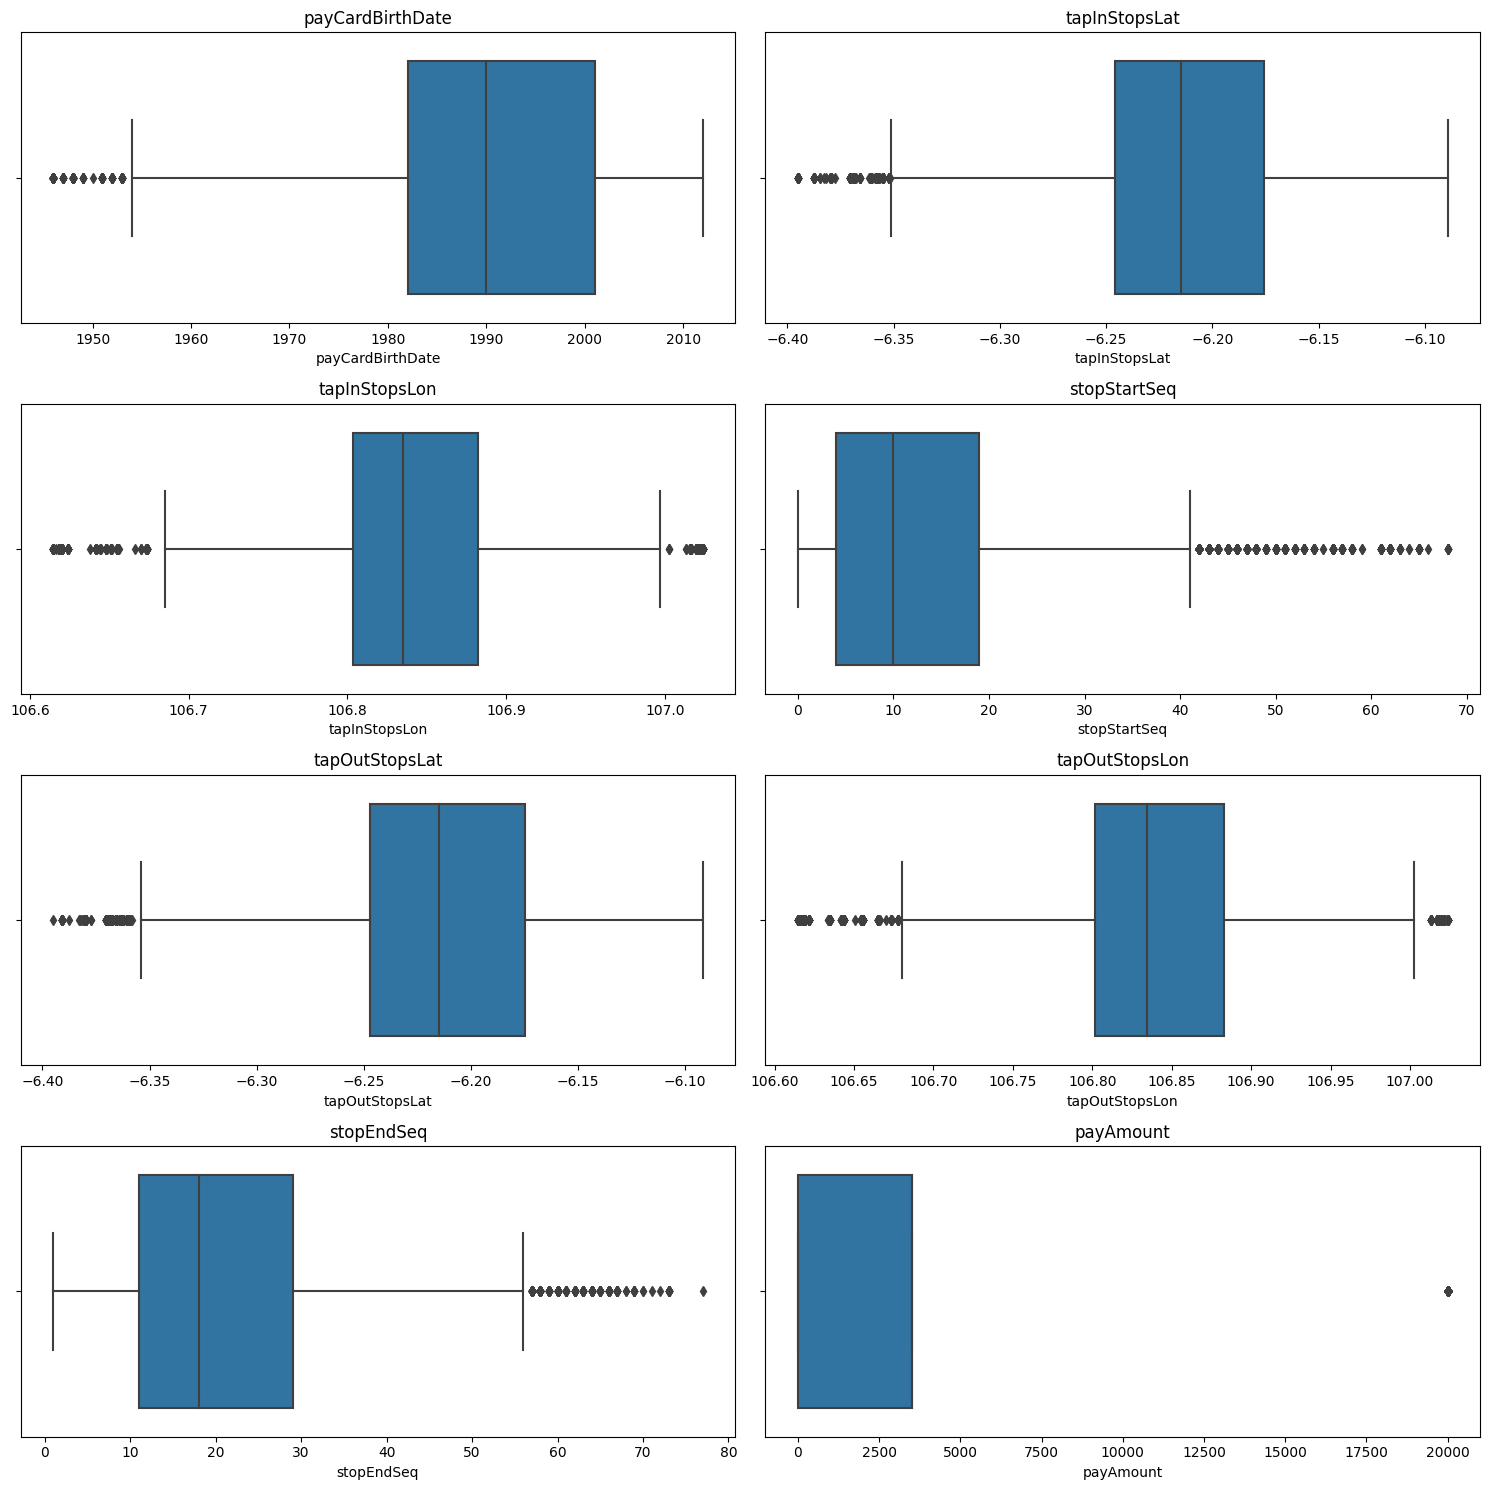

In [241]:
fig = plt.figure(figsize=(15,15)) # horizontal, vertikal

count = 0
for kolom in numerik_outliers.columns:
    count += 1
    plt.subplot(4,2,count)
    sns.boxplot(numerik, x = kolom)
    fig.tight_layout() # biar tidak tertumpuk
    plt.title(f'{kolom}')
plt.show()

dari boxplot di atas, kita dapat membuat beberapa kesimpulan:

- `payCardBirthDate`: Tidak tampak adanya outlier. Semua data tampak berada dalam rentang yang masuk akal.
- `tapInStopsLat` dan `tapInStopsLon`: Tidak tampak adanya outlier. Semua data tampak berada dalam rentang yang masuk akal.
- `stopStartSeq`: Terdapat beberapa nilai yang mungkin dianggap sebagai outlier di bagian atas, tetapi ini mungkin menunjukkan urutan pemberhentian tertentu yang jarang terjadi.
- `tapOutStopsLat` dan `tapOutStopsLon`: Tidak tampak adanya outlier.
- `stopEndSeq`: Sama seperti stopStartSeq, terdapat beberapa nilai yang mungkin dianggap sebagai outlier di bagian atas.
- `payAmount`: Terdapat beberapa nilai yang jelas dianggap sebagai outlier di bagian atas, khususnya nilai 20,000.0. Kita perlu memeriksa apakah ini kesalahan input atau transaksi yang valid.

selanjutnya adalah menggunakan metode statistik untuk mengidentifikasi outlier. Salah satu metode yang umum digunakan adalah IQR (Interquartile Range).

Dengan metode IQR, kita dapat menghitung batas bawah dan batas atas untuk setiap kolom dan kemudian menentukan data mana yang dianggap sebagai outlier.

In [242]:
iqr_data = {}

for col in numeric_columns:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    iqr_data[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

iqr_df = pd.DataFrame(iqr_data).T
iqr_df

Q1           Q3          IQR  lower_bound  \
payCardBirthDate  1982.000000  2001.000000    19.000000  1953.500000   
tapInStopsLat       -6.245863    -6.175528     0.070335    -6.351365   
tapInStopsLon      106.803560   106.882770     0.079210   106.684745   
stopStartSeq         4.000000    19.000000    15.000000   -18.500000   
tapOutStopsLat      -6.247225    -6.174736     0.072489    -6.355958   
tapOutStopsLon     106.801755   106.883410     0.081655   106.679272   
stopEndSeq          11.000000    29.000000    18.000000   -16.000000   
payAmount            0.000000  3500.000000  3500.000000 -5250.000000   

                  upper_bound  
payCardBirthDate  2029.500000  
tapInStopsLat       -6.070025  
tapInStopsLon      107.001585  
stopStartSeq        41.500000  
tapOutStopsLat      -6.066002  
tapOutStopsLon     107.005892  
stopEndSeq          56.000000  
payAmount         8750.000000

Jika suatu nilai dalam kolom berada di bawah "lower_bound" atau di atas "upper_bound", maka nilai tersebut dapat dianggap sebagai outlier.
1. untuk kolom `payAmount`, setiap nilai yang kurang dari -5250 atau lebih dari 8750 dapat dianggap sebagai outlier. Namun, kita tahu  nilai negatif untuk `payAmount` tidak mmungkin, jadi kita hanya perlu memeriksa nilai yang lebih dari 8750.



selanjutnya adalah mengevaluasi data yang dianggap outlier berdasarkan batas-batas tersebut. mari kita identifikasi outlier untuk setiap kolom.

In [243]:
# identifikasi outliers berdasarkan IQR bound
outliers_data = {}

for col, bounds in iqr_df.iterrows():
    outliers = df_copy[(df_copy[col] < bounds['lower_bound']) | (df_copy[col] > bounds['upper_bound'])]
    outliers_data[col] = outliers[col].value_counts()

outliers_df = pd.DataFrame(outliers_data)
outliers_df

payCardBirthDate  tapInStopsLat  tapInStopsLon  stopStartSeq  \
-6.394973                   NaN           33.0            NaN           NaN   
-6.391068                   NaN            NaN            NaN           NaN   
-6.387532                   NaN            5.0            NaN           NaN   
-6.387291                   NaN           20.0            NaN           NaN   
-6.384603                   NaN            2.0            NaN           NaN   
...                         ...            ...            ...           ...   
 1949.000000                8.0            NaN            NaN           NaN   
 1951.000000               44.0            NaN            NaN           NaN   
 1952.000000               16.0            NaN            NaN           NaN   
 1953.000000               37.0            NaN            NaN           NaN   
 20000.000000               NaN            NaN            NaN           NaN   

               tapOutStopsLat  tapOutStopsLon  stopEndSeq  payAmount  
-6.394973                 1.0             NaN         NaN        NaN  
-6.391068                39.0             NaN         NaN        NaN  
-6.387532                 1.0             NaN         NaN        NaN  
-6.387291                 NaN             NaN         NaN        NaN  
-6.384603                 NaN             NaN         NaN        NaN  
...                       ...             ...         ...        ...  
 1949.000000              NaN             NaN         NaN        NaN  
 1951.000000              NaN             NaN         NaN        NaN  
 1952.000000              NaN             NaN         NaN        NaN  
 1953.000000              NaN             NaN         NaN        NaN  
 20000.000000             NaN             NaN         NaN     1606.0  

[148 rows x 8 columns]

Berdasarkan analisis IQR, berikut adalah outlier yang teridentifikasi untuk setiap kolom:

- `payCardBirthDate`: Terdapat beberapa tahun kelahiran yang lebih tua yang dianggap sebagai outlier. Hal ini mungkin menunjukkan beberapa pelanggan yang lebih tua menggunakan layanan ini.
- `tapInStopsLat` dan `tapOutStopsLat`: Terdapat beberapa titik lintang yang dianggap sebagai outlier. Kita perlu memeriksa apakah koordinat ini masuk akal.
- `tapInStopsLon` dan `tapOutStopsLon`: Tidak ada outlier yang terdeteksi.
- `stopStartSeq` dan `stopEndSeq`: Tidak ada outlier yang terdeteksi.
- `payAmount`: Seperti yang kita lihat sebelumnya di boxplot, terdapat 1,606 entri dengan nilai 20,000 yang dianggap sebagai outlier. Perlu investigasi lebih lanjut untuk memahami apakah ini kesalahan input atau transaksi yang valid.

### PayAmount

Untuk kolom payAmount, berdasarkan dari data sumber dibawah ini, 
1. https://transjakarta.co.id/produk-dan-layanan/layanan-bus/royaltrans/
1. https://www.aroengbinang.com/2020/01/rute-transjakarta-royaltrans-cibubur-kota-1t.html
1. https://megapolitan.kompas.com/read/2023/01/27/00150011/rute-royaltrans-b14-summarecon-bekasi-kuningan
1. https://megapolitan.kompas.com/read/2023/01/26/00150011/rute-royaltrans-d32-cinere-bundaran-senayan
1. https://megapolitan.kompas.com/read/2023/01/20/00150021/rute-royaltrans-b13-summarecon-bekasi-blok-m
1. https://megapolitan.kompas.com/read/2023/01/26/01450071/rute-royaltrans-d31-cinere-kuningan

koridor dengan ID 1T, B14, D32, S31, B13, D31, 1K, 6P dan S12 adalah Royaltrans. tarif Royaltrans berdasarkan sumber ini https://news.detik.com/berita/d-6891014/transjakarta-tarif-bus-royaltrans-tetap-rp-20000 adalah `Rp 20.000`.

untuk koridor T21 adalah percepatan dari koridor T11 yang merupakan Transjakarta biasa akan diganti menjadi `RP 3500`

In [244]:
# mengganti biaya untuk koridor 'T21' dari 20000 ke 3500
df_copy.loc[(df_copy['corridorID'] == 'T21') & (df_copy['payAmount'] == 20000), 'payAmount'] = 3500.0

# validasi perubahan
updated_payAmount_for_T21 = df_copy[df_copy['corridorName'] == 'T21']['payAmount'].unique()

updated_payAmount_for_T21

array([], dtype=float64)

In [245]:
corridor_20k = df_copy[df_copy['payAmount'] == 20000][['corridorID', 'corridorName']].drop_duplicates()

corridor_20k

corridorID               corridorName
5             1T       Cibubur - Balai Kota
8            B14    Bekasi Barat - Kuningan
212          D32  Cinere - Bundaran Senayan
579          S31        Bintaro - Fatmawati
12072        B13      Bekasi Barat - Blok M
12111        D31          Cinere - Kuningan
12220         1K  Cibubur Junction - Blok M
12245         6P         Cibubur - Kuningan
12322        S12    BSD Serpong - Fatmawati

### tapInStopsLat dan tapOutStopsLat 

Penanganan outlier untuk koordinat geografis bisa sedikit berbeda dengan data numerik lainnya, karena kita perlu memastikan bahwa koordinat tersebut masuk akal (posisi berada di Jabodetabek).

Mari kita mulai dengan mengevaluasi outlier di tapInStopsLat dan tapOutStopsLat berdasarkan batas IQR yang telah kita hitung sebelumnya.

In [246]:
# menyaring outliers dari tapInStopsLat dan tapOutStopsLat based on IQR bounds
tapInStopsLat_outliers = df_copy[(df_copy['tapInStopsLat'] < iqr_df.loc['tapInStopsLat', 'lower_bound']) | 
                              (df_copy['tapInStopsLat'] > iqr_df.loc['tapInStopsLat', 'upper_bound'])]

tapOutStopsLat_outliers = df_copy[(df_copy['tapOutStopsLat'] < iqr_df.loc['tapOutStopsLat', 'lower_bound']) | 
                               (df_copy['tapOutStopsLat'] > iqr_df.loc['tapOutStopsLat', 'upper_bound'])]

tapInStopsLat_outliers_count = tapInStopsLat_outliers['tapInStopsLat'].value_counts()
tapOutStopsLat_outliers_count = tapOutStopsLat_outliers['tapOutStopsLat'].value_counts()

In [247]:
tapInStopsLat_outliers_count

tapInStopsLat
-6.368735    117
-6.370321     39
-6.394973     33
-6.379273     22
-6.387291     20
-6.354871     19
-6.358301     18
-6.360526     17
-6.357133     16
-6.351933     16
-6.354808      9
-6.365857      8
-6.379631      7
-6.387532      5
-6.351650      2
-6.360054      2
-6.384603      2
-6.360664      1
-6.367500      1
-6.379677      1
-6.382532      1
-6.361780      1
-6.356542      1
-6.369769      1
-6.381864      1
-6.368690      1
-6.379436      1
-6.351941      1
-6.377369      1
-6.379606      1
Name: count, dtype: int64

In [248]:
tapOutStopsLat_outliers_count

tapOutStopsLat
-6.368735    124
-6.370321     44
-6.391068     39
-6.367500     20
-6.363462     19
-6.359265     19
-6.360526     19
-6.380018     18
-6.365855      7
-6.379679      7
-6.380896      2
-6.377369      2
-6.381864      1
-6.394973      1
-6.364269      1
-6.361780      1
-6.363399      1
-6.367222      1
-6.383095      1
-6.379503      1
-6.365910      1
-6.387532      1
-6.362267      1
-6.369751      1
-6.358301      1
-6.379677      1
-6.364144      1
-6.382532      1
-6.362219      1
-6.365166      1
Name: count, dtype: int64

selanjutnya, kita dapat memverifikasi outliers dari `tapInStopsLat` dan `tapOutStopsLat` menggunakan map Jabodetabek. 
1. jika koordinat masuk akal (misalnya berada di luar wilayah Jabodetabek), kita bisa memilih untuk mempertahankan baris data tersebut.
2. jika koordinat tidak masuk akal (misalnya tidak berada di luar wilayah Jabodetabek), kita bisa memilih untuk menghapus baris data tersebut.

In [249]:
# menghitung IQR dan bounds dari tapInStopsLat
Q1_tapIn = df_copy['tapInStopsLat'].quantile(0.25)
Q3_tapIn = df_copy['tapInStopsLat'].quantile(0.75)
IQR_tapIn = Q3_tapIn - Q1_tapIn
lower_bound_tapIn = Q1_tapIn - 1.5 * IQR_tapIn
upper_bound_tapIn = Q3_tapIn + 1.5 * IQR_tapIn

# menyaring the outliers for tapInStopsLat berdasarkan on IQR bounds
tapInStopsLat_outliers = df_copy[(df_copy['tapInStopsLat'] < lower_bound_tapIn) | 
                              (df_copy['tapInStopsLat'] > upper_bound_tapIn)]

# membuat peta yang berpusat di sekitar Jakarta
m_all_outliers = folium.Map(location=[-6.2088, 106.8456], zoom_start=11)

# menambahkan tanda untuk seluruh outlier dari tapInStopsLat
for idx, row in tapInStopsLat_outliers.iterrows():
    folium.Marker([row['tapInStopsLat'], row['tapInStopsLon']], 
                  tooltip=f"Lat: {row['tapInStopsLat']}, Lon: {row['tapInStopsLon']}").add_to(m_all_outliers)

m_all_outliers


In [250]:
# menghitung IQR dan bounds dari tapInStopsLat
Q1_tapIn = df_copy['tapOutStopsLat'].quantile(0.25)
Q3_tapIn = df_copy['tapOutStopsLat'].quantile(0.75)
IQR_tapIn = Q3_tapIn - Q1_tapIn
lower_bound_tapIn = Q1_tapIn - 1.5 * IQR_tapIn
upper_bound_tapIn = Q3_tapIn + 1.5 * IQR_tapIn

# menyaring the outliers for tapInStopsLat berdasarkan on IQR bounds
tapInStopsLat_outliers = df_copy[(df_copy['tapOutStopsLat'] < lower_bound_tapIn) | 
                              (df_copy['tapOutStopsLat'] > upper_bound_tapIn)]

# membuat peta yang berpusat di sekitar Jakarta
m_all_outliers = folium.Map(location=[-6.2088, 106.8456], zoom_start=11)

# menambahkan tanda untuk seluruh outlier dari tapInStopsLat
for idx, row in tapInStopsLat_outliers.iterrows():
    folium.Marker([row['tapOutStopsLat'], row['tapOutStopsLon']], 
                  tooltip=f"Lat: {row['tapOutStopsLat']}, Lon: {row['tapOutStopsLon']}").add_to(m_all_outliers)

m_all_outliers


berdasarkan https://transjakarta.co.id/peta-rute/, outliers dari `tapInStopsLat` dan `tapOutStopsLat` dapat dikategorikan masuk akal karena lokasi koordinat tersebut masih berada di daerah Jabodetabek.

## Data yang sudah bersih

setelah kita melakukan data cleaning, mari kita lihat sekilas informasi dari data yang sudah dilakukan pembersihan

In [251]:
listItem = []
for col in df_copy.columns :
    listItem.append([col, df_copy[col].dtype, df_copy[col].isna().sum(),
                    df_copy[col].nunique(), list(df_copy[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(34314, 21)


dataFeatures        dataType  null  unique  \
0          payCardID          object     0    1971   
1        payCardBank          object     0       6   
2        payCardName          object     0    1964   
3         payCardSex          object     0       2   
4   payCardBirthDate           int64     0      66   
5         corridorID          object     0     221   
6       corridorName          object     0     216   
7          direction          object     0       2   
8         tapInStops          object     0    2491   
9     tapInStopsName          object     0    2490   
10     tapInStopsLat         float64     0    2476   
11     tapInStopsLon         float64     0    2355   
12      stopStartSeq           int64     0      67   
13         tapInTime  datetime64[ns]     0   33650   
14       tapOutStops          object     0    2172   
15   tapOutStopsName          object     0    2171   
16    tapOutStopsLat         float64     0    2160   
17    tapOutStopsLon         float64     0    2067   
18        stopEndSeq         float64     0      74   
19        tapOutTime  datetime64[ns]     0   33750   
20         payAmount         float64     0       3   

                                                      uniqueSample  
0                              [344730537548312, 6011831480860198]  
1                                                 [brizzi, emoney]  
2                                   [Gatra Rahayu, Darijan Wijaya]  
3                                                           [M, F]  
4                                                     [1985, 1982]  
5                                                [JAK.43B, JAK.51]  
6              [Cilangkap - Cililitan, Dwikora - Penas Kalimalang]  
7                                          [Pulang, Keberangkatan]  
8                                                [P00076, B03041P]  
9                                           [SMAN 65, RS Medistra]  
10                                           [-6.22111, -6.312075]  
11                                          [106.78049, 106.94476]  
12                                                        [19, 68]  
13  [2023-04-10T06:09:49.000000000, 2023-04-25T07:03:08.000000000]  
14                                               [B00702P, P00227]  
15                  [KPP Pratama Pasar Rebo, Sbr. Taman Gg. Kelor]  
16                                          [-6.246264, -6.218901]  
17                                         [106.852234, 106.84078]  
18                                                      [3.0, 9.0]  
19  [2023-04-05T23:36:49.000000000, 2023-04-26T20:26:35.000000000]  
20                                                  [0.0, 20000.0]

Sebelum dibersihkan, kita memiliki 37,900 baris data, sekarang kita memiliki 34,314 baris. data yang sebelumnya kosong kita isi dengan nilai yang sebenarnya atau sedekat mungkin dengan nilai asli. lalu sisanya, sekitar 3,586 baris data yang kosong karena random dihapus.

# Exploratory Data Analysis (EDA)

Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **bagaimana karakteristik perilaku pengguna dan rute koridor mana yang sering digunakan pengguna Transjakarta**.

## Berdasarkan Karakteristik Perilaku Pengguna

Pertama, mari kita lihat bagaimana karakteristik perilaku pengguna Transjakarta. Kita akan menganalisis kolom  `payCardBank`, `payCardSex`, `payCardName` dan `payCardBirthDate` untuk menjawab beberapa pertanyaan.

* Bank apa yang paling banyak digunakan?
* kelompok jenis kelamin yang paling tinggi dalam menggunakan Transjakarta?
* kelompok umur yang paling tinggi dalam menggunakan Transjakarta?

### Dari segi bank yang digunakan

In [252]:
df_copy

payCardID payCardBank             payCardName payCardSex  \
0          180062659848800      emoney          Bajragin Usada          M   
1         4885331907664776         dki            Gandi Widodo          F   
2         4996225095064169         dki           Emong Wastuti          F   
3             639099174703       flazz            Surya Wacana          F   
4             570928206772       flazz         Embuh Mardhiyah          M   
...                    ...         ...                     ...        ...   
37895  4685818286724028395      brizzi         Kamila Mahendra          F   
37896     6502902290603767         dki            Titi Siregar          M   
37897      213159426675861      emoney  drg. Zahra Nashiruddin          F   
37898      377840859133591      emoney            Ana Agustina          M   
37899         501862539795       flazz       drg. Leo Najmudin          F   

       payCardBirthDate corridorID                              corridorName  \
0                  2008          5                     Matraman Baru - Ancol   
1                  1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2                  1992        R1A                        Pantai Maju - Kota   
3                  1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
4                  1982         12                     Tanjung Priok - Pluit   
...                 ...        ...                                       ...   
37895              2004         6B         Ragunan - MH Thamrin via Semanggi   
37896              1974         9N                    Pinang Ranti - Pramuka   
37897              1976         1T                      Cibubur - Balai Kota   
37898              1976     JAK.13               Tanah Abang - Jembatan Lima   
37899              1985         13                         Ciledug - Tendean   

           direction tapInStops          tapInStopsName  tapInStopsLat  \
0             Pulang     P00142               Pal Putih      -6.184631   
1      Keberangkatan    B01963P              Kemenkes 2      -6.228700   
2      Keberangkatan    B00499P            Gg. Kunir II      -6.133132   
3      Keberangkatan    B05587P            Taman Elok 1      -6.195743   
4      Keberangkatan     P00239  Sunter Boulevard Barat      -6.149650   
...              ...        ...                     ...            ...   
37895         Pulang     P00261                  Tosari      -6.196892   
37896         Pulang     P00064       Garuda Taman Mini      -6.290154   
37897         Pulang    B02873P           Plaza Sentral      -6.216247   
37898         Pulang    B02505P          Museum Textile      -6.188656   
37899  Keberangkatan     P00001              Adam Malik      -6.236466   

       tapInStopsLon  stopStartSeq           tapInTime tapOutStops  \
0          106.84402             7 2023-04-03 05:21:44      P00253   
1          106.83302            13 2023-04-03 05:42:44     B03307P   
2          106.81435            38 2023-04-03 05:59:06     B04962P   
3          106.93526            23 2023-04-03 05:44:51     B03090P   
4          106.88900             5 2023-04-03 06:17:35      P00098   
...              ...           ...                 ...         ...   
37895      106.82309             2 2023-04-21 18:18:37      P00228   
37896      106.88116             1 2023-04-18 21:52:31      P00179   
37897      106.81676            12 2023-04-04 10:29:47     B00226P   
37898      106.80954            33 2023-04-15 19:59:26     B01787P   
37899      106.74786             2 2023-04-12 21:08:12      P00106   

             tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq  \
0                    Tegalan       -6.203101       106.85715        12.0   
1        Sampoerna Strategic       -6.217152       106.81892        21.0   
2      Simpang Kunir Kemukus       -6.133731       106.81475        39.0   
3          Raya Penggilingan       -6.183068       106.93194        29.0   
4           Kali Besa

In [253]:
df_copy['tapInTime'].describe()

count                            34314
mean     2023-04-16 08:05:12.871597568
min                2023-04-01 06:22:27
25%      2023-04-10 09:03:39.750000128
50%                2023-04-16 17:42:31
75%         2023-04-21 21:42:59.500000
max                2023-04-30 21:51:08
Name: tapInTime, dtype: object

In [254]:
bank_counts = df_copy['payCardBank'].value_counts()
bank_counts

payCardBank
dki       16940
emoney     6229
brizzi     3195
flazz      2929
online     2603
bni        2418
Name: count, dtype: int64

In [255]:
bank_counts_perc = df_copy['payCardBank'].value_counts(normalize=True) * 100
bank_counts_perc

payCardBank
dki       49.367605
emoney    18.152940
brizzi     9.311068
flazz      8.535875
online     7.585825
bni        7.046686
Name: proportion, dtype: float64

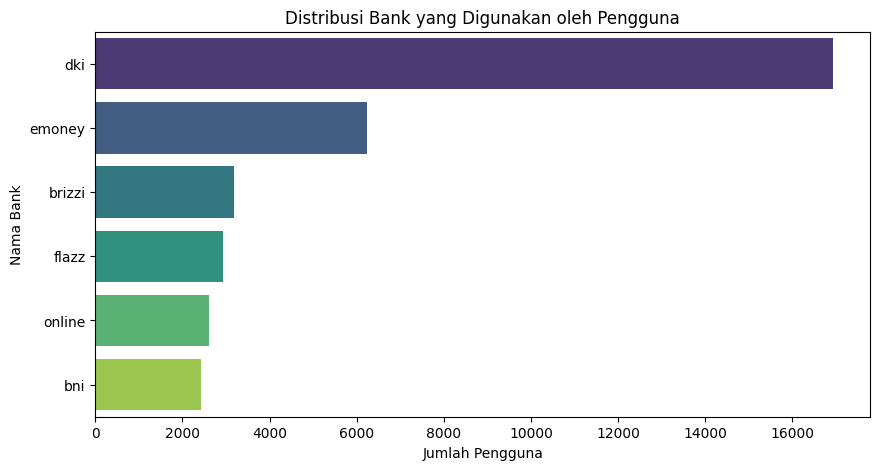

In [256]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_copy, y='payCardBank', order=df_copy['payCardBank'].value_counts().index, palette='viridis')
plt.title('Distribusi Bank yang Digunakan oleh Pengguna')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Nama Bank')
plt.show()


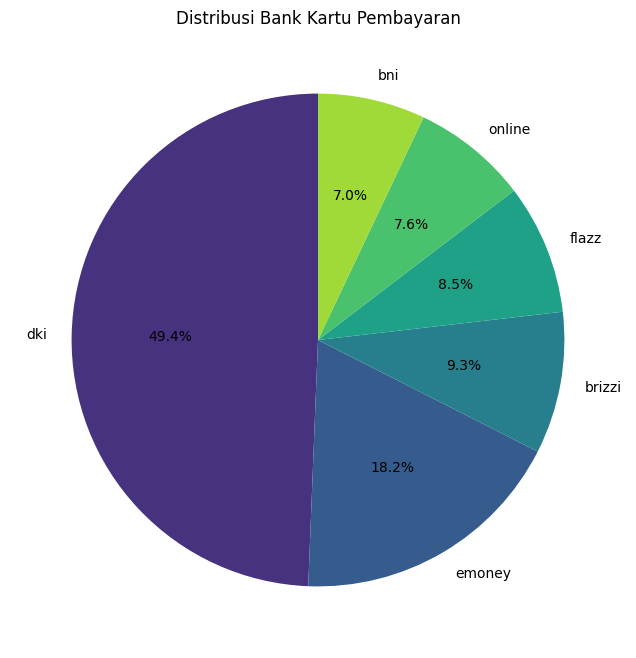

In [257]:
plt.figure(figsize=(12, 8))
bank_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(bank_counts)))
plt.title('Distribusi Bank Kartu Pembayaran')
plt.ylabel('') 
plt.show()

Berdasarkan 2 grafik di atas, kita dapat melihat bahwa sebanyak 16940 atau 49.4% dari total pengguna menggunakan kartu uang elektronik terbitan Bank DKI adalah yang paling banyak digunakan oleh pengguna Transjakarta, kemudian disusul E-Money dari Bank Mandiri sebanyak 6229
 atau 18.2% dan Brizzi dari bank BRI sebanyak 3195 atau 9.3%.

Lanjut ke analisis selanjutnya, distribusi berdasarkan nama pengguna. Karena ada kemungkinan banyak nama yang unik, kita akan melihat 10 nama teratas yang paling sering muncul dalam data.

Lanjut ke analisis selanjutnya, distribusi berdasarkan jenis kelamin pengguna. disini kita akan melihat kelompok jenis kelamin apa yang paling banyak menggunakan Transjakarta

### dari segi jenis kelamin

In [258]:
gender_counts = df_copy['payCardSex'].value_counts()
gender_counts

payCardSex
F    18267
M    16047
Name: count, dtype: int64

In [259]:
# menghitung persentasi dari distribusi jenis kelamin
gender_counts_perc = df_copy['payCardSex'].value_counts(normalize=True) * 100
gender_counts_perc

payCardSex
F    53.234831
M    46.765169
Name: proportion, dtype: float64

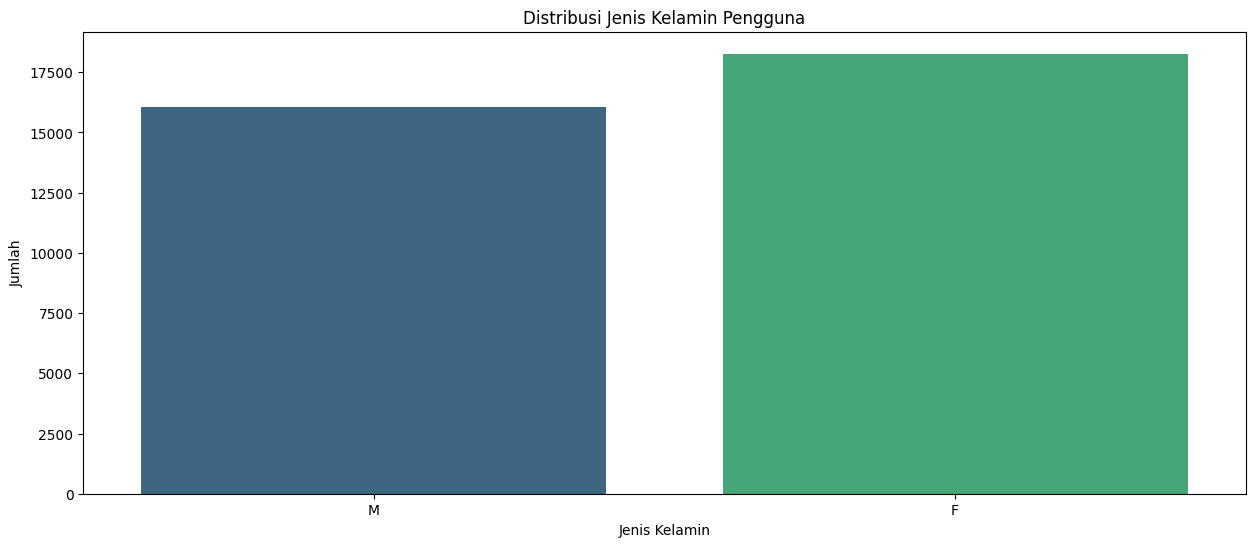

In [260]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_copy, x='payCardSex',  palette='viridis')
plt.title('Distribusi Jenis Kelamin Pengguna')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()

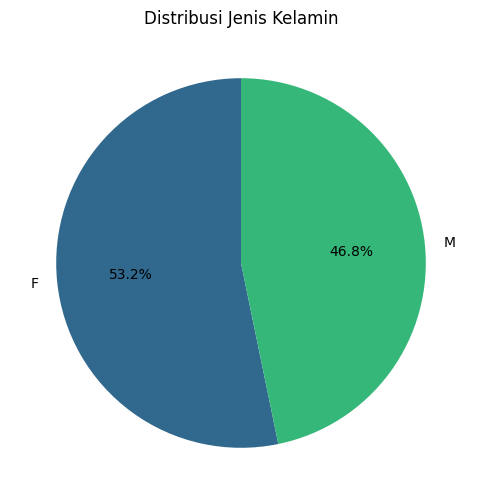

In [261]:
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(gender_counts)))
plt.title('Distribusi Jenis Kelamin')
plt.ylabel('')
plt.show()

Berdasarkan 2 grafik di atas, Proporsi penggunaan antara laki-laki dan perempuan hampir seimbang, dengan sedikit kelebihan pada pengguna perempuan dengan jumlah 18267 atau 53.2% dan pengguna laki-laki berjumlah 16047 atau 46.8%.

Lanjut ke analisis selanjutnya, distribusi berdasarkan usia dari pengguna. disini kita akan melihat kelompok usia berapa yang paling banyak menggunakan Transjakarta

### dari segi usia

In [262]:
# menghitung umur pengguna
current_year = 2023
df_copy['age'] = current_year - df_copy['payCardBirthDate']

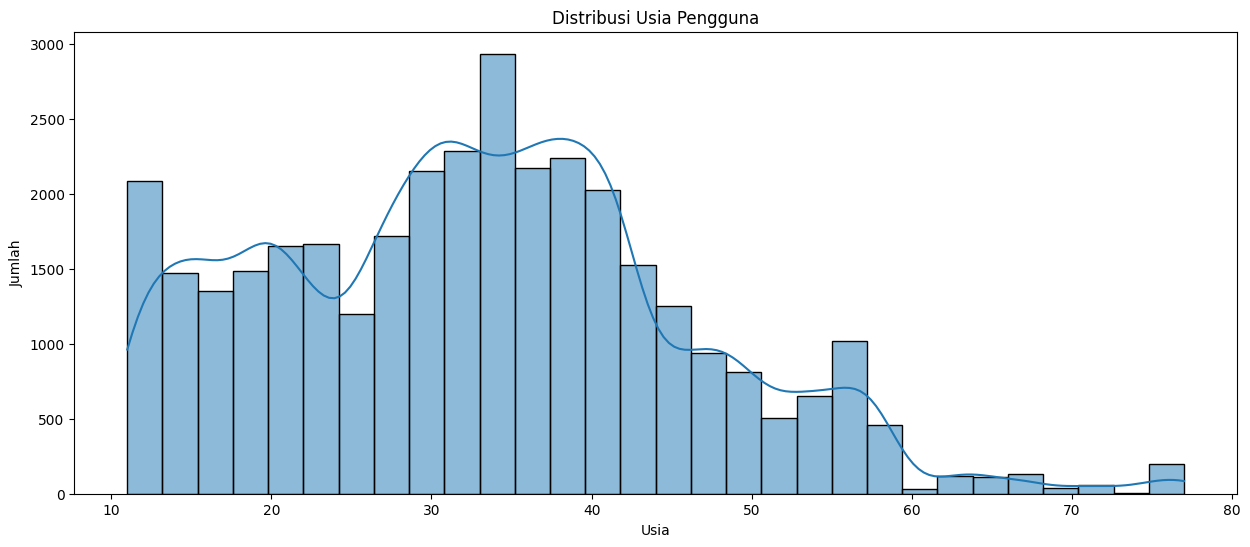

In [263]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df_copy, x='age', bins=30, kde=True)
plt.title('Distribusi Usia Pengguna')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()

In [264]:
# membuat kategori untuk mengelompokkan umur
bins = list(range(11, 81, 5))
labels = [f"{i}-{i+4}" for i in range(11, 76, 5)]
df_copy['age_group'] = pd.cut(df_copy['age'], bins=bins, labels=labels, right=False)
df_copy['age_group'].unique()

['11-15', '26-30', '31-35', '41-45', '16-20', ..., '51-55', '56-60', '66-70', NaN, '71-75']
Length: 14
Categories (13, object): ['11-15' < '16-20' < '21-25' < '26-30' ... '56-60' < '61-65' < '66-70' < '71-75']

In [265]:
# menghitung jumlah dan persentase kelompok umur
age_group_counts = df_copy['age_group'].value_counts()

total_counts = age_group_counts.sum()

age_group_percent = (age_group_counts / total_counts) * 100
age_group_percent

age_group
36-40    15.962798
31-35    15.275503
26-30    13.380323
16-20    10.803697
11-15    10.403018
41-45     9.718648
21-25     8.668694
46-50     6.399158
51-55     4.319724
56-60     3.413079
61-65     0.737015
66-70     0.505966
71-75     0.412377
Name: count, dtype: float64

In [266]:
# menentukan ambang batas nilai
threshold_percent = 4

# menentukan kelompok 'Lainnya'
small_groups = age_group_percent[age_group_percent < threshold_percent].index

In [267]:
# menghitung jumlah dan menambahkan "Lainnya"
lainnya_count = age_group_counts[small_groups].sum()
age_group_counts = age_group_counts.drop(small_groups)
age_group_counts['Lainnya'] = lainnya_count

age_group_counts

age_group
36-40      5458
31-35      5223
26-30      4575
16-20      3694
11-15      3557
41-45      3323
21-25      2964
46-50      2188
51-55      1477
Lainnya    1733
Name: count, dtype: int64

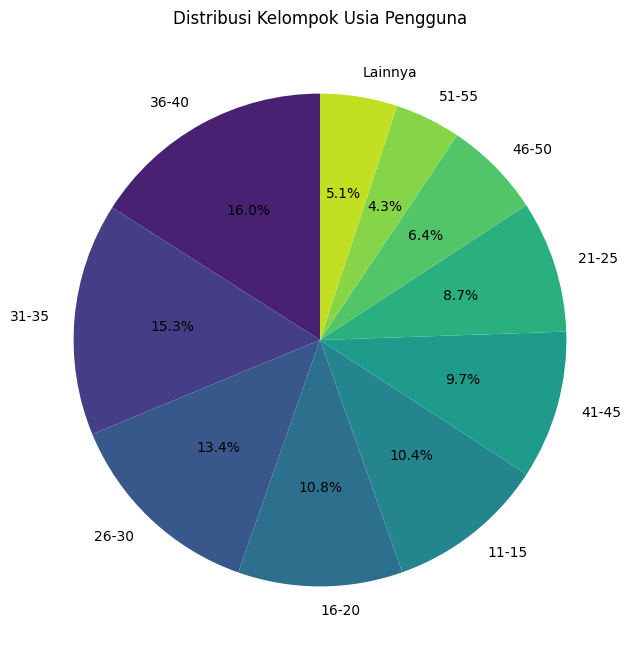

In [268]:
plt.figure(figsize=(12, 8))
age_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(age_group_counts)))
plt.title('Distribusi Kelompok Usia Pengguna')
plt.ylabel('')  # Remove the default y-label
plt.show()

Berdasarkan dua grafik diatas, mayoritas pengguna berusia antara 20 dan 45 tahun. Kelompok usia "36-40" memiliki proporsi terbesar dengan 6045 pengguna atau 16%, lalu diikuti oleh kelompok "31-35" dengan 5743 pengguna atau 15.3% dan "26-30" dengan 5037 pengguna atau 13.4%. Kelompok usia dengan jumlah pengguna paling sedikit (yang tidak termasuk dalam kategori "Lainnya") adalah "51-55" dengan 1630 pengguna atau 4.3%. Ada 1943 atau 5.1% pengguna yang termasuk dalam kategori "Lainnya", yang mencakup semua kelompok usia dengan persentase di bawah 4%.

Dari grafik-grafik pada bagian karakteristik perilaku pengguna, kita bisa menjawab pertanyaan:

* Bank apa yang paling banyak digunakan?
    * sebanyak 49.4%  menggunakan kartu uang elektronik terbitan Bank DKI, kemudian disusul E-Money dari Bank Mandiri sebanyak 18.2% dan Brizzi dari bank BRI sebanyak 9.3%.
* kelompok jenis kelamin yang paling tinggi dalam menggunakan Transjakarta?
    * Proporsi penggunaan antara laki-laki dan perempuan hampir seimbang, dengan sedikit kelebihan pada pengguna perempuan dengan jumlah 53.2% dan pengguna laki-laki berjumlah 46.8%.
* kelompok umur yang paling tinggi dalam menggunakan Transjakarta?
    * mayoritas pengguna berusia antara 20 dan 45 tahun dengan jumlah 53.4%. Kelompok usia "36-40" memiliki proporsi terbesar dengan 16%, lalu diikuti oleh kelompok "31-35" dengan  15.3% dan "26-30" 13.4%. 

## Berdasarkan Traffic Koridor Transjakarta

Pertama, mari kita lihat bagaimana traffic dari koridor Transjakarta. Kita akan menganalisis kolom  `corridorName`, `direction`, `tapInTime` dan `tapOutTime` untuk menjawab beberapa pertanyaan.

* Koridor apa yang banyak digunakan pengguna Transjakarta?
* Koridor apa yang lebih banyak digunakan pengguna untuk berangkat maupun pulang dari aktivitasnya?
* Koridor apa yang memiliki rata-rata durasi perjalanan yang lama?
* berapa biaya dari Transjakarta?

### dari segi penggunaan rute koridor tertinggi

In [269]:
# membuat top 10 penggunaan koridor tertinggi
top_10_corridors = df_copy['corridorName'].value_counts().head(15).index

top_10_corridors

Index(['Cibubur - Balai Kota', 'Ciputat - CSW', 'Pulo Gadung - Monas',
       'Harmoni - Jakarta International Stadium',
       'Kampung Rambutan - Pondok Gede', 'Kalideres - Bundaran HI via Veteran',
       'Rusun Pondok Bambu - Walikota Jakarta Timur',
       'Kebayoran Lama - Tanah Abang', 'Rusun Rawa Bebek - Kodamar',
       'Pasar Minggu - Tanah Abang', 'BKN - Blok M',
       'Kampung Rambutan - Pasar Rebo via Poncol',
       'Ragunan - Blok M via Kemang', 'Blok M - Kota',
       'Kampung Melayu - Pondok Kelapa'],
      dtype='object', name='corridorName')

In [270]:
# filter dataframe untuk memasukkan hanya data 10 koridor teratas
df_top_10_corridors = df_copy[df_copy['corridorName'].isin(top_10_corridors)]

df_top_10_corridors.head(5)

payCardID payCardBank                payCardName payCardSex  \
5   2251412124634980         dki              Tirta Siregar          F   
11   347204308990092      emoney      R.M. Labuh Laksmiwati          F   
29     4682220924642      online  Drs. Nadia Ramadan, S.Sos          M   
37      639040388584       flazz    Galang Megantara, S.Ked          M   
39  3539535695881465         dki     Dr. Zulfa Tamba, S.E.I          M   

    payCardBirthDate corridorID                             corridorName  \
5               1993         1T                     Cibubur - Balai Kota   
11              1984        M7B                             BKN - Blok M   
29              1960         M1                            Blok M - Kota   
37              1989       JIS3  Harmoni - Jakarta International Stadium   
39              1986          2                      Pulo Gadung - Monas   

        direction tapInStops               tapInStopsName  tapInStopsLat  \
5   Keberangkatan    B00127P                     Benhil 3      -6.216010   
11         Pulang     P00254                      Tendean      -6.240213   
29  Keberangkatan     P00183             Polda Metro Jaya      -6.221094   
37  Keberangkatan     P00114  Kemayoran Landas Pacu Timur      -6.152181   
39  Keberangkatan     P00202                 Rawa Selatan      -6.173925   

    tapInStopsLon  stopStartSeq           tapInTime tapOutStops  \
5       106.81632             3 2023-04-03 05:08:01     B00694P   
11      106.83102            12 2023-04-03 06:22:10      P00129   
29      106.81028             5 2023-04-03 06:15:29      P00104   
37      106.85424             9 2023-04-03 06:32:51      P00161   
39      106.85809             9 2023-04-03 05:28:22      P00137   

     tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq  \
5        Grand Sahid       -6.210975       106.82059         6.0   
11  Mampang Prapatan       -6.242699       106.82572        14.0   
29    Karet Sudirman       -6.212457       106.82003         7.0   
37        Pecenongan       -6.167710       106.82819        12.0   
39             Monas       -6.176248       106.82286        19.0   

            tapOutTime  payAmount  age age_group  
5  2023-04-03 05:52:25    20000.0   30     26-30  
11 2023-04-03 06:50:21     3500.0   39     36-40  
29 2023-04-03 06:50:32     3500.0   63     61-65  
37 2023-04-03 07:20:21     3500.0   34     31-35  
39 2023-04-03 06:02:36     3500.0   37     36-40

In [271]:
df_top_10_corridors['corridorName'].value_counts().head(5)

corridorName
Cibubur - Balai Kota                       377
Ciputat - CSW                              362
Pulo Gadung - Monas                        324
Harmoni - Jakarta International Stadium    322
Kampung Rambutan - Pondok Gede             317
Name: count, dtype: int64

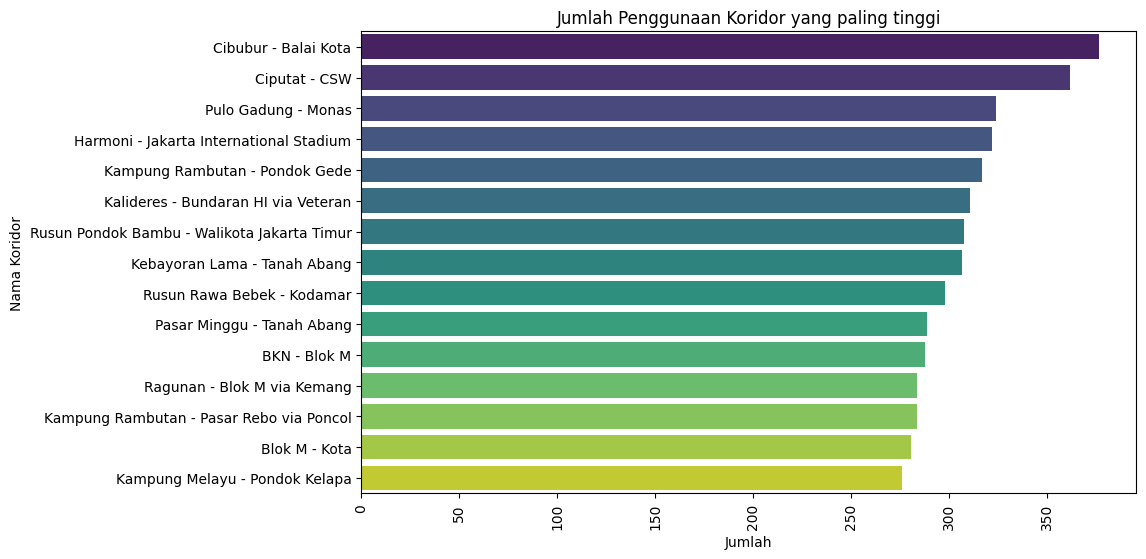

In [272]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_10_corridors, y='corridorName', order=df_top_10_corridors['corridorName'].value_counts().index,  palette='viridis')
plt.title('Jumlah Penggunaan Koridor yang paling tinggi')
plt.xlabel('Jumlah')
plt.ylabel('Nama Koridor')
plt.xticks(rotation=90)
plt.show()


Jumlah Penggunaan Per Koridor yang paling tertinggi:

Koridor "Cibubur - Balai Kota" tampaknya merupakan koridor yang paling banyak digunakan.
Koridor lain seperti "Ciputat - CSW", "Pulogadung - Monas", dan "Harmoni - Jakarta international Stadium" juga memiliki penggunaan yang signifikan.
Beberapa koridor lain memiliki volume pengguna yang lebih rendah.

### dari segi arah perjalanan rute koridor

In [273]:
# Pengelompokan berdasarkan nama koridor dan arah untuk mendapatkan jumlah
corridor_direction_counts = df_copy.groupby(['corridorName', 'direction']).size().unstack().head(10)
corridor_direction_counts

direction                               Keberangkatan  Pulang
corridorName                                                 
Andara - Stasiun Universitas Pancasila            108     118
BKN - Blok M                                      140     148
BSD - Jelambar                                     59      57
BSD Serpong - Fatmawati                            38      49
Batusari - Grogol                                 113     122
Bekasi Barat - Blok M                              62      62
Bekasi Barat - Kuningan                           106     105
Bekasi Timur - Cawang                             104     104
Bintara - Cipinang Indah                           66      64
Bintaro - Blok M                                   79      78

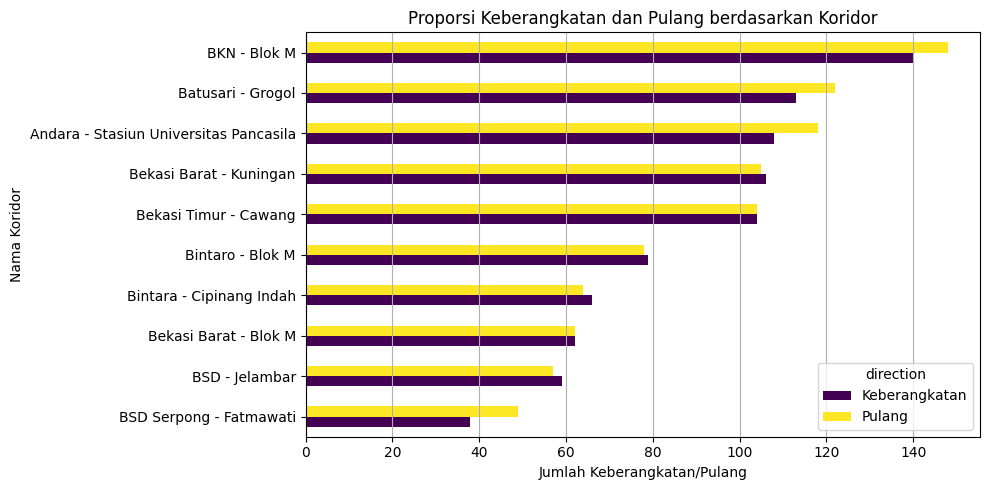

In [274]:
corridor_direction_counts.sort_values(by='Keberangkatan', ascending=True).plot(kind='barh', figsize=(10, 5), colormap='viridis')
plt.title('Proporsi Keberangkatan dan Pulang berdasarkan Koridor')
plt.ylabel('Nama Koridor')
plt.xlabel('Jumlah Keberangkatan/Pulang')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

- Sebagian besar koridor menunjukkan distribusi yang seimbang antara keberangkatan dan kedatangan. Hal ini menunjukkan bahwa aliran penumpang di sebagian besar rute cenderung simetris.
- Namun, ada beberapa koridor yang memiliki lebih banyak keberangkatan daripada kedatangan, atau sebaliknya. Ini dapat menunjukkan bahwa ada pola perjalanan tertentu di koridor-koridor tersebut.

In [275]:
# Memfilter data keberangkatan dengan 10 koridor teratas
top_departures = df_copy[df_copy['direction'] == 'Keberangkatan']['corridorName'].value_counts().head(10)
top_departures

corridorName
Cibubur - Balai Kota                           187
Ciputat - CSW                                  180
Pulo Gadung - Monas                            163
Kampung Rambutan - Pondok Gede                 158
Harmoni - Jakarta International Stadium        157
Rusun Pondok Bambu - Walikota Jakarta Timur    156
Kebayoran Lama - Tanah Abang                   155
Rusun Rawa Bebek - Kodamar                     151
Kalideres - Bundaran HI via Veteran            149
Kampung Rambutan - Pasar Rebo via Poncol       149
Name: count, dtype: int64

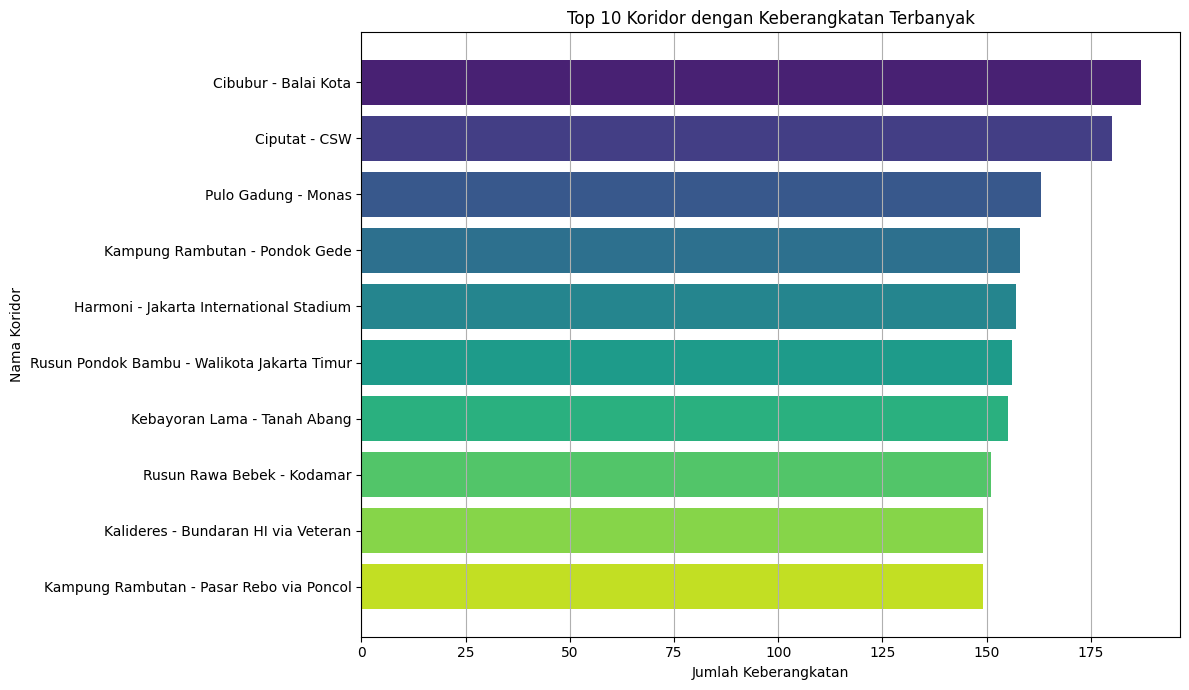

In [276]:
plt.figure(figsize=(12, 7))
plt.barh(top_departures.index, top_departures.values, color=sns.color_palette('viridis', 10))
plt.title('Top 10 Koridor dengan Keberangkatan Terbanyak')
plt.xlabel('Jumlah Keberangkatan')
plt.ylabel('Nama Koridor')
plt.gca().invert_yaxis() 
plt.grid(axis='x')
plt.tight_layout()
plt.show()


- Ada beberapa koridor yang menonjol dengan jumlah keberangkatan yang signifikan. Koridor seperti Cibubur - Balai Kota, Ciputat - CSW, dan Pulo Gadung - Monas adalah yang paling sibuk dalam hal keberangkatan.
- Alasan di balik pola ini dapat bervariasi, mungkin karena lokasi strategis, ketersediaan transportasi alternatif, atau faktor lainnya.

In [277]:
# Memfilter data pulang dengan 10 koridor teratas
top_arrivals = df_copy[df_copy['direction'] == 'Pulang']['corridorName'].value_counts().head(10)
top_arrivals


corridorName
Cibubur - Balai Kota                           190
Ciputat - CSW                                  182
Harmoni - Jakarta International Stadium        165
Kalideres - Bundaran HI via Veteran            162
Pulo Gadung - Monas                            161
Kampung Rambutan - Pondok Gede                 159
Kebayoran Lama - Tanah Abang                   152
Rusun Pondok Bambu - Walikota Jakarta Timur    152
Pasar Minggu - Tanah Abang                     148
BKN - Blok M                                   148
Name: count, dtype: int64

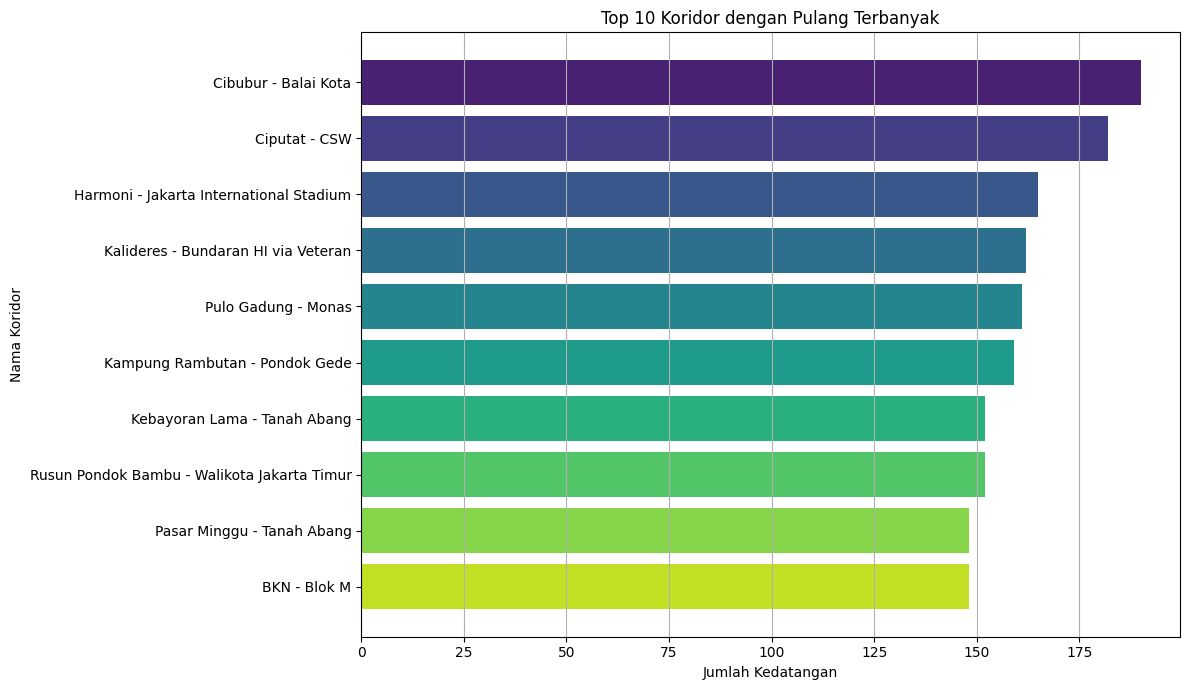

In [278]:
plt.figure(figsize=(12, 7))
plt.barh(top_arrivals.index, top_arrivals.values,  color=sns.color_palette('viridis', 10))
plt.title('Top 10 Koridor dengan Pulang Terbanyak')
plt.xlabel('Jumlah Kedatangan')
plt.ylabel('Nama Koridor')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

- Ada beberapa koridor yang menonjol dengan jumlah pulang yang signifikan. Koridor seperti Cibubur - Balai Kota, Ciputat - CSW, dan Harmoni - Jakarta international Stadium adalah yang paling sibuk dalam hal pulang.
- Alasan di balik pola ini mungkin karena faktor lokasi strategis maupun pekerja yang pulang.

### dari segi pemberhentian halte tertinggi

In [279]:
# Pengelompokan berdasarkan coridorName untuk mendapatkan stopStartSeq dan stopEndSeq unik untuk setiap koridor
corridor_stops = df_copy.groupby('corridorName').agg(
    start_seq=pd.NamedAgg(column='stopStartSeq', aggfunc='first'),
    end_seq=pd.NamedAgg(column='stopEndSeq', aggfunc='first')
)
corridor_stops

start_seq  end_seq
corridorName                                                  
Andara - Stasiun Universitas Pancasila             25     34.0
BKN - Blok M                                       12     14.0
BSD - Jelambar                                      0     10.0
BSD Serpong - Fatmawati                             2      3.0
Batusari - Grogol                                  12     16.0
...                                               ...      ...
Terminal Rawamangun - Cipinang Muara               13     17.0
Terminal Tanah Merah - Pulo Gadung                 14     17.0
Terminal Tanjung Priok - Ancol Barat               20     36.0
Tongtek - Tebet Eco Park (TEP) - Cililitan         19     23.0
Universitas Indonesia - Lebak Bulus                28     35.0

[216 rows x 2 columns]

In [280]:
# Menghitung selisih tiap koridor
corridor_stops['stopDifference'] = corridor_stops['end_seq'] - corridor_stops['start_seq']
corridor_stops = corridor_stops.sort_values(by='stopDifference', ascending=False)

corridor_stops.head(10)

start_seq  end_seq  stopDifference
corridorName                                                                
Taman Kota - Budi Luhur                           3     42.0            39.0
Kampung Rambutan - Blok M                        13     46.0            33.0
Jambore Cibubur - Pasar Rebo                     20     53.0            33.0
Kampung Rambutan - Pasar Rebo via Poncol         14     45.0            31.0
Senen - Pulo Gadung via Kelapa Gading             7     38.0            31.0
Cawang UKI - Lubang Buaya                        13     39.0            26.0
Tanjung Priok - Sukapura                          7     32.0            25.0
Kalibata - Kuningan                              34     59.0            25.0
Cilincing - Rorotan                              39     64.0            25.0
Tanah Abang - Jembatan Lima                       6     29.0            23.0

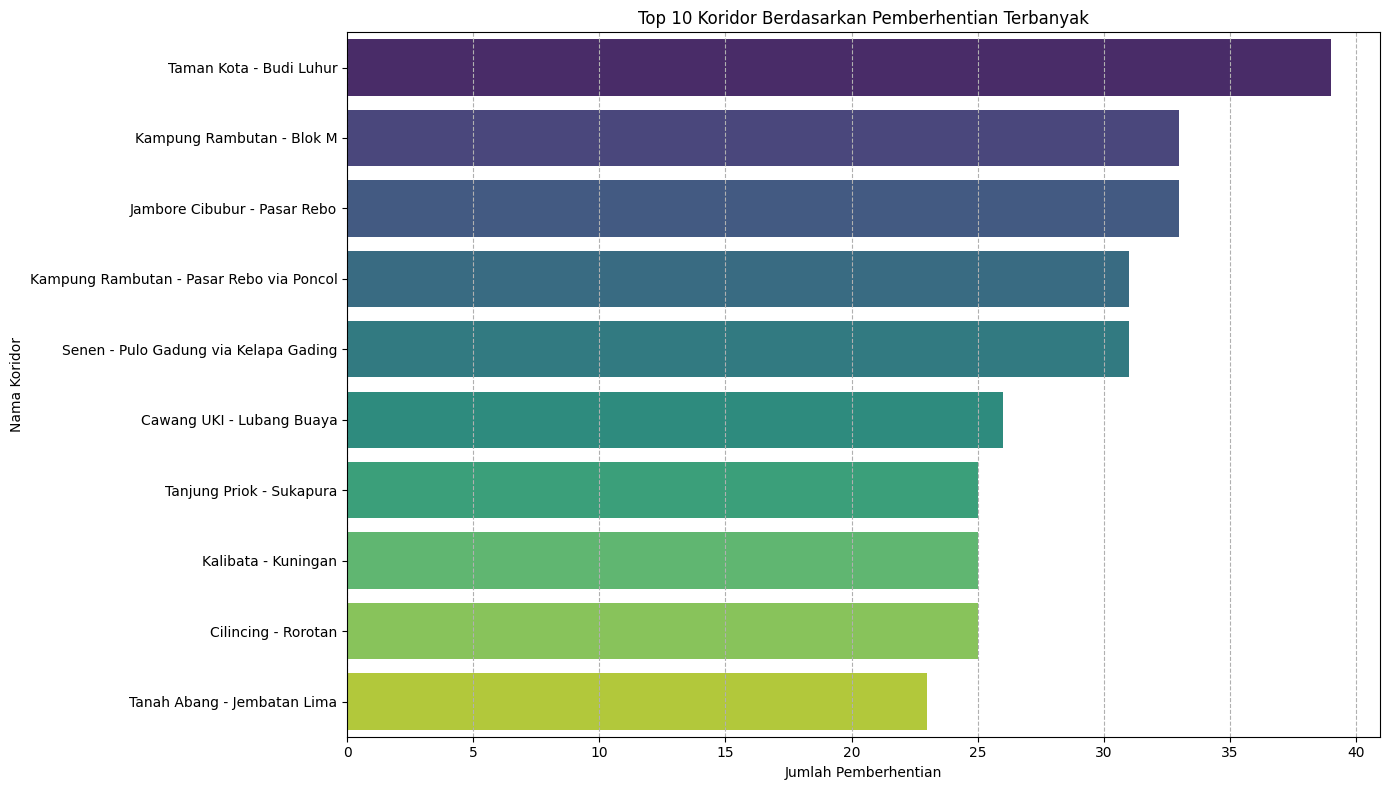

In [281]:
plt.figure(figsize=(14, 8))
sns.barplot(x=corridor_stops.head(10)['stopDifference'], y=corridor_stops.head(10).index, palette="viridis")
plt.title('Top 10 Koridor Berdasarkan Pemberhentian Terbanyak')
plt.xlabel('Jumlah Pemberhentian')
plt.ylabel('Nama Koridor')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

Dari visualisasi tersebut, kita dapat melihat bahwa koridor "Taman Kota - Budi Luhur" memiliki jumlah pemberhentian terbesar dengan jumlah 39 pemberhentian, diikuti oleh koridor "Jambore Cibubur - Pasar Rebo" dengan jumlah 33 pemberhentian dan "Kampung Rambutan - Blok M" dengan jumlah 33 pemberhentian.

### dari segi rata-rata waktu perjalanan koridor

In [282]:
# Hitung waktu perjalanan rata-rata per koridor
df_copy['travel_time'] = (df_copy['tapOutTime'] - df_copy['tapInTime']).dt.total_seconds() / 60  # in minutes

In [283]:
df_copy['travel_time']

0         39.150000
1         57.283333
2         51.816667
3         43.416667
4         39.466667
            ...    
37895     97.200000
37896     35.850000
37897    177.633333
37898     28.400000
37899     26.683333
Name: travel_time, Length: 34314, dtype: float64

In [284]:
avg_travel_time_per_corridor = df_copy.groupby('corridorName')['travel_time'].mean().reset_index()
avg_travel_time_per_corridor = avg_travel_time_per_corridor.sort_values(by='travel_time', ascending=False)
avg_travel_time_per_corridor

corridorName  travel_time
67              Kampung Rambutan - Blok M    84.985294
32                      Cinere - Kuningan    83.192369
177             Stasiun Palmerah - Tosari    81.455862
139                  Rawamangun - Klender    80.694322
156  Rusun Pinus Elok - Rusun Pulo Gebang    80.662893
..                                    ...          ...
118          Pulo Gadung 2 - Dukuh Atas 2    63.966667
173          St. LRT Pegangsaan Dua - JIS    63.602564
101              Pasar Minggu - Jagakarsa    63.570424
112                   Pondok Kelapa - BKN    61.995652
122           Pulo Gebang - Pulo Gadung 2    61.702241

[216 rows x 2 columns]

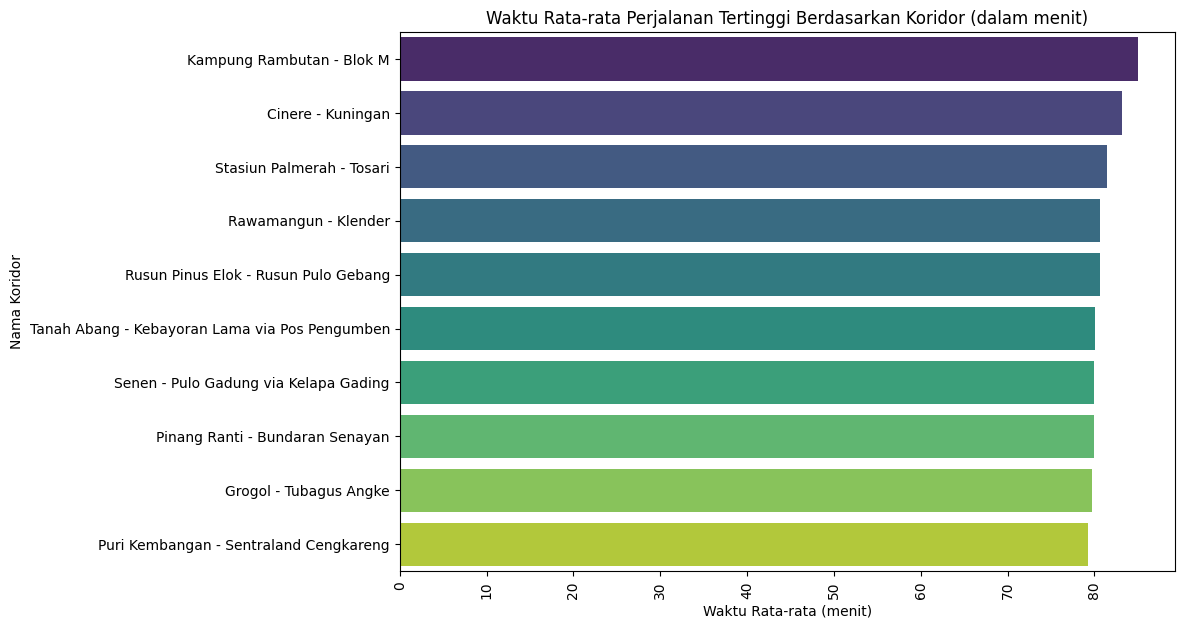

In [285]:
plt.figure(figsize=(10, 7))
sns.barplot(data=avg_travel_time_per_corridor.head(10), x='travel_time', y='corridorName', ci=None, palette='viridis')
plt.title('Waktu Rata-rata Perjalanan Tertinggi Berdasarkan Koridor (dalam menit)')
plt.xlabel('Waktu Rata-rata (menit)')
plt.ylabel('Nama Koridor')
plt.xticks(rotation=90)
plt.show()


Waktu rata-rata perjalanan berbeda-beda untuk setiap koridor, dengan beberapa koridor memiliki waktu perjalanan yang lebih panjang dibandingkan yang lain.
Koridor "Kampung Rambutan - Blok M" memiliki waktu perjalanan rata-rata yang paling lama dengan waktu 85 menit, meskipun koridor ini memiliki volume pengguna tertinggi. Hal ini mungkin menunjukkan efisiensi dalam pengoperasian koridor tersebut.
Beberapa koridor lain seperti "Cinere - Kuningan" dan "Stasiun Palmerah - Tosari" memiliki rata-rata waktu perjalanan yang cukup lama.

### dari segi biaya perjalanan

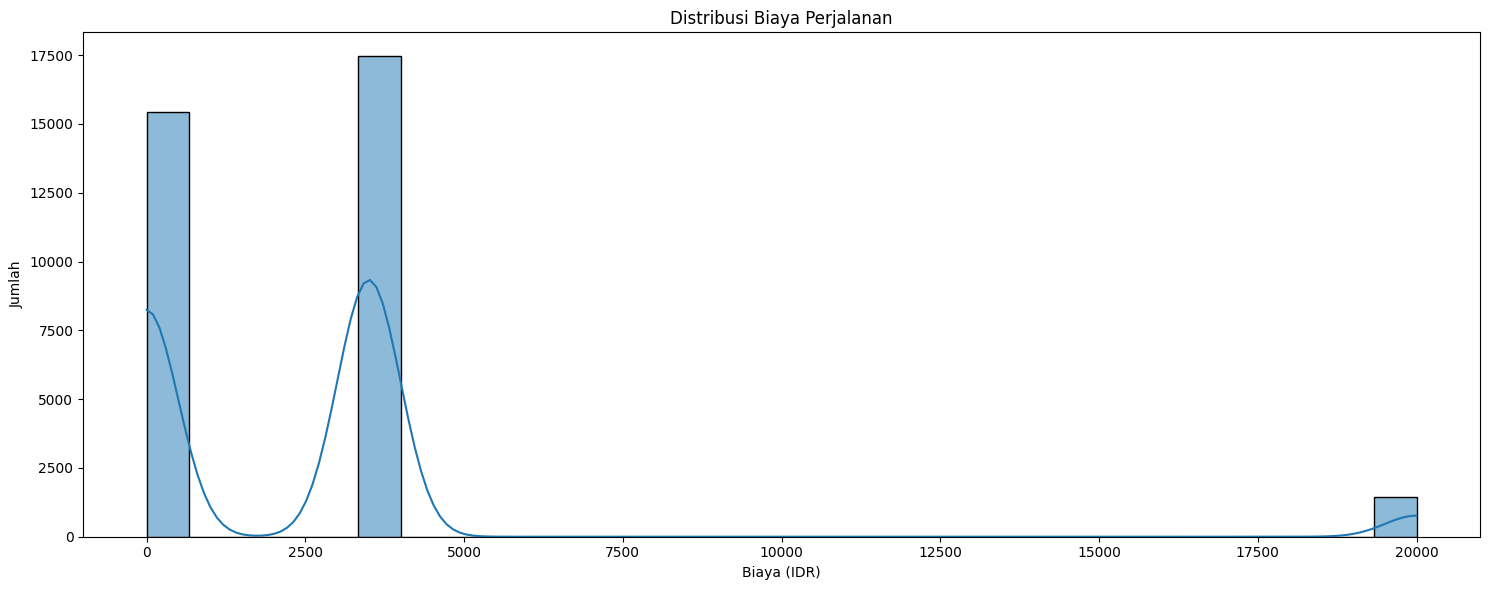

In [286]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.histplot(data=df_copy, x='payAmount', bins=30, ax=ax, kde=True)
ax.set_title('Distribusi Biaya Perjalanan')
ax.set_xlabel('Biaya (IDR)')
ax.set_ylabel('Jumlah')
plt.tight_layout()
plt.show()

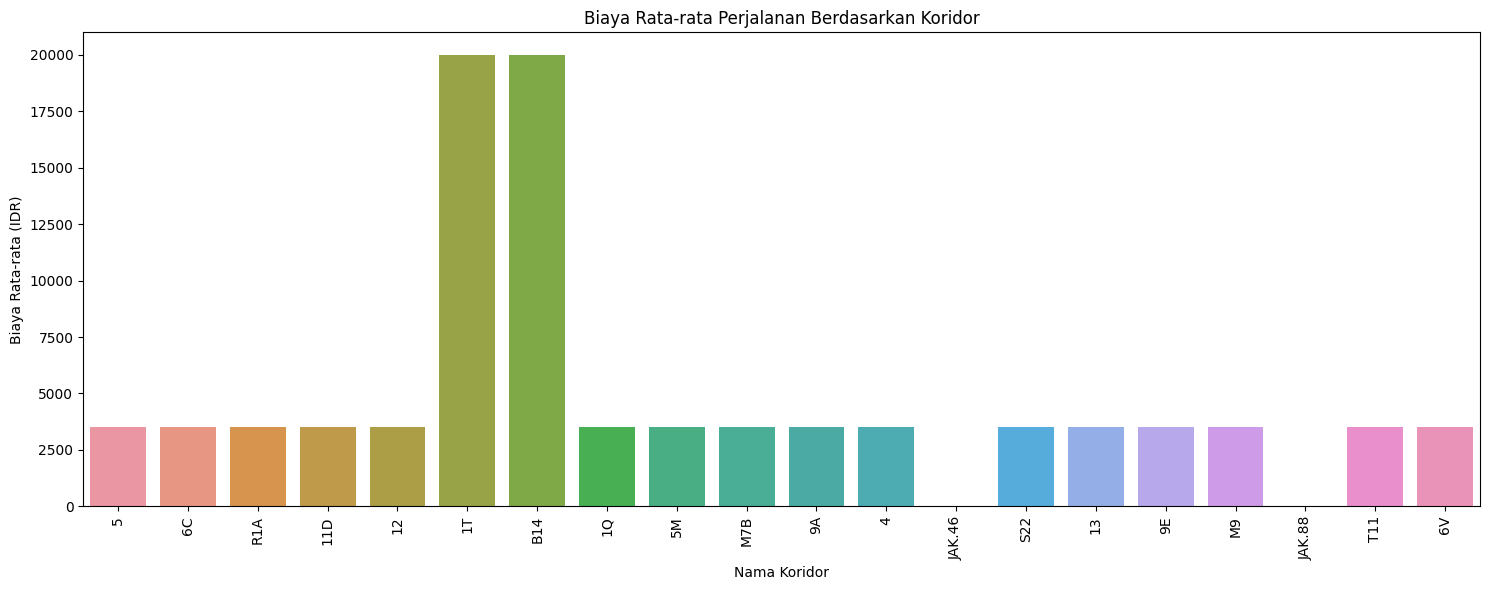

In [287]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data=df_copy.head(20), x='corridorID', y='payAmount', ax=ax, ci=None)
ax.set_title('Biaya Rata-rata Perjalanan Berdasarkan Koridor')
ax.set_xlabel('Nama Koridor')
ax.set_ylabel('Biaya Rata-rata (IDR)')
ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Dari analisis biaya perjalanan:
Sebagian besar perjalanan memiliki biaya sekitar Rp 3500. Ini mungkin merupakan tarif dasar untuk sebagian besar rute Transjakarta. Namun, ada beberapa perjalanan dengan biaya Rp 0 dan Rp 20.000, hal ini karena rute yang digunakan adalah Jaklingko yang masih disubsidi gratis dan Royaltrans dengan harga Rp 20.000.

Dari grafik-grafik pada bagian Traffic Koridor Transjakarta, kita bisa menjawab pertanyaan:

* Koridor apa yang banyak digunakan pengguna Transjakarta?
    * Koridor "Cibubur - Balai Kota" merupakan koridor yang paling banyak digunakan. Koridor lain seperti "Ciputat - CSW", "Pulogadung - Monas", dan "Harmoni - Jakarta international Stadium" juga memiliki penggunaan yang signifikan.
* Koridor apa yang lebih banyak digunakan pengguna untuk berangkat maupun pulang dari aktivitasnya?
    *  Koridor seperti Cibubur - Balai Kota, Ciputat - CSW, dan Pulo Gadung - Monas adalah yang paling sibuk dalam hal keberangkatan sedangkan Koridor seperti Cibubur - Balai Kota, Ciputat - CSW, dan Harmoni - Jakarta international Stadium adalah yang paling sibuk dalam hal pulang. hampir seluruh koridor memiliki proporsi penggunakan koridor yang sama. namun ada beberapa koridor yang memiliki proporsi kedatangan atau pulang yang lebih tinggi seperti Pulogadung - Monas, Harmoni - Jakarta international Stadium dan lain sebagainya.
* Koridor apa yang memiliki rata-rata durasi perjalanan yang lama?
    * Koridor "Kampung Rambutan - Blok M" memiliki waktu perjalanan rata-rata yang paling lama dengan waktu 85 menit. Beberapa koridor lain seperti "Cinere - Kuningan" dan "Stasiun Palmerah - Tosari" memiliki rata-rata waktu perjalanan yang cukup lama.
* berapa biaya dari Transjakarta?
    * Sebagian besar perjalanan memiliki biaya sekitar Rp 3500. Ini mungkin merupakan tarif dasar untuk sebagian besar rute Transjakarta. Namun, ada beberapa perjalanan dengan biaya Rp 0 dan Rp 20.000, hal ini karena rute yang digunakan adalah Jaklingko yang masih di subsidi gratis dan Royaltrans dengan harga Rp 20.000.

## Berdasarkan Waktu Sibuk Halte Transjakarta

Pertama, mari kita lihat bagaimana traffic dari koridor Transjakarta. Kita akan menganalisis kolom  `tapInTime`, `tapOutTime`, `tapInStopsName` dan `tapOutStopsName` untuk menjawab beberapa pertanyaan.

* Kapan waktu jam sibuk dari halte Transjakarta yang digunakan pengguna untuk masuk dan keluar?
* Dari waktu jam sibuk yang didapat sebelumnya, halte Transjakarta apa saja yang aktivitas tap in dan tap outnya terbanyak?
* Dari waktu jam sibuk yang didapat sebelumnya, halte Transjakarta apa saja yang aktivitas tap in dan tap outnya terbanyak di sore hari?
* Kapan waktu hari sibuk dari halte Transjakarta yang digunakan pengguna untuk masuk dan keluar?

### dari segi jam dengan tap in dan tap out tertinggi

In [288]:
# membuat value jam dari tapInTime dan tapOutTime
df_copy['tapIn_hour'] = df_copy['tapInTime'].dt.hour
df_copy['tapOut_hour'] = df_copy['tapOutTime'].dt.hour

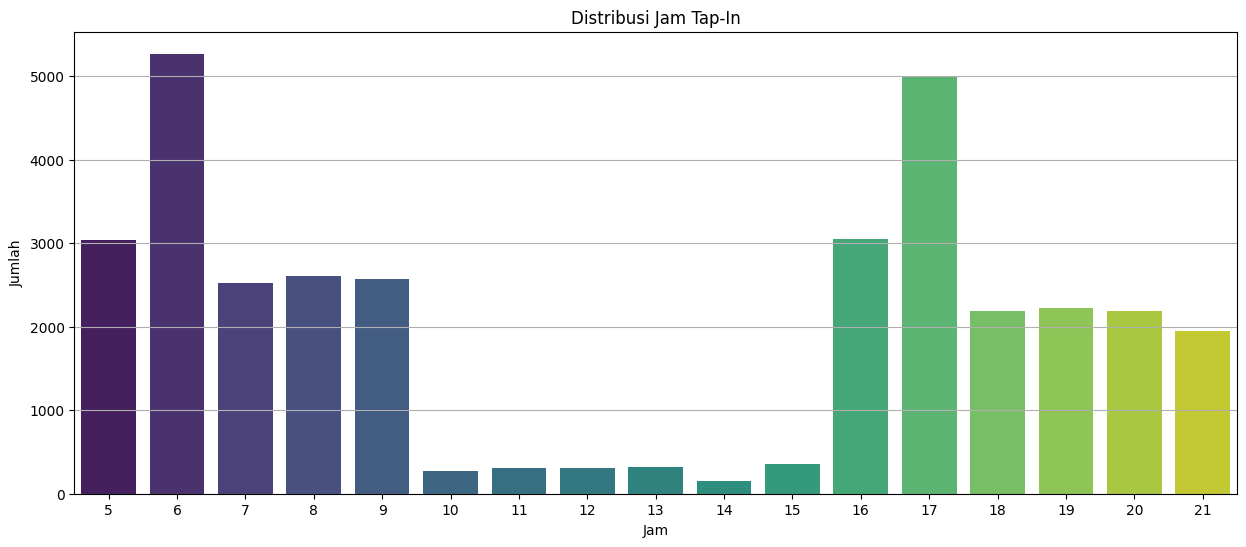

In [289]:
plt.figure(figsize=(15, 6))

sns.countplot(data=df_copy, x='tapIn_hour', palette='viridis')
plt.title('Distribusi Jam Tap-In')
plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.grid(axis='y')

plt.show()

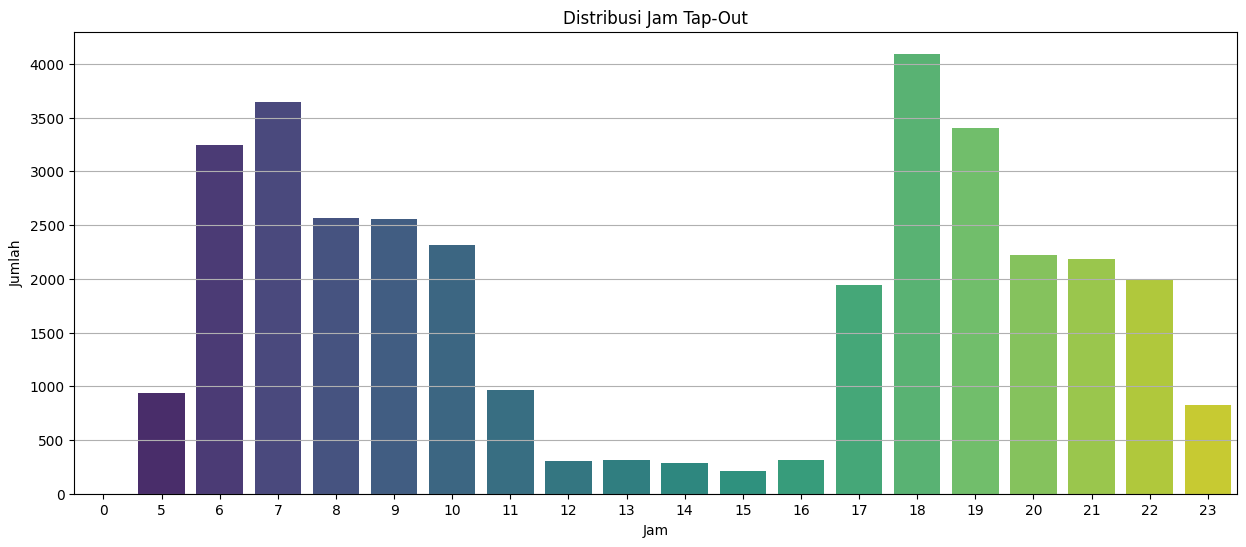

In [290]:
plt.figure(figsize=(15, 6))

sns_plot = sns.countplot(data=df_copy, x='tapOut_hour', palette='viridis')
plt.title('Distribusi Jam Tap-Out')
plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.grid(axis='y')

plt.show()

In [291]:
# menggabungkan dataframe 'tapIn_hour' dan 'tapOut_hour' di kolom yang sama
df_combined_hour = df_copy.melt(value_vars=['tapIn_hour', 'tapOut_hour'], 
                         var_name='Type', 
                         value_name='Hour')
df_combined_hour

Type  Hour
0       tapIn_hour     5
1       tapIn_hour     5
2       tapIn_hour     5
3       tapIn_hour     5
4       tapIn_hour     6
...            ...   ...
68623  tapOut_hour    19
68624  tapOut_hour    22
68625  tapOut_hour    13
68626  tapOut_hour    20
68627  tapOut_hour    21

[68628 rows x 2 columns]

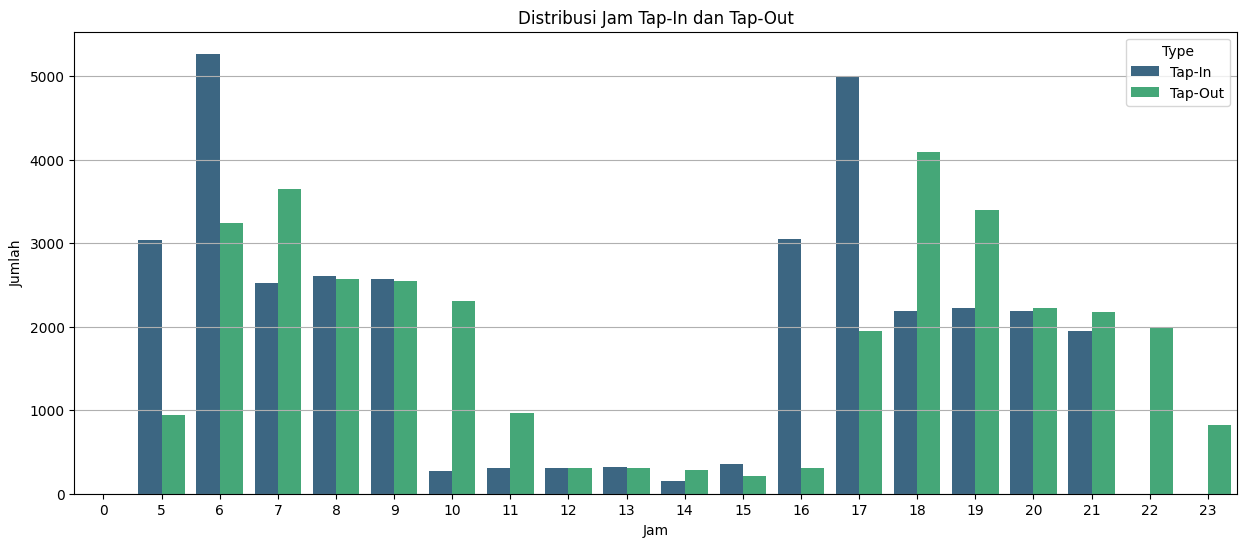

In [292]:
plt.figure(figsize=(15, 6))

sns.countplot(data=df_combined_hour, x='Hour', hue='Type', palette='viridis')
plt.title('Distribusi Jam Tap-In dan Tap-Out')
plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.grid(axis='y')
plt.legend(title='Type', labels=['Tap-In', 'Tap-Out'])

plt.show()

Dari visualisasi distribusi jam tap-in dan tap-out, ada dua puncak utama dalam penggunaan Transjakarta:
- yang pertama adalah di pagi hari sekitar jam 5-9 untuk halte tap in dan sekitar jam 6-10 untuk halte tap out.
- yang kedua di sore hari sekitar jam 16-20 untuk halte tap in dan sekitar jam 17-21 untuk halte tap out. 
- Hal Ini menunjukkan bahwa jam-jam sibuk atau jam puncak, yang mungkin berkaitan dengan jam masuk dan pulang kerja.
- lalu perbedaan selisih 1 jam antara tap in dan tap out dikarenakan proses perjalanan koridor dari keberangkatan sampai turun.
- Ada penurunan tajam dalam penggunaan sekitar tengah hari (sekitar jam 10-15), yang menunjukkan periode sepi.
- pada jam 22-23 tidak ada lagi pengguna yang melakukan tap in

#### dari segi halte dengan aktivitas tap in dan tap out terbanyak di pagi hari (5:00 - 9:00)

In [293]:
# Halte dengan aktivitas terbanyak pada pagi hari (5:00 - 10:00)
morning_data_tapin = df_copy[(df_copy['tapInTime'].dt.hour >= 5) & (df_copy['tapInTime'].dt.hour <= 10)]
morning_data_tapin.head(5)

payCardID payCardBank      payCardName payCardSex  payCardBirthDate  \
0   180062659848800      emoney   Bajragin Usada          M              2008   
1  4885331907664776         dki     Gandi Widodo          F              1997   
2  4996225095064169         dki    Emong Wastuti          F              1992   
3      639099174703       flazz     Surya Wacana          F              1978   
4      570928206772       flazz  Embuh Mardhiyah          M              1982   

  corridorID                              corridorName      direction  \
0          5                     Matraman Baru - Ancol         Pulang   
1         6C  Stasiun Tebet - Karet via Patra Kuningan  Keberangkatan   
2        R1A                        Pantai Maju - Kota  Keberangkatan   
3        11D       Pulo Gebang - Pulo Gadung 2 via PIK  Keberangkatan   
4         12                     Tanjung Priok - Pluit  Keberangkatan   

  tapInStops          tapInStopsName  tapInStopsLat  tapInStopsLon  \
0     P00142               Pal Putih      -6.184631      106.84402   
1    B01963P              Kemenkes 2      -6.228700      106.83302   
2    B00499P            Gg. Kunir II      -6.133132      106.81435   
3    B05587P            Taman Elok 1      -6.195743      106.93526   
4     P00239  Sunter Boulevard Barat      -6.149650      106.88900   

   stopStartSeq           tapInTime tapOutStops        tapOutStopsName  \
0             7 2023-04-03 05:21:44      P00253                Tegalan   
1            13 2023-04-03 05:42:44     B03307P    Sampoerna Strategic   
2            38 2023-04-03 05:59:06     B04962P  Simpang Kunir Kemukus   
3            23 2023-04-03 05:44:51     B03090P      Raya Penggilingan   
4             5 2023-04-03 06:17:35      P00098       Kali Besar Barat   

   tapOutStopsLat  tapOutStopsLon  stopEndSeq          tapOutTime  payAmount  \
0       -6.203101       106.85715        12.0 2023-04-03 06:00:53     3500.0   
1       -6.217152       106.81892        21.0 2023-04-03 06:40:01     3500.0   
2       -6.133731       106.81475        39.0 2023-04-03 06:50:55     3500.0   
3       -6.183068       106.93194        29.0 2023-04-03 06:28:16     3500.0   
4       -6.135355       106.81143        15.0 2023-04-03 06:57:03     3500.0   

   age age_group  travel_time  tapIn_hour  tapOut_hour  
0   15     11-15    39.150000           5            6  
1   26     26-30    57.283333           5            6  
2   31     31-35    51.816667           5            6  
3   45     41-45    43.416667           5            6  
4   41     41-45    39.466667           6            6

In [294]:
# i. Halte dengan aktivitas tap out terbanyak pada pagi hari (05.00 - 10.00)
morning_data_tapout = df_copy[(df_copy['tapOutTime'].dt.hour >= 5) & (df_copy['tapOutTime'].dt.hour <= 10)]
morning_data_tapout.head(5)

payCardID payCardBank      payCardName payCardSex  payCardBirthDate  \
0   180062659848800      emoney   Bajragin Usada          M              2008   
1  4885331907664776         dki     Gandi Widodo          F              1997   
2  4996225095064169         dki    Emong Wastuti          F              1992   
3      639099174703       flazz     Surya Wacana          F              1978   
4      570928206772       flazz  Embuh Mardhiyah          M              1982   

  corridorID                              corridorName      direction  \
0          5                     Matraman Baru - Ancol         Pulang   
1         6C  Stasiun Tebet - Karet via Patra Kuningan  Keberangkatan   
2        R1A                        Pantai Maju - Kota  Keberangkatan   
3        11D       Pulo Gebang - Pulo Gadung 2 via PIK  Keberangkatan   
4         12                     Tanjung Priok - Pluit  Keberangkatan   

  tapInStops          tapInStopsName  tapInStopsLat  tapInStopsLon  \
0     P00142               Pal Putih      -6.184631      106.84402   
1    B01963P              Kemenkes 2      -6.228700      106.83302   
2    B00499P            Gg. Kunir II      -6.133132      106.81435   
3    B05587P            Taman Elok 1      -6.195743      106.93526   
4     P00239  Sunter Boulevard Barat      -6.149650      106.88900   

   stopStartSeq           tapInTime tapOutStops        tapOutStopsName  \
0             7 2023-04-03 05:21:44      P00253                Tegalan   
1            13 2023-04-03 05:42:44     B03307P    Sampoerna Strategic   
2            38 2023-04-03 05:59:06     B04962P  Simpang Kunir Kemukus   
3            23 2023-04-03 05:44:51     B03090P      Raya Penggilingan   
4             5 2023-04-03 06:17:35      P00098       Kali Besar Barat   

   tapOutStopsLat  tapOutStopsLon  stopEndSeq          tapOutTime  payAmount  \
0       -6.203101       106.85715        12.0 2023-04-03 06:00:53     3500.0   
1       -6.217152       106.81892        21.0 2023-04-03 06:40:01     3500.0   
2       -6.133731       106.81475        39.0 2023-04-03 06:50:55     3500.0   
3       -6.183068       106.93194        29.0 2023-04-03 06:28:16     3500.0   
4       -6.135355       106.81143        15.0 2023-04-03 06:57:03     3500.0   

   age age_group  travel_time  tapIn_hour  tapOut_hour  
0   15     11-15    39.150000           5            6  
1   26     26-30    57.283333           5            6  
2   31     31-35    51.816667           5            6  
3   45     41-45    43.416667           5            6  
4   41     41-45    39.466667           6            6

In [295]:
# menentukan stasiun tap in dan tap out teratas di pagi hari
top_morning_tapin = morning_data_tapin['tapInStopsName'].value_counts().head(10)
top_morning_tapout = morning_data_tapout['tapOutStopsName'].value_counts().head(10)

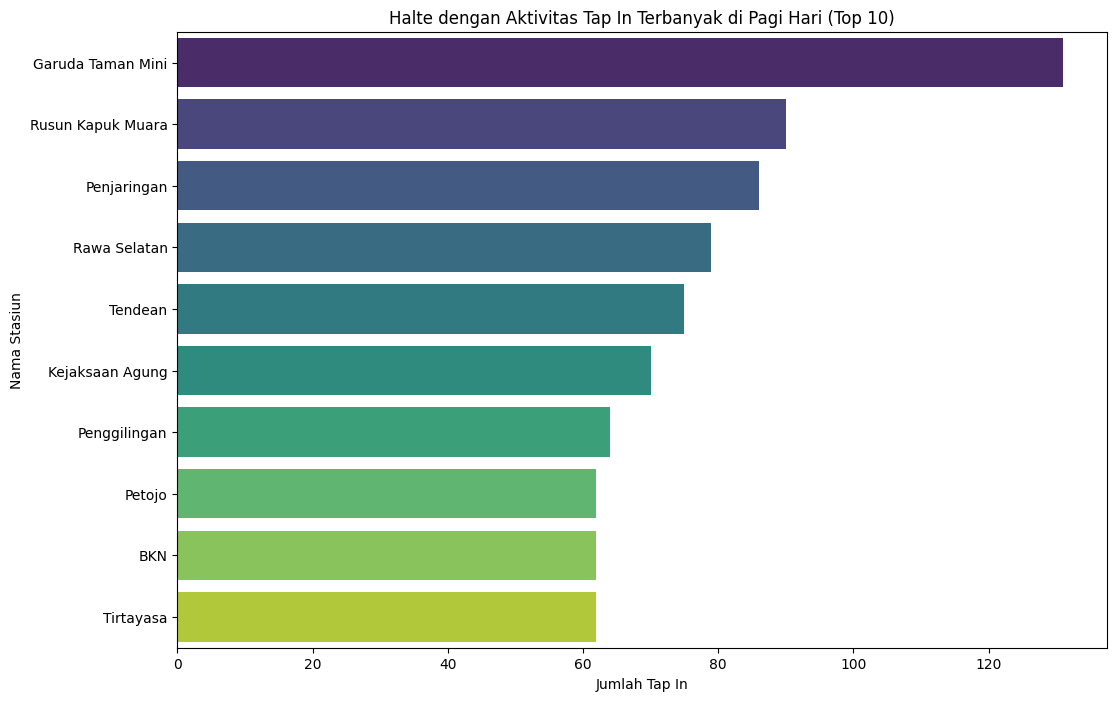

In [296]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_morning_tapin.values, y=top_morning_tapin.index, palette='viridis')
plt.title('Halte dengan Aktivitas Tap In Terbanyak di Pagi Hari (Top 10)')
plt.xlabel('Jumlah Tap In')
plt.ylabel('Nama Stasiun')
plt.show()

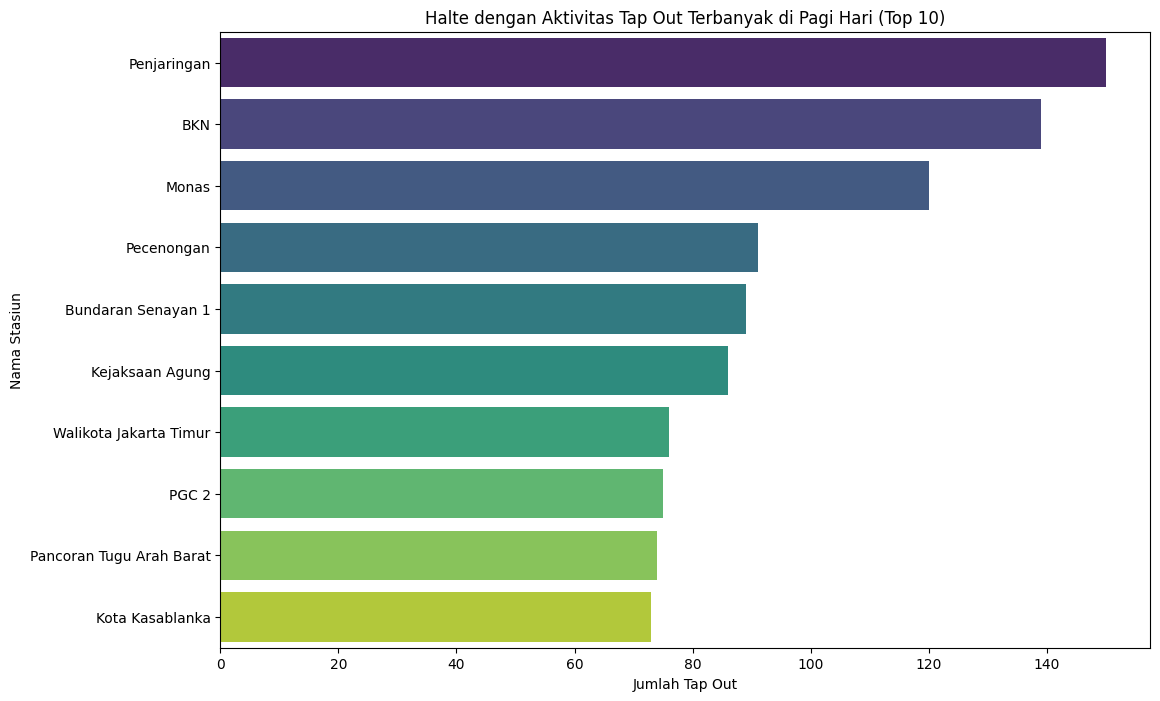

In [297]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_morning_tapout.values, y=top_morning_tapout.index, palette='viridis')
plt.title('Halte dengan Aktivitas Tap Out Terbanyak di Pagi Hari (Top 10)')
plt.xlabel('Jumlah Tap Out')
plt.ylabel('Nama Stasiun')
plt.show()

Halte dengan aktivitas tap in dan tap out terbanyak di pagi hari (5:00 - 9:00):
- Garuda Taman Mini adalah halte dengan aktivitas tap in terbanyak di pagi hari, dengan lebih dari 130 aktivitas. Hal ini menandakan bahwa banyak pengguna memulai perjalanan mereka dari halte ini di pagi hari.
- Penjaringan menonjol sebagai salah satu halte dengan aktivitas tap in dan tap out yang tinggi di pagi hari. aktivitas tap out lebih dari 150 aktivitas Ini menunjukkan bahwa halte ini cukup sibuk di pagi hari, dengan banyak pengguna yang masuk dan khususnya keluar dari halte ini.
- Sebagian besar halte di daftar ini memiliki aktivitas tap in yang lebih tinggi dibandingkan dengan tap out di pagi hari. Ini mungkin menunjukkan bahwa lebih banyak orang memulai perjalanan mereka ke tempat kerja atau tujuan lain di pagi hari dari halte-halte ini.
- Ada beberapa halte, seperti BKN dan Kejaksaan Agung, yang memiliki aktivitas tap in dan tap out yang hampir sama di pagi hari. Hal ini dapat menandakan bahwa halte tersebut mungkin berada di lokasi yang strategis, di mana banyak orang masuk dan keluar di pagi hari.

#### dari segi halte dengan aktivitas tap in dan tap out terbanyak di sore hari (17:00 - 21:00)

In [298]:
# Halte dengan aktivitas tap out terbanyak pada sore hari (16:00 - 21:00)
evening_data = df_copy[(df_copy['tapOutTime'].dt.hour >= 16) & (df_copy['tapOutTime'].dt.hour <= 21)]
evening_data.head(10)

payCardID payCardBank               payCardName payCardSex  \
300   180062659848800      emoney            Bajragin Usada          M   
301  4885331907664776         dki              Gandi Widodo          F   
303      639099174703       flazz              Surya Wacana          F   
304      570928206772       flazz           Embuh Mardhiyah          M   
305  2251412124634980         dki             Tirta Siregar          F   
306   213155822653833      emoney     R. Devi Hariyah, S.T.          M   
307  3587341902618993         dki           Darmanto Rajasa          F   
308  6510013988638519         dki    Cagak Maheswara, S.Sos          F   
309  3580401035990896         dki    T. Dadap Pradana, M.Ak          M   
310  5541851157087967         dki  Oskar Widiastuti, S.Farm          F   

     payCardBirthDate corridorID                              corridorName  \
300              2008          5                     Matraman Baru - Ancol   
301              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
303              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
304              1982         12                     Tanjung Priok - Pluit   
305              1993         1T                      Cibubur - Balai Kota   
306              1974     JAK.18                       Kalibata - Kuningan   
307              1991     JAK.03                      Lebak Bulus - Andara   
308              1992        B14                   Bekasi Barat - Kuningan   
309              2004         1Q                           Rempoa - Blok M   
310              1997         5M   Kampung Melayu - Tanah Abang via Cikini   

         direction tapInStops                   tapInStopsName  tapInStopsLat  \
300  Keberangkatan     P00021                       Budi Utomo      -6.166063   
301         Pulang    B03318P                  Sawo Kecik Raya      -6.224852   
303         Pulang    B02947P                       Pool Taksi      -6.188631   
304         Pulang     P00241  Sunter Kelapa Gading Arah Utara      -6.142900   
305         Pulang    B00325P                     Dukuh Atas 3      -6.205650   
306         Pulang    B01567P                    Jln. Sawo III      -6.216545   
307  Keberangkatan    B01204P          Jln. Karang Tengah Raya      -6.309964   
308  Keberangkatan    B01963P                       Kemenkes 2      -6.228700   
309         Pulang    B05642P                   Taman Puring 2      -6.242596   
310  Keberangkatan    B01786P                       JPO Blok E      -6.184738   

     tapInStopsLon  stopStartSeq           tapInTime tapOutStops  \
300      106.83906             9 2023-04-03 17:53:29      P00140   
301      106.85489            10 2023-04-03 17:35:45      P00235   
303      106.93426             7 2023-04-03 17:29:04     B02548P   
304      106.89076            15 2023-04-03 16:37:53      P00272   
305      106.82250             7 2023-04-03 16:15:42     B02873P   
306      106.84427            10 2023-04-03 16:19:39     B02230P   
307      106.78105            11 2023-04-03 17:48:51     B01493P   
308      106.83302             8 2023-04-03 16:59:17     B04686P   
309      106.78793             8 2023-04-03 16:47:40     B01154P   
310      106.81492            29 2023-04-03 16:54:14     B00159P   

                       tapOutStopsName  tapOutStopsLat  tapOutStopsLon  \
300                         Pademangan       -6.133704       106.83164   
301                      Stasiun Tebet       -6.225503       106.85814   
303         Pajak Dan Retribusi Cakung       -6.205256       106.93120   
304  Walikota Jakarta Utara Arah Utara       -6.118842       106.89314   
305                      Plaza Sentral       -6.216247       106.81676   
306      Masjid Al Barakah Assyafiiyah       -6.220472       106.85080   
307         Jln. Pinang II Pondok Labu       -6.310414       106.79665   
308                  Setiabudi Utara 2       -6.207513       106.82940   
309                  Jln. IKPN 

In [299]:
# menentukan stasiun tap in dan tap out teratas di sore hari
top_evening_tapin = evening_data['tapInStopsName'].value_counts().head(10)
top_evening_tapout = evening_data['tapOutStopsName'].value_counts().head(10)

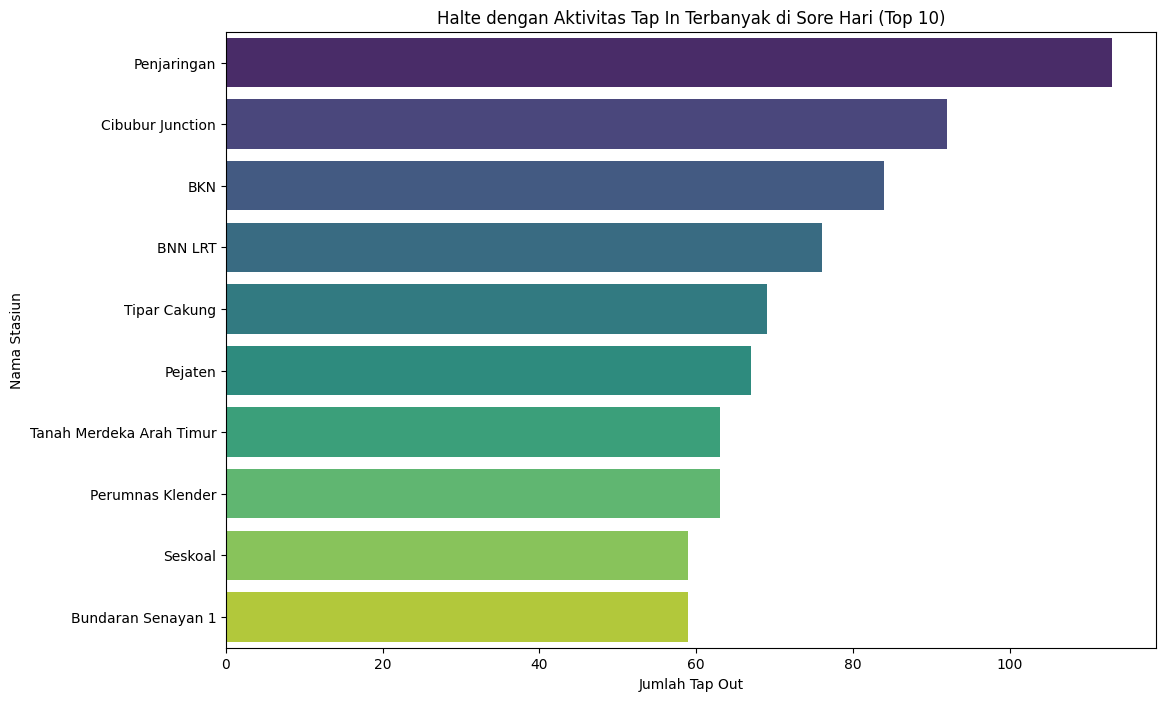

In [300]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_evening_tapin.values, y=top_evening_tapin.index, palette='viridis')
plt.title('Halte dengan Aktivitas Tap In Terbanyak di Sore Hari (Top 10)')
plt.xlabel('Jumlah Tap Out')
plt.ylabel('Nama Stasiun')
plt.show()


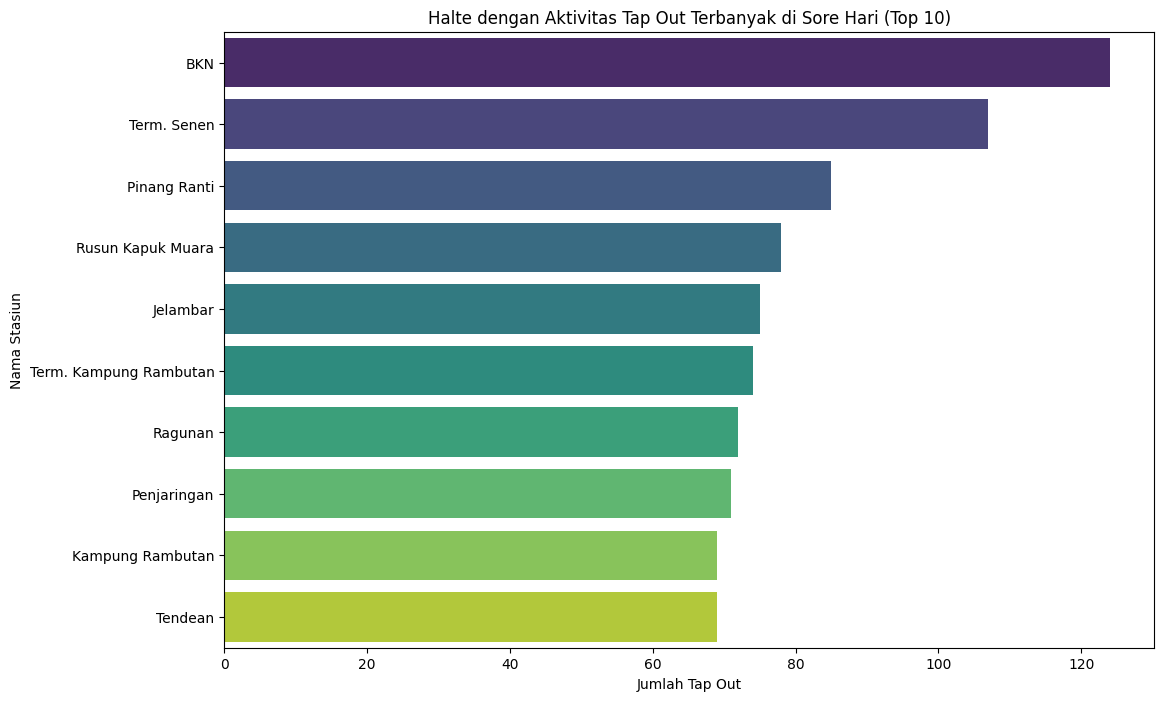

In [301]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_evening_tapout.values, y=top_evening_tapout.index, palette='viridis')
plt.title('Halte dengan Aktivitas Tap Out Terbanyak di Sore Hari (Top 10)')
plt.xlabel('Jumlah Tap Out')
plt.ylabel('Nama Stasiun')
plt.show()


Halte dengan aktivitas tap out terbanyak di sore hari (16:00 - 21:00):
- Penjaringan adalah halte dengan aktivitas tap out terbanyak di sore hari, mendekati 130 aktivitas. Hal ini menunjukkan bahwa banyak pengguna mengakhiri perjalanan mereka di halte ini di sore hari, mungkin setelah kembali dari tempat kerja atau kegiatan lain.
- BKN juga menonjol sebagai salah satu halte dengan jumlah aktivitas tap out yang tinggi di sore hari, serta memiliki aktivitas tap in yang signifikan. Halte ini mungkin berfungsi sebagai titik transfer penting (transit) atau terletak di area yang sibuk, di mana banyak orang masuk dan keluar.
- Sebagian besar halte di daftar ini menunjukkan aktivitas tap out yang lebih tinggi dibandingkan dengan tap in di sore hari. Ini mengindikasikan bahwa lebih banyak orang mengakhiri perjalanan mereka di halte-halte tersebut di sore hari.

### dari segi hari dengan tap in dan tap out tertinggi

In [302]:
# membuat value hari dari tapInTime
df_copy['tapIn_dayofweek'] = df_copy['tapInTime'].dt.day_name()
df_copy['tapOut_dayofweek'] = df_copy['tapOutTime'].dt.day_name()

In [303]:
# mengurutkan hari
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_order

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

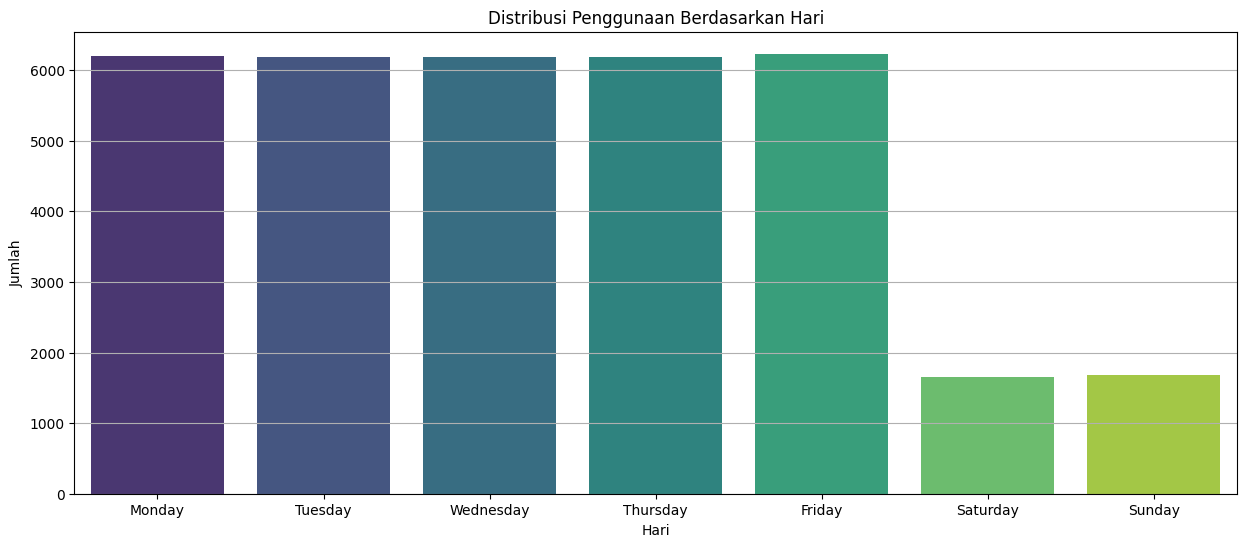

In [304]:
plt.figure(figsize=(15, 6))

sns.countplot(data=df_copy, x='tapIn_dayofweek', order=days_order, palette='viridis')
plt.title('Distribusi Penggunaan Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah')
plt.grid(axis='y')

plt.show()


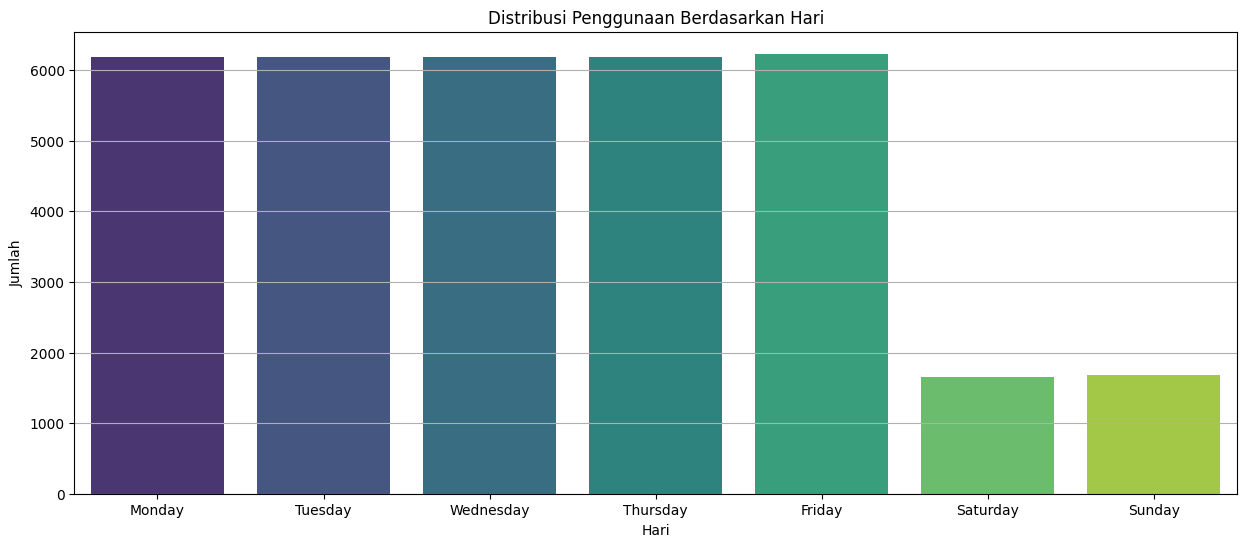

In [305]:
plt.figure(figsize=(15, 6))

sns.countplot(data=df_copy, x='tapOut_dayofweek', order=days_order, palette='viridis')
plt.title('Distribusi Penggunaan Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah')
plt.grid(axis='y')

plt.show()


In [306]:
# menggabungkan dataframe 'tapIn_hour' dan 'tapOut_hour' di kolom yang sama
df_combined_day = df_copy.melt(value_vars=['tapIn_dayofweek', 'tapOut_dayofweek'], 
                         var_name='Type', 
                         value_name='Day')
df_combined_day

Type        Day
0       tapIn_dayofweek     Monday
1       tapIn_dayofweek     Monday
2       tapIn_dayofweek     Monday
3       tapIn_dayofweek     Monday
4       tapIn_dayofweek     Monday
...                 ...        ...
68623  tapOut_dayofweek     Friday
68624  tapOut_dayofweek    Tuesday
68625  tapOut_dayofweek    Tuesday
68626  tapOut_dayofweek   Saturday
68627  tapOut_dayofweek  Wednesday

[68628 rows x 2 columns]

In [307]:
combined_day_counts = df_combined_day.groupby('Day').size().reset_index(name='Count')
combined_day_counts

Day  Count
0     Friday  12466
1     Monday  12387
2   Saturday   3308
3     Sunday   3356
4   Thursday  12378
5    Tuesday  12367
6  Wednesday  12366

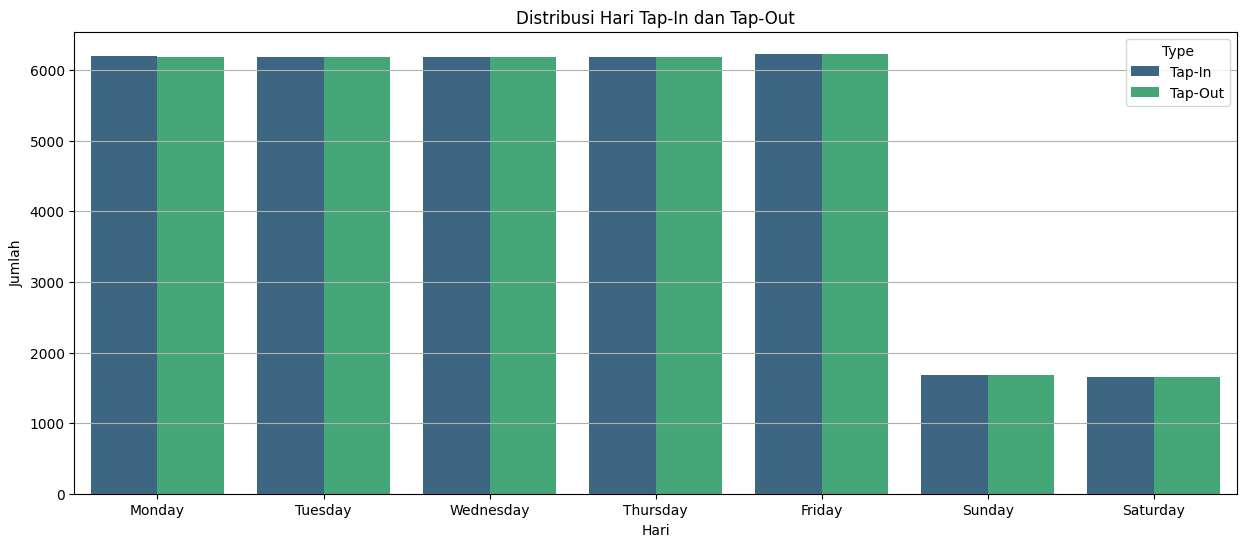

In [308]:
plt.figure(figsize=(15, 6))

sns.countplot(data=df_combined_day, x='Day', hue='Type', palette='viridis')
plt.title('Distribusi Hari Tap-In dan Tap-Out')
plt.xlabel('Hari')
plt.ylabel('Jumlah')
plt.grid(axis='y')
plt.legend(title='Type', labels=['Tap-In', 'Tap-Out'])

plt.show()

Dari visualisasi distribusi penggunaan berdasarkan hari:

- Penggunaan Transjakarta cenderung lebih tinggi pada hari kerja (Senin hingga Jumat) dibandingkan dengan akhir pekan (Sabtu dan Minggu).
- Jumat tampaknya adalah hari dengan volume penggunaan tertinggi, diikuti oleh Senin dan Kamis.
- Ada penurunan yang signifikan pada hari Sabtu dan Minggu, yang menunjukkan bahwa banyak pengguna Transjakarta mungkin menggunakan layanan ini untuk keperluan kerja atau sekolah.

Dari grafik-grafik pada bagian Waktu Sibuk Halte Transjakarta, kita bisa menjawab pertanyaan:

* Kapan waktu jam sibuk dari halte Transjakarta yang digunakan pengguna untuk masuk dan keluar?
    * ada dua puncak utama dalam jam penggunaan Transjakarta, yaitu di pagi hari sekitar jam 5-9 untuk halte tap in dan sekitar jam 6-10 untuk halte tap out. yang kedua di sore hari sekitar jam 16-20 untuk halte tap in dan sekitar jam 17-21 untuk halte tap out. Hal Ini menunjukkan bahwa jam-jam sibuk atau jam puncak, yang mungkin berkaitan dengan jam masuk dan pulang kerja. Ada penurunan tajam dalam penggunaan sekitar tengah hari (sekitar jam 10-15), yang menunjukkan periode sepi.
* Dari waktu jam sibuk yang didapat sebelumnya, halte Transjakarta apa saja yang aktivitas tap in dan tap outnya terbanyak di pagi hari?
    * Halte seperti Garuda Taman Mini dan Penjaringan sebagai titik awal dan akhir untuk banyak pengguna Transjakarta. Ini menunjukkan bahwa halte tersebut mungkin berada di area perumahan atau titik awal penting lainnya bagi banyak pengguna. Sebagian besar halte di daftar ini memiliki lebih banyak aktivitas tap in dibanding tap out di pagi hari, mengindikasikan bahwa mereka mungkin berfungsi sebagai titik awal perjalanan bagi banyak pengguna.
* Dari waktu jam sibuk yang didapat sebelumnya, halte Transjakarta apa saja yang aktivitas tap in dan tap outnya terbanyak di sore hari?
    * Di sore hari, ada perubahan pola, dengan halte seperti Penjaringan dan BKN menonjol sebagai titik keluar utama. Hal ini mungkin menunjukkan bahwa halte tersebut berfungsi sebagai titik akhir bagi banyak pengguna yang kembali dari tempat kerja atau kegiatan lainnya. Sebagian besar halte memiliki aktivitas tap out yang lebih tinggi dibanding tap in, mengindikasikan bahwa mereka mungkin berfungsi sebagai titik akhir perjalanan bagi banyak pengguna di sore hari.
* Kapan waktu hari sibuk dari halte Transjakarta yang digunakan pengguna untuk masuk dan keluar?
    * Penggunaan Transjakarta cenderung lebih tinggi pada hari kerja (Senin hingga Jumat) dibandingkan dengan akhir pekan (Sabtu dan Minggu). Jumat tampaknya adalah hari dengan volume penggunaan tertinggi, diikuti oleh Senin dan Kamis. Ada penurunan yang signifikan pada hari Sabtu dan Minggu, yang menunjukkan bahwa banyak pengguna Transjakarta mungkin menggunakan layanan ini untuk keperluan kerja atau sekolah.

## Analisis lanjutan

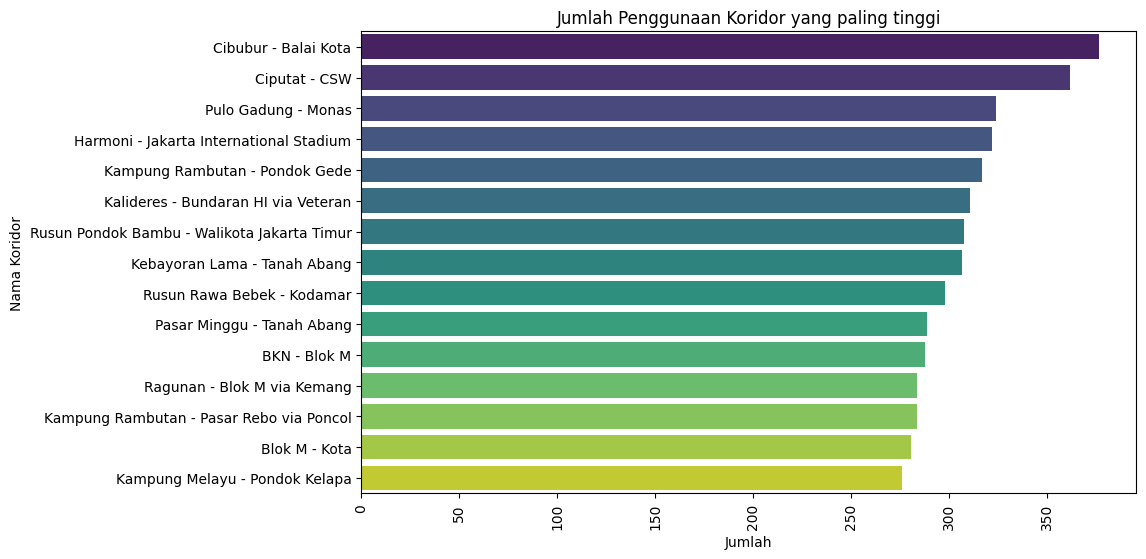

In [309]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_10_corridors, y='corridorName', order=df_top_10_corridors['corridorName'].value_counts().index,  palette='viridis')
plt.title('Jumlah Penggunaan Koridor yang paling tinggi')
plt.xlabel('Jumlah')
plt.ylabel('Nama Koridor')
plt.xticks(rotation=90)
plt.show()

Berdasarkan visualisasi diatas, koridor "Cibubur - Balai Kota" dan "Ciputat - CSW" terlihat adanya lonjakan pengguna yang cukup tinggi. kita perlu analisis lebih lanjut untuk dapat diketahui penyebab dari lonjakan tersebut.

### Koridor Cibubur - Balai Kota

In [310]:
cibubur_data_df = df_copy[df_copy['corridorName'] == 'Cibubur - Balai Kota']
cibubur_data_df.head(5)

payCardID payCardBank                payCardName payCardSex  \
5    2251412124634980         dki              Tirta Siregar          F   
134   345711968178505      emoney           Kawaya Oktaviani          M   
305  2251412124634980         dki              Tirta Siregar          F   
370  3549158005951908         dki  Mustofa Wijayanti, M.Farm          M   
434   345711968178505      emoney           Kawaya Oktaviani          M   

     payCardBirthDate corridorID          corridorName      direction  \
5                1993         1T  Cibubur - Balai Kota  Keberangkatan   
134              2009         1T  Cibubur - Balai Kota         Pulang   
305              1993         1T  Cibubur - Balai Kota         Pulang   
370              1981         1T  Cibubur - Balai Kota         Pulang   
434              2009         1T  Cibubur - Balai Kota  Keberangkatan   

    tapInStops    tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq  \
5      B00127P          Benhil 3      -6.216010      106.81632             3   
134    B00102P      Balai Kota 1      -6.180598      106.82847             0   
305    B00325P      Dukuh Atas 3      -6.205650      106.82250             7   
370    B05773P          Tosari 1      -6.199166      106.82334             6   
434    B00248P  Cibubur Junction      -6.368735      106.89366             0   

              tapInTime tapOutStops  tapOutStopsName  tapOutStopsLat  \
5   2023-04-03 05:08:01     B00694P      Grand Sahid       -6.210975   
134 2023-04-03 05:28:11     B00360P  Flyover Karet 2       -6.214808   
305 2023-04-03 16:15:42     B02873P    Plaza Sentral       -6.216247   
370 2023-04-03 17:54:25     B00325P     Dukuh Atas 3       -6.205650   
434 2023-04-03 17:49:34     B03314P     MH Thamrin 2       -6.188238   

     tapOutStopsLon  stopEndSeq          tapOutTime  payAmount  age age_group  \
5         106.82059         6.0 2023-04-03 05:52:25    20000.0   30     26-30   
134       106.81847        11.0 2023-04-03 06:09:57    20000.0   14     11-15   
305       106.81676        12.0 2023-04-03 17:08:45    20000.0   30     26-30   
370       106.82250         7.0 2023-04-03 19:39:59    20000.0   42     41-45   
434       106.82277        12.0 2023-04-03 18:54:24    20000.0   14     11-15   

     travel_time  tapIn_hour  tapOut_hour tapIn_dayofweek tapOut_dayofweek  
5      44.400000           5            5          Monday           Monday  
134    41.766667           5            6          Monday           Monday  
305    53.050000          16           17          Monday           Monday  
370   105.566667          17           19          Monday           Monday  
434    64.833333          17           18          Monday           Monday

In [311]:
age_group_distribution = cibubur_data_df['age_group'].value_counts().sort_index()
age_group_distribution

age_group
11-15    109
16-20     39
21-25      1
26-30     73
31-35     76
36-40      1
41-45     77
46-50      1
51-55      0
56-60      0
61-65      0
66-70      0
71-75      0
Name: count, dtype: int64

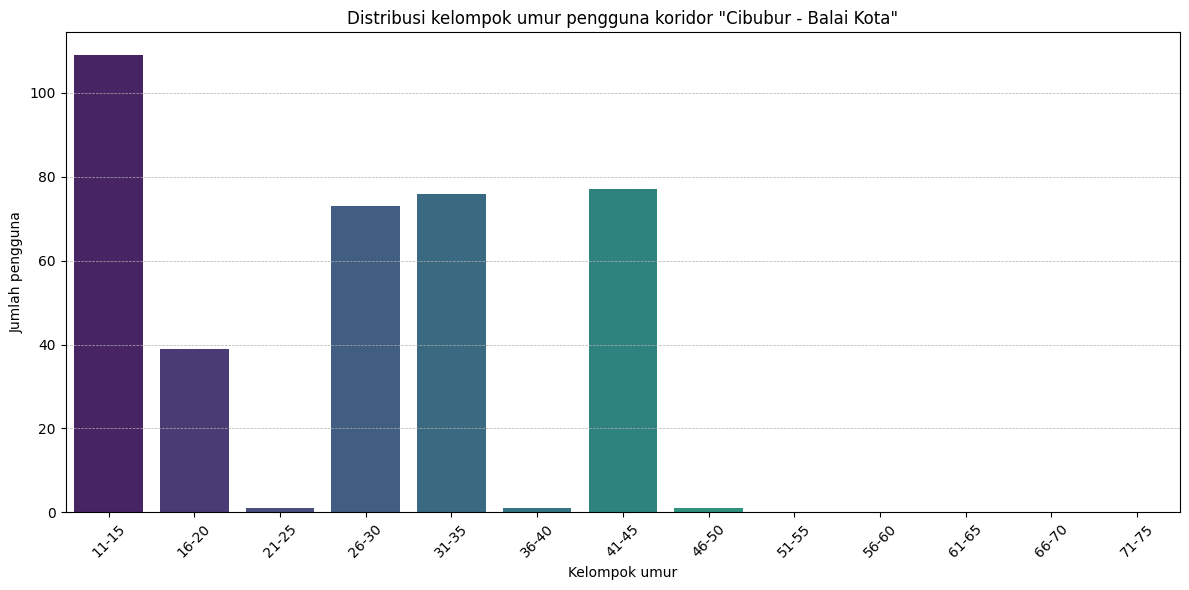

In [312]:
plt.figure(figsize=(12, 6))
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette='viridis')
plt.title('Distribusi kelompok umur pengguna koridor "Cibubur - Balai Kota"')
plt.xlabel('Kelompok umur')
plt.ylabel('Jumlah pengguna')
plt.xticks(rotation=45)
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Dari distribusi kelompok usia untuk koridor "Cibubur - Balai Kota", kita dapat mengamati:

1. Kelompok Usia 11-15: Ini adalah kelompok usia dengan pengguna terbanyak di koridor ini, yang mungkin menunjukkan bahwa koridor ini populer di kalangan siswa sekolah.
1. Kelompok Usia 31-35 & 41-45: Kedua kelompok usia ini hampir memiliki jumlah pengguna yang sama dan merupakan kelompok usia kedua dan ketiga, hal ini menunjukan bahwa kelompok umur ini mungkin adalah kaum profesional.
1. Kelompok Usia 26-30: Kelompok usia ini merupakan yang keempat terbesar dalam hal penggunaan, kelompok umur ini mungkin adalah profesional muda.
1. Dari data ini, kita dapat menyimpulkan bahwa koridor "Cibubur - Balai Kota" paling banyak digunakan oleh individu yang berusia antara 11 hingga 15 tahun yang mungkin merupakan siswa sekolah.
1. Tapi berdasarkan akumulasi kelompok penggunanya, sebanyak 158 orang mungkin adalah kaum profesional dan 109 orang mungkin adalah siswa sekolah.

In [313]:
# Distribution of passengers based on departure time
passenger_by_hour_tapin = cibubur_data_df['tapIn_hour'].value_counts().sort_index()
passenger_by_hour_tapin

tapIn_hour
5     26
6     62
7     28
8     33
9     38
10     1
11     1
12     1
14     1
16    24
17    63
18    21
19    32
20    22
21    24
Name: count, dtype: int64

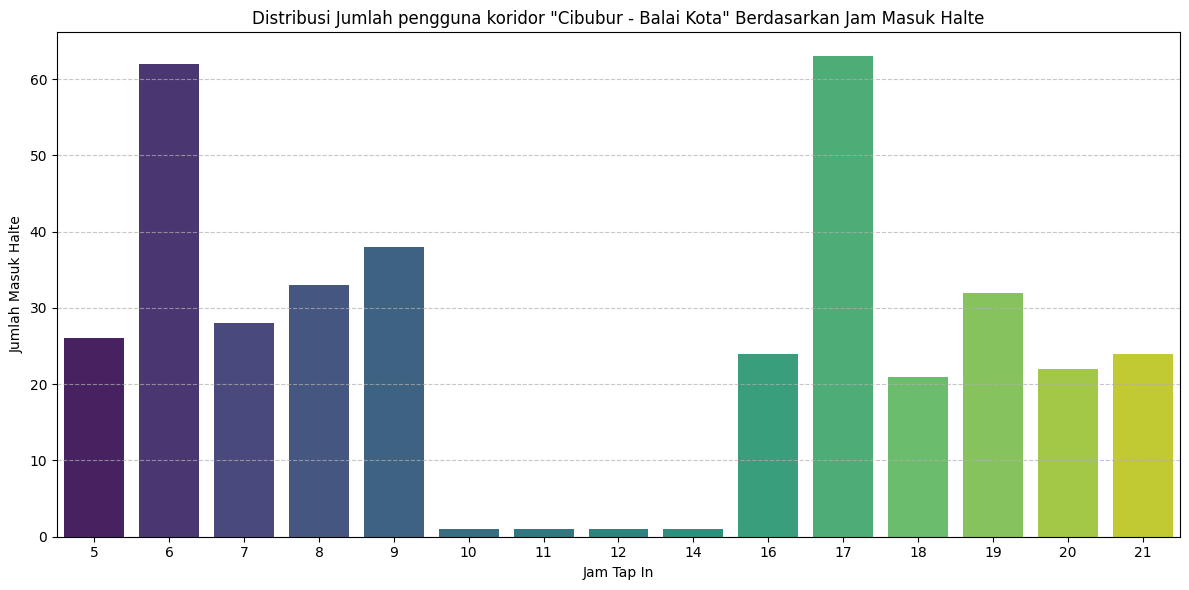

In [347]:
plt.figure(figsize=(12, 6))
sns.barplot(x=passenger_by_hour_tapin.index, y=passenger_by_hour_tapin.values, palette='viridis')
plt.title('Distribusi Jumlah pengguna koridor "Cibubur - Balai Kota" Berdasarkan Jam Tap In')
plt.xlabel('Jam Tap In')
plt.ylabel('Jumlah Masuk Halte')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dari grafik penggunaan per jam masuk halte untuk koridor "Cibubur - Balai Kota", kita dapat mengamati:

1. Pagi Hari (sekitar jam 5-8): Terjadi lonjakan penggunaan signifikan dengan puncak lonjakan di jam 6. Ini mencerminkan jam sibuk pagi hari ketika orang berangkat ke tempat kerja dan sekolah.
1. Siang Hari (sekitar jam 9-14): Ada penurunan penggunaan, dengan kepadatan relatif rendah di tengah hari.
1. Sore Hari (sekitar jam 15-19): Terjadi lonjakan kedua dengan puncak lonjakan di jam 17, yang mencerminkan jam pulang kerja dan sekolah.

In [315]:
# Distribution of passengers based on departure time
passenger_by_hour_tapout = cibubur_data_df['tapOut_hour'].value_counts().sort_index()
passenger_by_hour_tapout

tapOut_hour
5      7
6     34
7     38
8     32
9     35
10    30
11    11
12     1
13     2
16     1
17    17
18    44
19    41
20    25
21    25
22    27
23     7
Name: count, dtype: int64

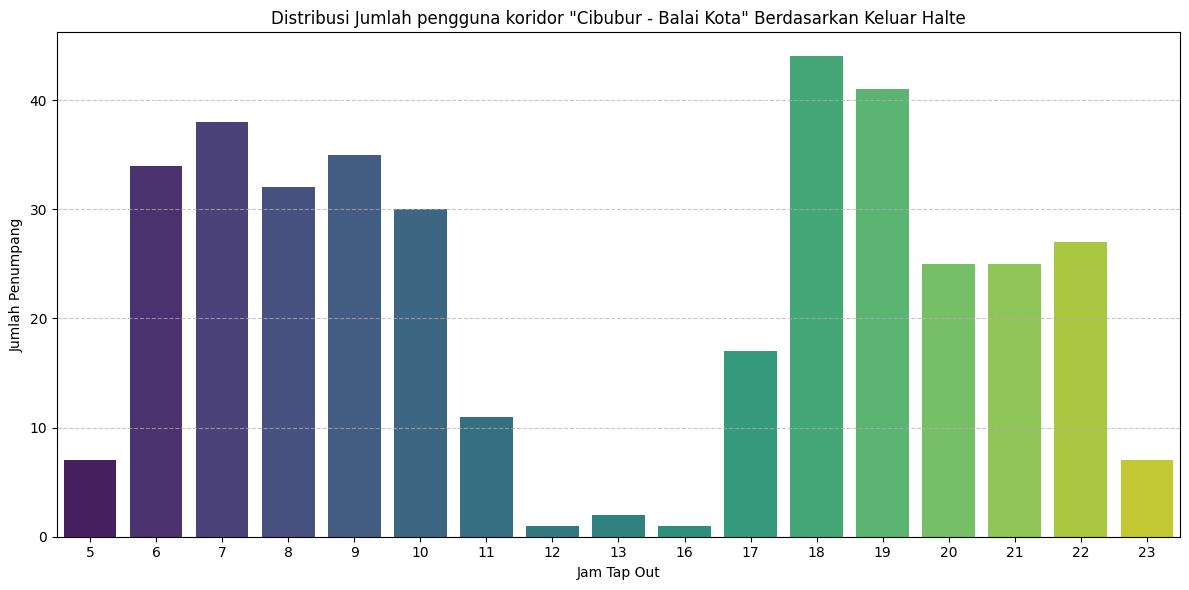

In [348]:
plt.figure(figsize=(12, 6))
sns.barplot(x=passenger_by_hour_tapout.index, y=passenger_by_hour_tapout.values, palette='viridis')
plt.title('Distribusi Jumlah pengguna koridor "Cibubur - Balai Kota" Berdasarkan Tap Out')
plt.xlabel('Jam Tap Out')
plt.ylabel('Jumlah Penumpang')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dari grafik penggunaan per jam keluar halte untuk koridor "Cibubur - Balai Kota", kita dapat mengamati:

1. Pagi Hari (sekitar jam 6-10): Terjadi lonjakan penggunaan signifikan dengan puncak lonjakan di jam 7. Ini mencerminkan jam sibuk pagi hari ketika orang berangkat ke tempat kerja dan sekolah.
1. Siang Hari (sekitar jam 12-16): Ada penurunan penggunaan, dengan kepadatan relatif rendah di tengah hari.
1. Sore Hari (sekitar jam 17-22): Terjadi lonjakan kedua dengan puncak lonjakan di jam 18, yang mencerminkan jam pulang kerja.

In [317]:
# Distribution of passengers based on day of the week
order_of_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_by_day = cibubur_data_df['tapIn_dayofweek'].value_counts().reindex(order_of_days)
passenger_by_day

tapIn_dayofweek
Monday       74
Tuesday      76
Wednesday    71
Thursday     74
Friday       74
Saturday      3
Sunday        5
Name: count, dtype: int64

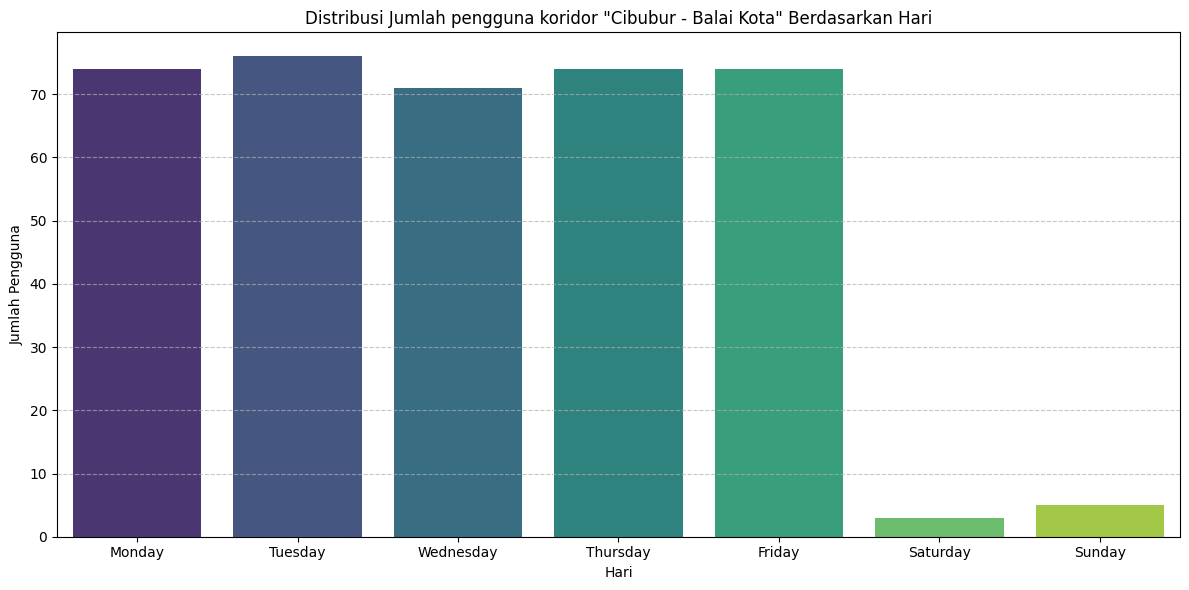

In [318]:
plt.figure(figsize=(12, 6))
sns.barplot(x=passenger_by_day.index, y=passenger_by_day.values, palette='viridis')
plt.title('Distribusi Jumlah pengguna koridor "Cibubur - Balai Kota" Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dari grafik penggunaan harian untuk koridor "Cibubur - Balai Kota", kita dapat mengamati:

1. Hari Kerja (Senin - Jumat): Penggunaan koridor cenderung tinggi selama hari kerja, dengan Selasa menjadi hari paling sibuk.
1. Akhir Pekan (Sabtu dan Minggu): Terjadi penurunan penggunaan koridor pada akhir pekan, terutama pada hari Minggu.

Pola ini menunjukkan bahwa koridor "Cibubur - Balai Kota" utamanya digunakan untuk perjalanan sehari-hari seperti ke tempat kerja atau sekolah, dengan kebutuhan yang berkurang selama akhir pekan.

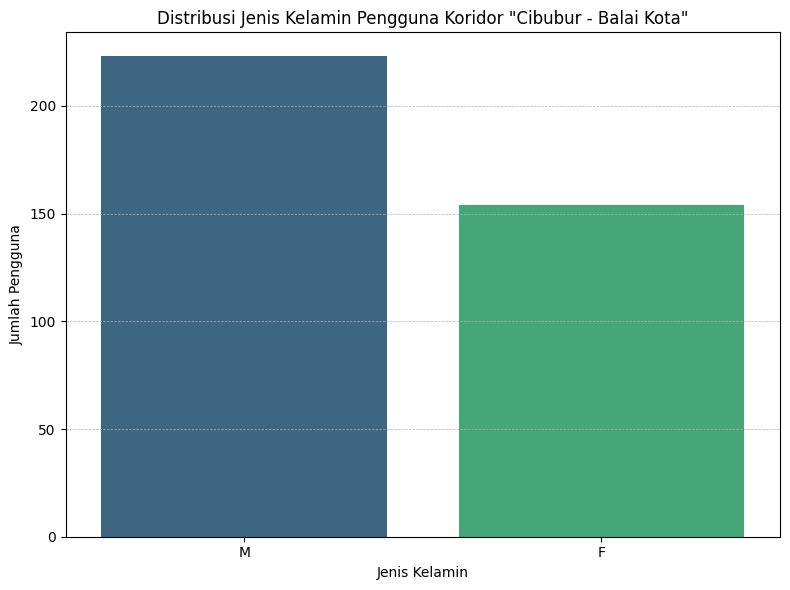

In [319]:
# Analyzing gender distribution for 'Cibubur - Balai Kota' corridor
gender_distribution_cibubur = cibubur_data_df['payCardSex'].value_counts()

# Plotting gender distribution for 'Cibubur - Balai Kota' corridor
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_distribution_cibubur.index, y=gender_distribution_cibubur.values, palette='viridis')
plt.title('Distribusi Jenis Kelamin Pengguna Koridor "Cibubur - Balai Kota"')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=0)
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


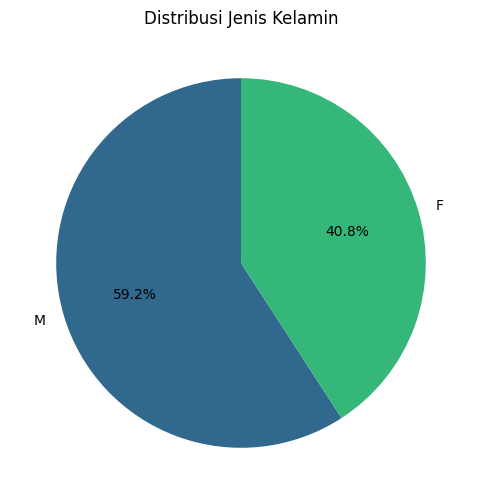

In [344]:
plt.figure(figsize=(8, 6))
gender_distribution_cibubur.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(gender_counts)))
plt.title('Distribusi Jenis Kelamin')
plt.ylabel('')
plt.show()

Dari grafik distribusi jenis kelamin untuk koridor "Cibubur - Balai Kota", kita dapat mengamati:

1. Laki-laki: Ada lebih banyak pengguna laki-laki dengan persentase 59 % yang menggunakan koridor ini dibandingkan dengan perempuan dengan perbandingan yang cukup signifikan.
1. Perempuan: Meskipun jumlahnya lebih sedikit dibandingkan dengan laki-laki, masih ada jumlah pengguna perempuan yang signifikan dengan persentase  41 %.

In [320]:
# Analyzing direction distribution for 'Cibubur - Balai Kota' corridor using the updated dataset
direction_distribution = cibubur_data_df['direction'].value_counts()
direction_distribution

direction
Pulang           190
Keberangkatan    187
Name: count, dtype: int64

<Figure size 800x600 with 0 Axes>

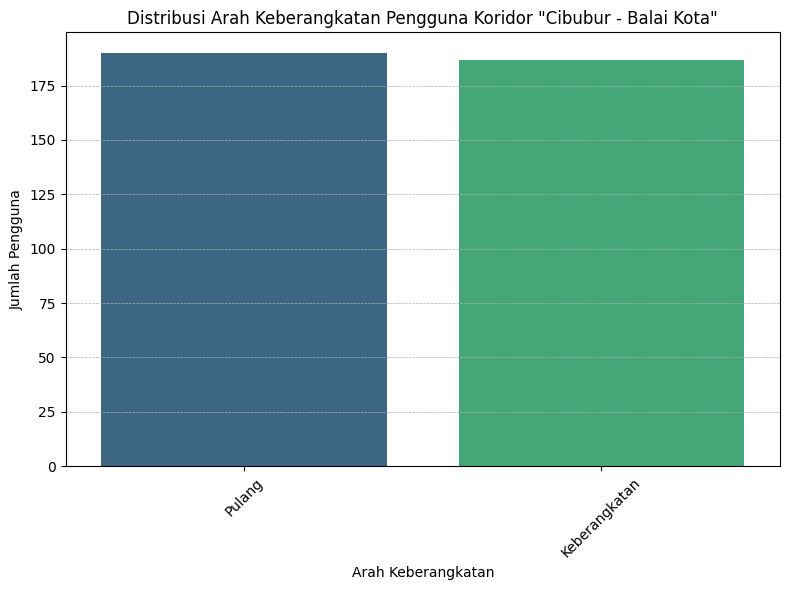

In [321]:
plt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6))
sns.barplot(x=direction_distribution.index, y=direction_distribution.values, palette='viridis')
plt.title('Distribusi Arah Keberangkatan Pengguna Koridor "Cibubur - Balai Kota"')
plt.xlabel('Arah Keberangkatan')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


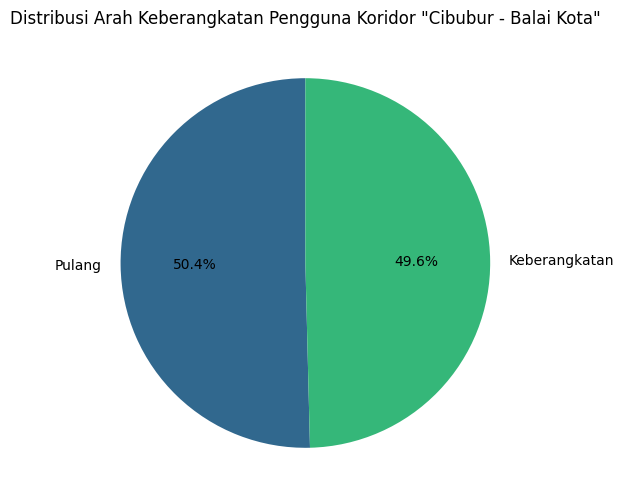

In [349]:
plt.figure(figsize=(8, 6))
direction_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(gender_counts)))
plt.title('Distribusi Arah Keberangkatan Pengguna Koridor "Cibubur - Balai Kota"')
plt.ylabel('')
plt.show()

Dari grafik distribusi arah untuk koridor "Cibubur - Balai Kota", kita dapat mengamati:
tidak ada perbedaan yang cukup signifikan antara distribusi arah perjalanan pada koridor "Cibubur - Balai Kota". Ada perbedaan pengguna 3 orang yang berangkat dari Cibubur ke Balai Kota daripada yang kembali dari Balai Kota ke Cibubur.

In [322]:
# Halte dengan aktivitas terbanyak pada pagi hari (5:00 - 10:00)
cibubur_morning_data_tapin = cibubur_data_df[(cibubur_data_df['tapInTime'].dt.hour >= 5) & (cibubur_data_df['tapInTime'].dt.hour <= 10)]


In [323]:
# Halte dengan aktivitas terbanyak pada pagi hari (5:00 - 10:00)
cibubur_morning_data_tapout = cibubur_data_df[(cibubur_data_df['tapOutTime'].dt.hour >= 5) & (cibubur_data_df['tapOutTime'].dt.hour <= 10)]


In [324]:
# Analyzing the most popular tap in and tap out stops
Top_tap_in_stops_morning = cibubur_morning_data_tapin['tapInStopsName'].value_counts().head(10)
Top_tap_out_stops_morning = cibubur_morning_data_tapout['tapOutStopsName'].value_counts().head(10)

Top_tap_in_stops_morning.head(3), Top_tap_out_stops_morning.head(3)

(tapInStopsName
 Benhil 3          39
 Balai Kota 1      38
 St. Sudirman 2    19
 Name: count, dtype: int64,
 tapOutStopsName
 Grand Sahid        20
 Wisma Nusantara    20
 Menara Thamrin     19
 Name: count, dtype: int64)

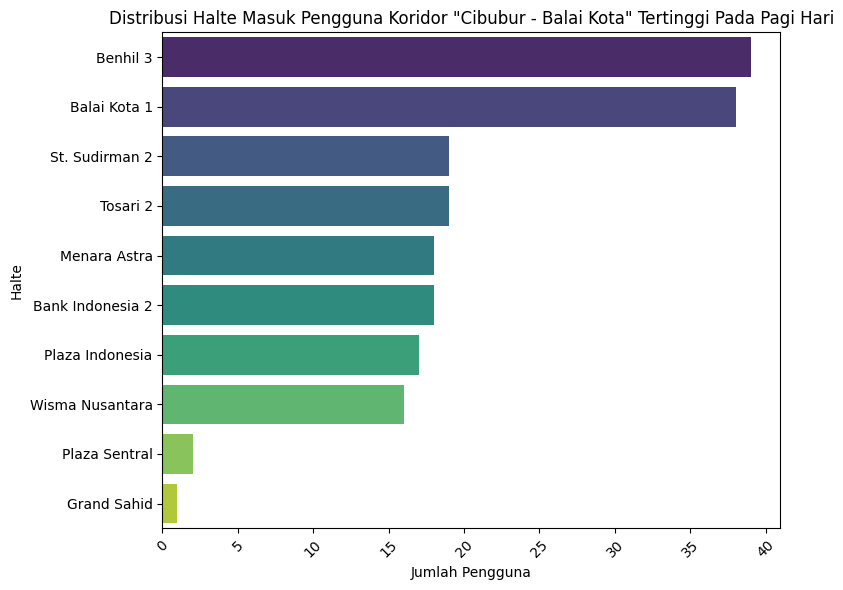

In [325]:
plt.figure(figsize=(8, 6))
sns.barplot(x=Top_tap_in_stops_morning.values, y=Top_tap_in_stops_morning.index, palette='viridis')
plt.title('Distribusi Halte Masuk Pengguna Koridor "Cibubur - Balai Kota" Tertinggi Pada Pagi Hari')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Halte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Dari grafik Halte Masuk Pengguna Koridor "Cibubur - Balai Kota" pada Pagi Hari (5-9), kita dapat mengamati:

1. Halte Benhil 3 mempunyai lonjakan pengguna yang tap in sangat tinggi pada pagi hari, dengan 39 pengguna.
1. Halte Balai Kota 1 mempunyai lonjakan pengguna yang tap in sangat tinggi pada pagi hari, dengan 38 pengguna.

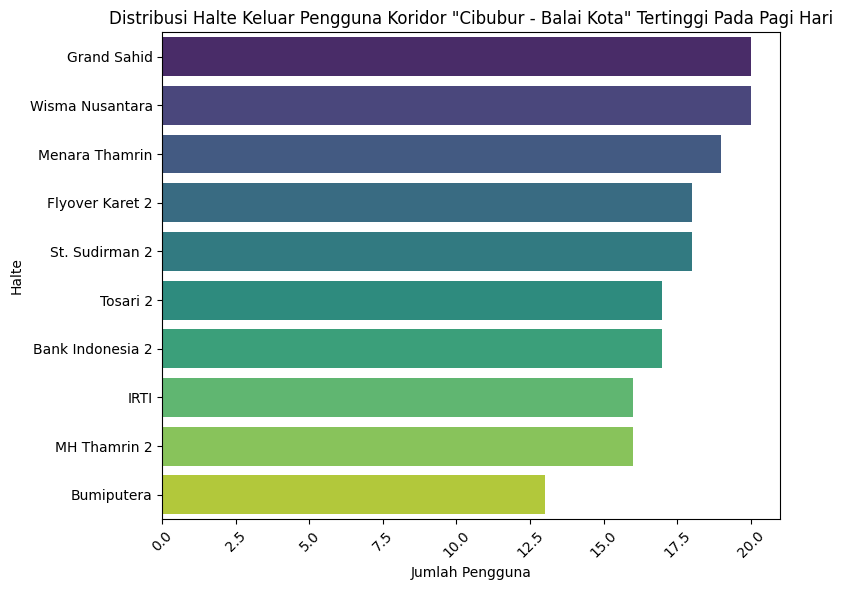

In [326]:
plt.figure(figsize=(8, 6))
sns.barplot(x=Top_tap_out_stops_morning.values, y=Top_tap_out_stops_morning.index, palette='viridis')
plt.title('Distribusi Halte Keluar Pengguna Koridor "Cibubur - Balai Kota" Tertinggi Pada Pagi Hari')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Halte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dari grafik Halte Keluar Pengguna Koridor "Cibubur - Balai Kota" pada Pagi Hari (5-9), kita dapat mengamati:

1. Grand Sahid mempunyai lonjakan pengguna yang tap out cukup tinggi pada pagi hari, dengan 20 pengguna.
1. Wisma Nusantara mempunyai lonjakan pengguna yang tap out cukup tinggi pada pagi hari, dengan 20 pengguna.
1. Menara Thamrin mempunyai lonjakan pengguna yang tap out cukup tinggi pada pagi hari, dengan 19 pengguna.

In [327]:
# Halte dengan aktivitas terbanyak pada sore hari (16:00 - 21:00)
cibubur_evening_data_tapout = cibubur_data_df[(cibubur_data_df['tapInTime'].dt.hour >= 16) & (cibubur_data_df['tapInTime'].dt.hour <= 21)]


In [328]:
# Halte dengan aktivitas terbanyak pada sore hari (16:00 - 21:00)
cibubur_evening_data_tapout = cibubur_data_df[(cibubur_data_df['tapOutTime'].dt.hour >= 16) & (cibubur_data_df['tapOutTime'].dt.hour <= 21)]


In [329]:
# Analyzing the most popular tap in and tap out stops
Top_tap_in_stops_evening = cibubur_evening_data_tapout['tapInStopsName'].value_counts().head(10)
Top_tap_out_stops_evening = cibubur_evening_data_tapout['tapOutStopsName'].value_counts().head(10)

Top_tap_in_stops_evening.head(3), Top_tap_out_stops_evening.head(3)

(tapInStopsName
 Cibubur Junction    34
 Tosari 1            33
 Bank Indonesia 1    26
 Name: count, dtype: int64,
 tapOutStopsName
 MH Thamrin 2     34
 Plaza Sentral    19
 Dukuh Atas 3     19
 Name: count, dtype: int64)

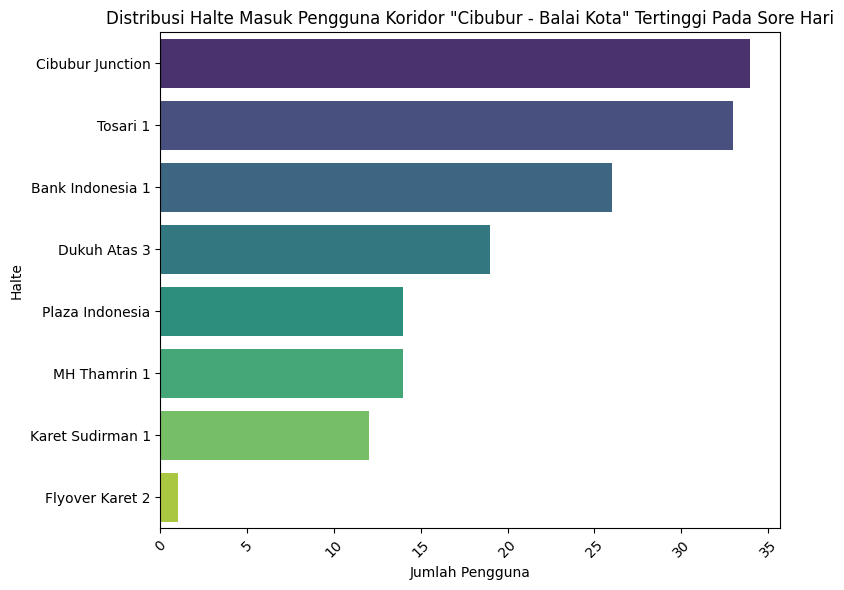

In [330]:
plt.figure(figsize=(8, 6))
sns.barplot(x=Top_tap_in_stops_evening.values, y=Top_tap_in_stops_evening.index, palette='viridis')
plt.title('Distribusi Halte Masuk Pengguna Koridor "Cibubur - Balai Kota" Tertinggi Pada Sore Hari')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Halte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dari grafik Halte Masuk Pengguna Koridor "Cibubur - Balai Kota" pada Sore Hari (16-20), kita dapat mengamati:

1. Tosari 1 mempunyai lonjakan pengguna yang tap in cukup tinggi pada Sore Hari, dengan 38 pengguna.
1. Bank Indonesia 1 mempunyai lonjakan pengguna yang tap in cukup tinggi pada Sore Hari, dengan 38 pengguna.
1. Cibubur Junction mempunyai lonjakan pengguna yang tap in cukup tinggi pada Sore Hari, dengan 36 pengguna.

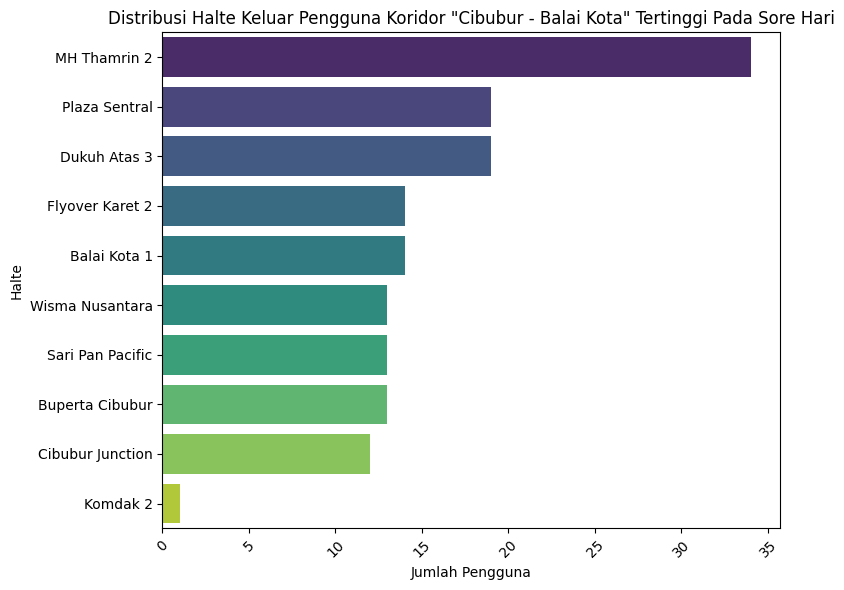

In [331]:
plt.figure(figsize=(8, 6))
sns.barplot(x=Top_tap_out_stops_evening.values, y=Top_tap_out_stops_evening.index, palette='viridis')
plt.title('Distribusi Halte Keluar Pengguna Koridor "Cibubur - Balai Kota" Tertinggi Pada Sore Hari')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Halte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dari grafik Halte Keluar Pengguna Koridor "Cibubur - Balai Kota" pada Sore Hari (16-20), kita dapat mengamati:

1. MH Thamrin 2 mempunyai lonjakan pengguna yang tap out cukup tinggi pada Sore Hari, dengan 36 pengguna.
1. Plaza Sentral mempunyai lonjakan pengguna yang tap in cukup tinggi pada Sore Hari, dengan 19 pengguna.
1. Dukuh Atas 3 mempunyai lonjakan pengguna yang tap in cukup tinggi pada Sore Hari, dengan 19 pengguna.

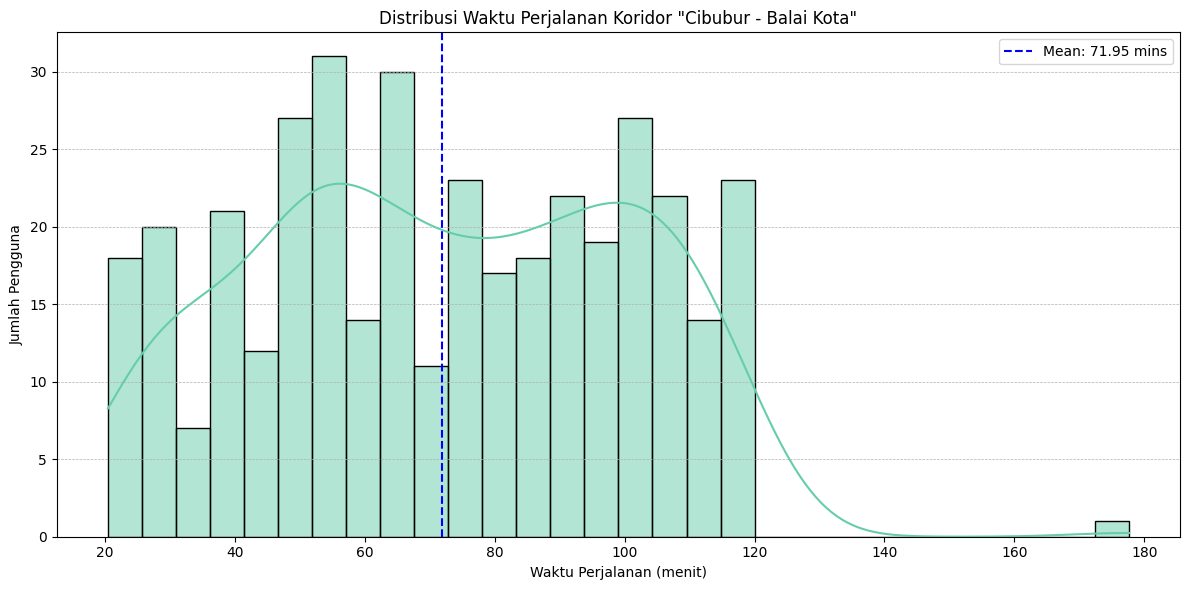

In [332]:
# Plotting the distribution of travel time for 'Cibubur - Balai Kota' corridor again
plt.figure(figsize=(12, 6))
sns.histplot(cibubur_data_df['travel_time'], bins=30, color='mediumaquamarine', kde=True)
plt.title('Distribusi Waktu Perjalanan Koridor "Cibubur - Balai Kota"')
plt.xlabel('Waktu Perjalanan (menit)')
plt.ylabel('Jumlah Pengguna')

# Calculate the mode and mean of travel time
median_travel_time = cibubur_data_df['travel_time'].median()

plt.axvline(median_travel_time, color='blue', linestyle='--', label=f"Mean: {median_travel_time:.2f} mins")
plt.legend()
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Dari histogram waktu perjalanan untuk koridor "Cibubur - Balai Kota", kita dapat mengamati:

1. Distribusi Waktu Perjalanan: Mayoritas waktu perjalanan berkisar antara 10 hingga 120 menit, dengan beberapa perjalanan yang memerlukan waktu lebih lama.
1. Median Waktu Perjalanan: Seperti yang diindikasikan dengan garis biru putus-putus, median waktu perjalanan adalah sekitar 72 menit.
1. Puncak Distribusi: Ada puncak yang jelas di sekitar 20-30 menit dan 70-90 menit, menunjukkan ada dua kelompok utama waktu perjalanan di koridor ini.

In [352]:
# Calculating the average travel time for each segment of the corridor
segment_travel_times = cibubur_data_df.groupby(['tapInStopsName', 'tapOutStopsName']).agg({
    'travel_time': 'mean',
    'stopStartSeq': 'first',
    'stopEndSeq': 'first'
}).reset_index()
segment_travel_times.value_counts()

tapInStopsName    tapOutStopsName   travel_time  stopStartSeq  stopEndSeq
Balai Kota 1      Flyover Karet 2   41.585185    0             11.0          1
                  Wisma Nusantara   61.225000    0             5.0           1
Tosari 2          Bank Indonesia 2  74.089474    10            14.0          1
Tosari 1          Flyover Karet 2   77.704386    6             11.0          1
                  Dukuh Atas 3      90.111404    6             7.0           1
St. Sudirman 2    Tosari 2          72.751754    9             10.0          1
Plaza Sentral     Buperta Cibubur   129.966667   12            14.0          1
Plaza Indonesia   MH Thamrin 2      64.668627    11            12.0          1
                  Bank Indonesia 2  24.650000    11            14.0          1
                  Balai Kota 1      86.882353    11            16.0          1
Menara Astra      Menara Thamrin    38.704630    7             13.0          1
MH Thamrin 2      Balai Kota 1      29.633333    12      

In [353]:
# Sorting the segments by average travel time in descending order
segment_travel_times = segment_travel_times.sort_values(by='travel_time', ascending=False)
segment_travel_times.head(10)

tapInStopsName   tapOutStopsName  travel_time  stopStartSeq  stopEndSeq
20     Plaza Sentral   Buperta Cibubur   129.966667            12        14.0
9    Flyover Karet 2          Komdak 2   106.766667            11        13.0
10       Grand Sahid    Menara Thamrin   102.366667             6        13.0
22          Tosari 1      Dukuh Atas 3    90.111404             6         7.0
2   Bank Indonesia 1  Sari Pan Pacific    88.640351             1         3.0
13      MH Thamrin 1   Buperta Cibubur    87.705263             4        14.0
17   Plaza Indonesia      Balai Kota 1    86.882353            11        16.0
14      MH Thamrin 1       Chase Plaza    83.833333             4         9.0
8       Dukuh Atas 3     Plaza Sentral    81.091228             7        12.0
12  Karet Sudirman 1  Cibubur Junction    80.783333            10        15.0

In [354]:
# Displaying the top 5 segments with the longest average travel times
top_segments = segment_travel_times.head(10)
top_segments

tapInStopsName   tapOutStopsName  travel_time  stopStartSeq  stopEndSeq
20     Plaza Sentral   Buperta Cibubur   129.966667            12        14.0
9    Flyover Karet 2          Komdak 2   106.766667            11        13.0
10       Grand Sahid    Menara Thamrin   102.366667             6        13.0
22          Tosari 1      Dukuh Atas 3    90.111404             6         7.0
2   Bank Indonesia 1  Sari Pan Pacific    88.640351             1         3.0
13      MH Thamrin 1   Buperta Cibubur    87.705263             4        14.0
17   Plaza Indonesia      Balai Kota 1    86.882353            11        16.0
14      MH Thamrin 1       Chase Plaza    83.833333             4         9.0
8       Dukuh Atas 3     Plaza Sentral    81.091228             7        12.0
12  Karet Sudirman 1  Cibubur Junction    80.783333            10        15.0

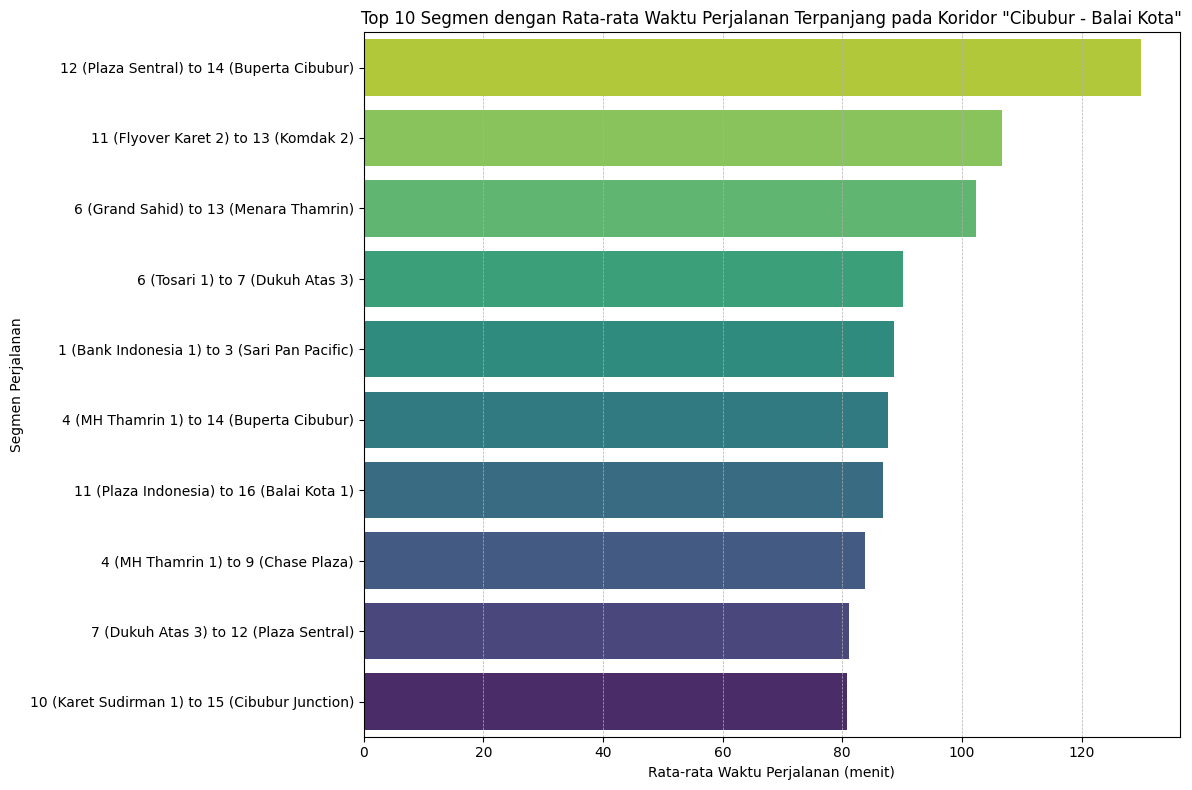

In [339]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_segments, 
            y=top_segments.apply(lambda row: f"{int(row['stopStartSeq'])} ({row['tapInStopsName']}) to {int(row['stopEndSeq'])} ({row['tapOutStopsName']})", axis=1), 
            x='travel_time', 
            palette='viridis_r')
plt.title('Top 10 Segmen dengan Rata-rata Waktu Perjalanan Terpanjang pada Koridor "Cibubur - Balai Kota"')
plt.xlabel('Rata-rata Waktu Perjalanan (menit)')
plt.ylabel('Segmen Perjalanan')
plt.grid(axis='x', which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [340]:
# Calculating the average travel time for each segment of the corridor
cek_waktu = cibubur_data_df[['tapInStopsName', 'tapOutStopsName', 'tapInTime', 'tapOutTime', 'travel_time']]
cek_waktu.sort_values(by='travel_time', ascending=False).head(10)


tapInStopsName   tapOutStopsName           tapInTime  \
37897     Plaza Sentral   Buperta Cibubur 2023-04-04 10:29:47   
18721   Plaza Indonesia      Balai Kota 1 2023-04-11 19:37:39   
15732      MH Thamrin 1   Buperta Cibubur 2023-04-06 18:49:57   
31121  Bank Indonesia 2              IRTI 2023-04-28 06:17:24   
26721   Plaza Indonesia      Balai Kota 1 2023-04-21 20:58:25   
2170           Tosari 1      Dukuh Atas 3 2023-04-06 16:29:09   
23002    St. Sudirman 2          Tosari 2 2023-04-18 08:54:18   
24219   Wisma Nusantara        Bumiputera 2023-04-19 09:42:49   
12448          Benhil 3    St. Sudirman 2 2023-04-03 06:19:20   
14948  Bank Indonesia 1  Sari Pan Pacific 2023-04-05 17:21:08   

               tapOutTime  travel_time  
37897 2023-04-04 13:27:25   177.633333  
18721 2023-04-11 21:37:26   119.783333  
15732 2023-04-06 20:49:26   119.483333  
31121 2023-04-28 08:16:52   119.466667  
26721 2023-04-21 22:57:32   119.116667  
2170  2023-04-06 18:27:36   118.450000  
23002 2023-04-18 10:52:27   118.150000  
24219 2023-04-19 11:40:49   118.000000  
12448 2023-04-03 08:17:08   117.800000  
14948 2023-04-05 19:18:48   117.666667

In [341]:
# Create a base map centered around Jakarta
m = folium.Map(location=[-6.2088, 106.8456], zoom_start=13)

# Add markers for tap in stops
for idx, row in cibubur_data_df.iterrows():
    folium.Marker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        popup=f"Tap In: {row['tapInStopsName']}",
        icon=folium.Icon(color='blue', icon='arrow-up')
    ).add_to(m)

    folium.Marker(
        location=[row['tapOutStopsLat'], row['tapOutStopsLon']],
        popup=f"Tap Out: {row['tapOutStopsName']}",
        icon=folium.Icon(color='red', icon='arrow-down')
    ).add_to(m)

m

Dari visualisasi Top 10 Segmen dengan Rata-rata Waktu Perjalanan Terpanjang pada Koridor "Cibubur - Balai Kota dan map dari folium diatas, kita dapat mengidentifikasi 5 segmen perjalanan dengan waktu perjalanan rata-rata tertinggi di koridor "Cibubur - Balai Kota". Segmen-segmen ini adalah:

1. Pemberhentian 12 (Plaza Sentral) ke Pemberhentian 14 (Buperta Cibubur): Ini adalah segmen dengan waktu perjalanan rata-rata tertinggi, mencerminkan pengguna yang bepergian dari pusat kota hingga akhir koridor di Cibubur. segemtasi ini dapat dimaklumi karena jarak Cibubur ke pusat kota yang cukup jauh.
1. Pemberhentian 11 (Flyover Karet 2) ke Pemberhentian 12 (Komdak 2): Ini adalah segmen dengan waktu perjalanan rata-rata tertinggi kedua, Pengguna yang bepergian dari awal koridor hingga satu pemberhentian sebelum akhir koridor.
1. Pemberhentian 6 (Grand Sahid) ke Pemberhentian 13 (Menara Thamrin): Pengguna yang bepergian dari awal koridor hingga beberapa pemberhentian sebelum akhir koridor.

Dari analisis ini, kita dapat menyimpulkan bahwa rata-rata segmen perjalanan di pusat kota (selain cibubur) ada permasalahan yang serius. berdasarkan Google Maps, jarak antar halte yang ada di pusat kota pada koridor ini adalah dekat sedangkan rata-rata waktu perjalanannya cukup tinggi. Ini menunjukkan pentingnya memastikan kelancaran layanan sepanjang rute untuk meningkatkan kepuasan pengguna Transjakarta.

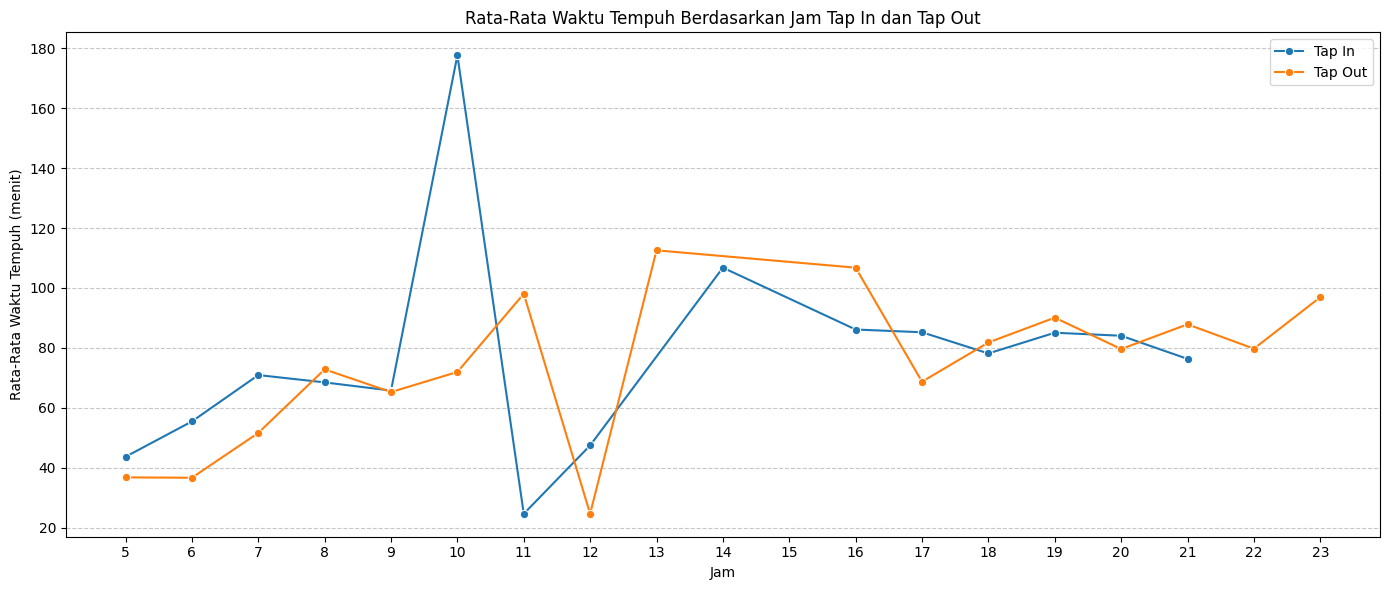

In [342]:
# Grouping by tapIn_hour and tapOut_hour to get mean travel time
mean_travel_time_tapin = cibubur_data_df.groupby('tapIn_hour')['travel_time'].mean()
mean_travel_time_tapout = cibubur_data_df.groupby('tapOut_hour')['travel_time'].mean()

plt.figure(figsize=(14, 6))

# Plotting the mean travel time based on tapIn_hour
sns.lineplot(x=mean_travel_time_tapin.index, y=mean_travel_time_tapin.values, label='Tap In', marker="o")

# Plotting the mean travel time based on tapOut_hour
sns.lineplot(x=mean_travel_time_tapout.index, y=mean_travel_time_tapout.values, label='Tap Out', marker="o")

plt.title('Rata-Rata Waktu Tempuh Berdasarkan Jam Tap In dan Tap Out')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Waktu Tempuh (menit)')
plt.xticks(np.arange(5, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Dari visualisasi di atas, kita dapat menyimpulkan beberapa poin penting mengenai rata-rata waktu tempuh pada koridor "Cibubur - Balai Kota":
1. Jam Tap In:
    1. Pagi Hari (5-10): Waktu perjalanan cenderung meningkat pada jam-jam awal pagi, dengan puncaknya sekitar jam 7-8 pagi. Hal ini mungkin disebabkan oleh peningkatan volume penumpang pada jam-jam sibuk di pagi hari serta kemacetan lalu lintas.
    1. Siang Hari (11-14): Setelah jam sibuk pagi, terlihat adanya penurunan waktu perjalanan yang stabil hingga mencapai titik terendahnya sekitar jam 11 siang hingga 1 siang.
    1. Sore Hari (15-19): Mulai dari jam 2 sore, waktu perjalanan kembali meningkat dan mencapai puncaknya lagi sekitar jam 5-6 sore, yang menunjukkan jam sibuk sore hari.
    1. Malam Hari (20-23): Setelah jam sibuk sore, terlihat adanya penurunan waktu perjalanan yang stabil hingga malam hari.

1. Jam Tap Out:
    1. Pagi Hari (5-10): Ada lonjakan signifikan dalam rata-rata waktu tempuh antara jam 5 pagi hingga jam 8 pagi. Ini bisa menunjukkan bahwa periode ini adalah jam sibuk pagi, di mana banyak orang mulai berangkat ke tempat kerja atau aktivitas lainnya.
    1. Siang Hari (11-14): Setelah puncak pagi, rata-rata waktu tempuh menurun dan relatif stabil hingga sekitar jam 2 siang.
    1. Sore Hari (15-19): Mulai jam 3 sore, terlihat kenaikan rata-rata waktu tempuh, yang mencapai puncaknya sekitar jam 5-6 sore. Ini menunjukkan jam sibuk sore, di mana banyak orang pulang dari tempat kerja atau aktivitas lainnya.
    1. Malam Hari (20-23): Setelah jam sibuk sore, rata-rata waktu tempuh menurun dan stabil hingga jam 11 malam.

Berdasarkan analisis ini, untuk koridor "Cibubur - Balai Kota", Waktu tempuh rata-rata cenderung lebih panjang di jam-jam sibuk. Hal ini mungkin disebabkan oleh kemacetan lalu lintas atau meningkatnya jumlah penumpang pada waktu-waktu tersebut.
Ada beberapa lonjakan waktu tempuh yang signifikan pada jam-jam tertentu, terutama pada tap in jam 10. Hal ini mungkin menunjukkan adanya isu atau hambatan pada jam tersebut yang mempengaruhi waktu tempuh seperti frekuensi bus yang datang pada jam tersebut jarang.

# Kesimpulan

1. Demografi Pengguna:
    - Koridor "Cibubur - Balai Kota" sangat populer di kalangan siswa dengan kelompok usia 11-15 tahun sebagai pengguna terbanyak.
    - Sebagian besar pengguna koridor ini adalah kaum profesional, dengan kelompok usia 31-35 dan 41-45 sebagai kelompok usia kedua dan ketiga terbesar.
    - Secara keseluruhan, sebanyak 158 orang dari koridor ini mungkin adalah kaum profesional, sementara 109 mungkin siswa.
    - Lebih banyak laki-laki yang menggunakan koridor ini dibandingkan dengan perempuan.
1. Pola Penggunaan:
    - Terdapat lonjakan penggunaan signifikan di pagi hari (sekitar jam 5-8) dan sore hari (sekitar jam 15-19), yang mencerminkan jam sibuk pagi dan sore hari.
    - Penggunaan koridor ini cenderung lebih tinggi selama hari kerja dibandingkan dengan akhir pekan, dengan Selasa sebagai hari paling sibuk.
1. Halte Populer:
    - Beberapa halte menunjukkan lonjakan penggunaan yang signifikan pada waktu-waktu tertentu, seperti Halte Benhil 3 dan Halte Balai Kota 1 di pagi hari, serta Tosari 1 dan Bank Indonesia 1 di sore hari.
1. Waktu Perjalanan:
    - Mayoritas waktu perjalanan berkisar antara 10 hingga 120 menit, dengan dua puncak distribusi di sekitar 20-30 menit dan 70-90 menit.
Waktu perjalanan pada cenderung meningkat pada jam-jam sibuk, terutama di pagi dan sore hari.
1. Masalah pada Segmen Tertentu:
    - Ada beberapa segmen perjalanan di pusat kota yang memiliki waktu tempuh yang signifikan meskipun jaraknya dekat yaitu dengan top 10 segmen perjalanan dengan kisaran waktu 80 hingga 120 menit, menunjukkan adanya masalah seperti kemacetan atau gangguan lainnya.

# Rekomendasi

![Alt text](image-8.png)

- Optimasi Waktu Perjalanan: 
    - Untuk segmen perjalanan pada koridor "Cibubur - Balai Kota" dengan waktu perjalanan yang lama jarak sekitar 5km berkisar diantara 80 hingga 120 menit. hal ini menunjukkan bahwa dengan jarak lokasi segmen perjalanan dengan jarak sekitar 5km tetapi waktu yang dibutuhkan dapat mencapai 120 menit. Dengan banyaknya penumpang pekerja atau profesional yang ada di pusat kota, seharusnya Transjakarta menjadi solusi dari kemacetan pada lalu lintas di pusat kota. Penyebab dari waktu perjalanan yang tinggi adalah koridor ini menggunakan halte bus stop seperti gambar diatas yang mengakibatkan tidak menggunakan jalur khusus Transjakarta yang ada ditengah. 
    - Dengan memakai jalur biasa yang bergabung dengan kendaraan jenis lain menyebabkan waktu perjalanan menjadi tinggi karena macet, khususnya di waktu-waktu jam sibuk. Jika koridor "Cibubur - Balai Kota" menggunakan jalur khusus Transjakarta, kita dapat menurunkan waktu perjalanan koridor tersebut dengan sangat signifikan. sebagai contoh segmen perjalanan "Grand Sahid - MH Thamrin" dengan jarak 2.9 km berdasarkan Google Maps memiliki rata-rata waktu perjalanan dari tap in sampai tap out sejumlah 102 menit. jika kita menggunakan jalur khusus Transjakarta dengan kecepatan maksimum 50km/h berdasarkan sumber ini "https://www.cnnindonesia.com/nasional/20211204134628-20-729812/transjakarta-perintahkan-kecepatan-tak-lebih-dari-50-km-jam", maka waktu ideal kita dapat sampai sekitar 3.48 menit. 
    - jika kita asumsikan frekuensi kedatangan bus adalah 20 menit berdasarkan data dari Transjakarta dan ada 4 pemberhentian halte pada jalur khusus Transjakarta, setiap pemberhentian halte kita hitung 1 menit (30 detik kecepatan bus berkurang 30 detik bus berhenti), maka kita bisa mendapatkan waktu perjalanan dari "Grand Sahid - MH Thamrin" dengan asumsi paling lama kita datang 19 menit sebelum bus datang ke halte, maka waktu perjalanan hanya menjadi 27 menit. 
    
Jadi, terdapat penurunan sekitar 73.53% dalam waktu perjalanan "Grand Sahid - MH Thamrin" dari 102 menit menjadi 27 menit.

- Potensi Peningkatan Penumpang
    - berdasarkan sumber ini https://www.kompas.tv/regional/437315/transjakarta-batal-naikkan-tarif-bus-royaltrans-dari-rp20-000-jadi-rp40-000?page=all#:~:text=Mengutip%20dari%20laman%20resmi%20TransJakarta,dan%20penumpang%20berdiri%20sekitar%2013, kapasitas penumpang pada bus Royaltrans dengan kapasitas maksimum untuk penumpang duduk sebanyak 30 pelanggan dan penumpang berdiri sekitar 13 dengan total 43 penumpang. jika asumsi perjalanan "Grand Sahid - MH Thamrin" sebelum perbaikan mendapatkan maksimum penumpang 43 dalam 102 menit. Pada solusi yang baru dengan asumsi paling lama waktu perjalanan adalah 27 menit yaitu 3.77 kali lebih cepat dibanding sebelumnya. Jadi, dalam 102 menit lebih (tepatnya 108 menit) kita dapat memiliki potensi maksimal penumpang sebesar 172 penumpang.

Jadi, terdapat peningkatan maksimus sekitar 300% dalam jumlah penumpang dari 43 menjadi 172.
